In [3]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
from mplsoccer import Pitch, VerticalPitch
import matplotlib.pyplot as plt
import matplotlib

### Grabbing Player Info

In [ ]:
other_cols = pd.read_csv('someNull.csv')
other_cols.head(5)

### Analysis of Tactics Data

In [2]:
tactics = pd.read_csv('tactics.csv')
tactics

id                timestamp  \
0      91fdaa62-e36b-4aca-8c56-7a6d32289483  2022-04-01 00:00:00.000   
1      aae12223-7969-4f4e-ac4e-83b075af1352  2022-04-01 00:00:00.000   
2      92f7b2d2-d048-4bbc-b8ff-67dcfc328fb2  2022-04-01 00:00:00.000   
3      e61277b1-87a1-40e5-becc-dd727c821920  2022-04-01 00:00:00.000   
4      3188f369-064a-4e96-9ed4-c52700070e58  2022-04-01 00:23:32.191   
...                                     ...                      ...   
50398                                   NaN                      NaN   
50399                                   NaN                      NaN   
50400                                   NaN                      NaN   
50401                                   NaN                      NaN   
50402                                   NaN                      NaN   

       formation  player_id                            name  position_id  \
0        41212.0    33664.0                    Rachael Laws          1.0   
1         4231.0    19780.0                     Rachel Rowe          2.0   
2         4222.0     5503.0  Lionel Andrés Messi Cuccittini         17.0   
3        41221.0    15516.0                   Thierry Henry         21.0   
4         4222.0     5216.0            Andrés Iniesta Luján         15.0   
...          ...        ...                             ...          ...   
50398        NaN     5208.0  Thiago Alcântara do Nascimento         13.0   
50399        NaN    30486.0            Pedro González López         15.0   
50400        NaN     6685.0          Mikel Oyarzabal Ugarte         17.0   
50401        NaN    16532.0            Daniel Olmo Carvajal         21.0   
50402        NaN     6766.0         Gerard Moreno Balaguero         23.0   

                    position  jersey  
0                 Goalkeeper    27.0  
1                 Right Back    23.0  
2                 Right Wing    19.0  
3                  Left Wing    14.0  
4       Left Center Midfield     8.0  
...                      ...     ...  
50398  Right Center Midfield    10.0  
50399   Left Center Midfield    26.0  
50400             Right Wing    21.0  
50401              Left Wing    19.0  
50402         Center Forward     9.0  

[50403 rows x 8 columns]

In [3]:
tactics.columns

Index(['id', 'timestamp', 'formation', 'player_id', 'name', 'position_id',
       'position', 'jersey'],
      dtype='object')

In [26]:
tactics['timestamp'] = tactics['timestamp'].transform(pd.Timestamp)
tactics

id               timestamp  \
0      91fdaa62-e36b-4aca-8c56-7a6d32289483 2022-04-01 00:00:00.000   
1      aae12223-7969-4f4e-ac4e-83b075af1352 2022-04-01 00:00:00.000   
2      92f7b2d2-d048-4bbc-b8ff-67dcfc328fb2 2022-04-01 00:00:00.000   
3      e61277b1-87a1-40e5-becc-dd727c821920 2022-04-01 00:00:00.000   
4      3188f369-064a-4e96-9ed4-c52700070e58 2022-04-01 00:23:32.191   
...                                     ...                     ...   
50398                                   NaN                     NaT   
50399                                   NaN                     NaT   
50400                                   NaN                     NaT   
50401                                   NaN                     NaT   
50402                                   NaN                     NaT   

       formation  player_id                            name  position_id  \
0        41212.0    33664.0                    Rachael Laws          1.0   
1         4231.0    19780.0                     Rachel Rowe          2.0   
2         4222.0     5503.0  Lionel Andrés Messi Cuccittini         17.0   
3        41221.0    15516.0                   Thierry Henry         21.0   
4         4222.0     5216.0            Andrés Iniesta Luján         15.0   
...          ...        ...                             ...          ...   
50398        NaN     5208.0  Thiago Alcântara do Nascimento         13.0   
50399        NaN    30486.0            Pedro González López         15.0   
50400        NaN     6685.0          Mikel Oyarzabal Ugarte         17.0   
50401        NaN    16532.0            Daniel Olmo Carvajal         21.0   
50402        NaN     6766.0         Gerard Moreno Balaguero         23.0   

                    position  jersey  
0                 Goalkeeper    27.0  
1                 Right Back    23.0  
2                 Right Wing    19.0  
3                  Left Wing    14.0  
4       Left Center Midfield     8.0  
...                      ...     ...  
50398  Right Center Midfield    10.0  
50399   Left Center Midfield    26.0  
50400             Right Wing    21.0  
50401              Left Wing    19.0  
50402         Center Forward     9.0  

[50403 rows x 8 columns]

In [7]:
tactics['position_id'].value_counts(dropna = False)

1.0     4204
5.0     4200
3.0     4199
NaN     4159
2.0     3744
6.0     3743
23.0    3088
13.0    2946
15.0    2937
17.0    2570
21.0    2565
10.0    1921
19.0    1379
11.0    1245
9.0     1233
16.0    1211
12.0    1205
24.0    1111
22.0    1111
4.0      479
7.0      390
8.0      389
18.0     108
14.0     107
20.0     106
25.0      53
Name: position_id, dtype: int64

In [163]:
tactics['jersey'].value_counts(dropna = False)

NaN      4159
1.0      2706
10.0     2704
3.0      2439
4.0      2267
8.0      2243
5.0      2230
6.0      2182
9.0      2121
7.0      1980
11.0     1938
14.0     1844
2.0      1797
15.0     1767
20.0     1688
18.0     1584
16.0     1501
22.0     1472
17.0     1436
23.0     1433
21.0     1372
19.0     1371
13.0     1091
12.0     1087
24.0     1040
25.0      635
0.0       491
27.0      310
26.0      301
28.0      279
29.0      208
30.0      184
37.0      108
31.0       85
33.0       60
32.0       56
35.0       50
44.0       47
34.0       26
36.0       24
99.0       19
77.0       13
73.0       12
39.0       11
38.0       10
66.0        8
40.0        5
41.0        3
42.0        2
45.0        2
100.0       1
88.0        1
Name: jersey, dtype: int64

In [60]:
timestamps = tactics['timestamp']
timestamps

0       2022-04-01 00:00:00.000
1       2022-04-01 00:00:00.000
2       2022-04-01 00:00:00.000
3       2022-04-01 00:00:00.000
4       2022-04-01 00:23:32.191
                  ...          
50398                       NaT
50399                       NaT
50400                       NaT
50401                       NaT
50402                       NaT
Name: timestamp, Length: 50403, dtype: datetime64[ns]

In [61]:
timestamps.max()


Timestamp('2022-04-01 00:53:48.453000')

In [ ]:
# something got messed up with the timestamps data

In [62]:
timestamps.min()

Timestamp('2022-04-01 00:00:00')

In [ ]:
# position id dict: https://github.com/statsbomb/open-data/blob/master/doc/Open%20Data%20Events%20v4.0.0.pdf - image 1
# most common are: gk (obviously), followed by Left center back, right center back, right back, left back
# this matches intuition because we know that defense people are the least likely to be substituted out for the 90 minutes (intuitively, attackers/midfielders do more running)
# least utilized/most substituted = second striker, left attacking mid, center mid, right attacking mid, left wing back, and right wing back
# number of nans are very high - seem to match all of the entries that just correspond to hte formation or whatever


In [ ]:
# make a bar graph out of the above, show that goalkeepers are most common positions in all lineups

In [9]:
tactics[pd.isna(tactics['position_id'])]

id                timestamp  \
45    16991f42-603b-4a54-b5b4-29cd2bb52253  2022-04-01 00:00:42.646   
46    3453d318-036d-445e-a24f-88b3c3a19e05  2022-04-01 00:00:00.000   
47    fb38d53c-181c-456f-a7a3-323fddc09099  2022-04-01 00:00:00.000   
48    fb56a7a7-bdaa-4500-a0dd-0f5d5f6645a3  2022-04-01 00:13:10.773   
49    3ad0091b-5d4a-4d2e-abbc-be55b97825f3  2022-04-01 00:18:50.360   
...                                    ...                      ...   
4199  d111e504-c3b2-4a13-8a64-9d97c5326d73  2022-04-01 00:31:20.199   
4200  5fe97254-c9f5-4f9e-8c93-0a177a17dce9  2022-04-01 00:46:14.275   
4201  9439008d-ff21-4a31-8709-19e0f1c2a33a  2022-04-01 00:00:01.824   
4202  c4abb7b1-2af3-4924-b8e7-2cd95b46dc1c  2022-04-01 00:08:15.882   
4203  2ba0913a-9a3f-427e-8254-8333cf0eeb03  2022-04-01 00:08:03.773   

      formation  player_id name  position_id position  jersey  
45        352.0        NaN  NaN          NaN      NaN     NaN  
46       4141.0        NaN  NaN          NaN      NaN     NaN  
47       4231.0        NaN  NaN          NaN      NaN     NaN  
48        442.0        NaN  NaN          NaN      NaN     NaN  
49       4231.0        NaN  NaN          NaN      NaN     NaN  
...         ...        ...  ...          ...      ...     ...  
4199      433.0        NaN  NaN          NaN      NaN     NaN  
4200     4231.0        NaN  NaN          NaN      NaN     NaN  
4201      433.0        NaN  NaN          NaN      NaN     NaN  
4202     4231.0        NaN  NaN          NaN      NaN     NaN  
4203      433.0        NaN  NaN          NaN      NaN     NaN  

[4159 rows x 8 columns]

In [22]:
formations = tactics[["id", "formation"]].dropna()

In [27]:
formations

id  formation
0     91fdaa62-e36b-4aca-8c56-7a6d32289483    41212.0
1     aae12223-7969-4f4e-ac4e-83b075af1352     4231.0
2     92f7b2d2-d048-4bbc-b8ff-67dcfc328fb2     4222.0
3     e61277b1-87a1-40e5-becc-dd727c821920    41221.0
4     3188f369-064a-4e96-9ed4-c52700070e58     4222.0
...                                    ...        ...
4199  d111e504-c3b2-4a13-8a64-9d97c5326d73      433.0
4200  5fe97254-c9f5-4f9e-8c93-0a177a17dce9     4231.0
4201  9439008d-ff21-4a31-8709-19e0f1c2a33a      433.0
4202  c4abb7b1-2af3-4924-b8e7-2cd95b46dc1c     4231.0
4203  2ba0913a-9a3f-427e-8254-8333cf0eeb03      433.0

[4204 rows x 2 columns]

In [16]:
tactics[pd.isna(tactics['position_id'])]

id                timestamp  \
45    16991f42-603b-4a54-b5b4-29cd2bb52253  2022-04-01 00:00:42.646   
46    3453d318-036d-445e-a24f-88b3c3a19e05  2022-04-01 00:00:00.000   
47    fb38d53c-181c-456f-a7a3-323fddc09099  2022-04-01 00:00:00.000   
48    fb56a7a7-bdaa-4500-a0dd-0f5d5f6645a3  2022-04-01 00:13:10.773   
49    3ad0091b-5d4a-4d2e-abbc-be55b97825f3  2022-04-01 00:18:50.360   
...                                    ...                      ...   
4199  d111e504-c3b2-4a13-8a64-9d97c5326d73  2022-04-01 00:31:20.199   
4200  5fe97254-c9f5-4f9e-8c93-0a177a17dce9  2022-04-01 00:46:14.275   
4201  9439008d-ff21-4a31-8709-19e0f1c2a33a  2022-04-01 00:00:01.824   
4202  c4abb7b1-2af3-4924-b8e7-2cd95b46dc1c  2022-04-01 00:08:15.882   
4203  2ba0913a-9a3f-427e-8254-8333cf0eeb03  2022-04-01 00:08:03.773   

      formation  player_id name  position_id position  jersey  
45        352.0        NaN  NaN          NaN      NaN     NaN  
46       4141.0        NaN  NaN          NaN      NaN     NaN  
47       4231.0        NaN  NaN          NaN      NaN     NaN  
48        442.0        NaN  NaN          NaN      NaN     NaN  
49       4231.0        NaN  NaN          NaN      NaN     NaN  
...         ...        ...  ...          ...      ...     ...  
4199      433.0        NaN  NaN          NaN      NaN     NaN  
4200     4231.0        NaN  NaN          NaN      NaN     NaN  
4201      433.0        NaN  NaN          NaN      NaN     NaN  
4202     4231.0        NaN  NaN          NaN      NaN     NaN  
4203      433.0        NaN  NaN          NaN      NaN     NaN  

[4159 rows x 8 columns]

In [79]:
tactics.groupby('player_id').count().sort_values(by = 'name', ascending = False).head(20)

id  timestamp  formation  name  position_id  position  jersey
player_id                                                               
5503.0      1          1          1   940          940       940     940
5203.0      0          0          0   637          637       637     637
5213.0      1          1          1   603          603       603     603
20176.0     0          0          0   510          510       510     510
5216.0      1          1          1   500          500       500     500
5211.0      0          0          0   452          452       452     452
20131.0     1          1          1   445          445       445     445
4324.0      0          0          0   404          404       404     404
20125.0     0          0          0   336          336       336     336
5506.0      0          0          0   336          336       336     336
20055.0     0          0          0   334          334       334     334
5246.0      0          0          0   305          305       305     305
5470.0      0          0          0   290          290       290     290
6379.0      0          0          0   245          245       245     245
3958.0      0          0          0   237          237       237     237
20177.0     0          0          0   202          202       202     202
4320.0      0          0          0   181          181       181     181
22102.0     0          0          0   164          164       164     164
15516.0     1          1          1   164          164       164     164
5487.0      0          0          0   161          161       161     161

# Top 20 Players Represented Across All Lineups:
- Messi (forward), barcelona
- Sergio Busquets (defensive mid), barcelona
- Gerard Pique (center back), barcelona
- Víctor Valdés Arribas (goalkeeper), ____
- Andres Iniesta Lujan (center mid), barcelona
- jordi alba ramos (left back), barcelona
- xavi (center mid), barcelona
- Dani Alves (right back), barcelona
- carles puyol (center back or other defense), barcelona
- javi alejandro mascherano (center mid or center back), barcelona
- marc-andre ter stegen (goalkeeper), barcelona
- Luis Alberto Suárez, (center forward), barcelona
- Ivan Rakitić (center/defensive mid), barcelona now sevilla
- Sergi Roberto (mid and defense), barcelona
- eric-sylvain bilal abidal (defense), barcelona and lyon
- neymar (left wing), barcelona and psg
- adriano (left back, left wing), sevilla and barcelona
- thierry henry (center forward, left wing), arsenal and barcelona
- antoine griezmann (attacking mid, center forward), atletico and barcelona

### MAJORITY FROM BARCELONA... BARCELONA IS OVERREPRESENTED, AND WE CAN SEE CONFOUNDING BETWEEN PEOPLE WHO HAD LONGER CAREERS + PEOPLE WHO PLAYED FOR BARCA

In [21]:
tactics_teams = tactics.merge(ids_teams, left_on = 'id', right_on = 'id', how = 'inner')
tactics_teams

id                timestamp  \
0     91fdaa62-e36b-4aca-8c56-7a6d32289483  2022-04-01 00:00:00.000   
1     aae12223-7969-4f4e-ac4e-83b075af1352  2022-04-01 00:00:00.000   
2     92f7b2d2-d048-4bbc-b8ff-67dcfc328fb2  2022-04-01 00:00:00.000   
3     e61277b1-87a1-40e5-becc-dd727c821920  2022-04-01 00:00:00.000   
4     3188f369-064a-4e96-9ed4-c52700070e58  2022-04-01 00:23:32.191   
...                                    ...                      ...   
4193  d111e504-c3b2-4a13-8a64-9d97c5326d73  2022-04-01 00:31:20.199   
4194  5fe97254-c9f5-4f9e-8c93-0a177a17dce9  2022-04-01 00:46:14.275   
4195  9439008d-ff21-4a31-8709-19e0f1c2a33a  2022-04-01 00:00:01.824   
4196  c4abb7b1-2af3-4924-b8e7-2cd95b46dc1c  2022-04-01 00:08:15.882   
4197  2ba0913a-9a3f-427e-8254-8333cf0eeb03  2022-04-01 00:08:03.773   

      formation  player_id                            name  position_id  \
0       41212.0    33664.0                    Rachael Laws          1.0   
1        4231.0    19780.0                     Rachel Rowe          2.0   
2        4222.0     5503.0  Lionel Andrés Messi Cuccittini         17.0   
3       41221.0    15516.0                   Thierry Henry         21.0   
4        4222.0     5216.0            Andrés Iniesta Luján         15.0   
...         ...        ...                             ...          ...   
4193      433.0        NaN                             NaN          NaN   
4194     4231.0        NaN                             NaN          NaN   
4195      433.0        NaN                             NaN          NaN   
4196     4231.0        NaN                             NaN          NaN   
4197      433.0        NaN                             NaN          NaN   

                  position  jersey            team_name  
0               Goalkeeper    27.0          Reading WFC  
1               Right Back    23.0  Birmingham City WFC  
2               Right Wing    19.0          Reading WFC  
3                Left Wing    14.0  West Ham United LFC  
4     Left Center Midfield     8.0          Reading WFC  
...                    ...     ...                  ...  
4193                   NaN     NaN                Spain  
4194                   NaN     NaN          Switzerland  
4195                   NaN     NaN                Spain  
4196                   NaN     NaN          Switzerland  
4197                   NaN     NaN                Spain  

[4198 rows x 9 columns]

In [10]:
lam = tactics[tactics.get('position') == 'Left Attacking Midfield']
lam

id timestamp  formation  player_id                            name  \
4607   NaN       NaN        NaN     5487.0               Antoine Griezmann   
9423   NaN       NaN        NaN    23650.0                     Jeremy Doku   
9445   NaN       NaN        NaN    23650.0                     Jeremy Doku   
9841   NaN       NaN        NaN    15563.0                Charlie Wellings   
10588  NaN       NaN        NaN     8298.0              Megan Anna Rapinoe   
...    ...       ...        ...        ...                             ...   
48940  NaN       NaN        NaN    26035.0  Francisco Javier Yeste Navarro   
49763  NaN       NaN        NaN     4990.0                    Taylor Lytle   
49796  NaN       NaN        NaN     4991.0              Brittany Ratcliffe   
50082  NaN       NaN        NaN     4354.0                    Philip Foden   
50247  NaN       NaN        NaN    40217.0                 Trevor Sinclair   

       position_id                 position  jersey  
4607          20.0  Left Attacking Midfield     7.0  
9423          20.0  Left Attacking Midfield    25.0  
9445          20.0  Left Attacking Midfield    25.0  
9841          20.0  Left Attacking Midfield    11.0  
10588         20.0  Left Attacking Midfield    15.0  
...            ...                      ...     ...  
48940         20.0  Left Attacking Midfield    10.0  
49763         20.0  Left Attacking Midfield    12.0  
49796         20.0  Left Attacking Midfield    25.0  
50082         20.0  Left Attacking Midfield    20.0  
50247         20.0  Left Attacking Midfield    28.0  

[106 rows x 8 columns]

In [12]:
lam_players = lam.get("name").unique()
lam_players

array(['Antoine Griezmann', 'Jeremy Doku', 'Charlie Wellings',
       'Megan Anna Rapinoe', 'Ryan Giggs', 'Eden Hazard',
       'Inessa Kaagman', 'Tobin Powell Heath', 'Pedro González López',
       'Yannick Ferreira Carrasco', 'Maximiliano Eduardo Meza',
       'Christen Annemarie Press', 'Kai Havertz', 'Leon Goretzka',
       'Mason Mount', 'Francesc Fàbregas i Soler', 'Clarence Seedorf',
       'Ebony Salmon', 'Chloe Kelly', 'Pedro Eliezer Rodríguez Ledesma',
       'David Villa Sánchez', 'Mikkel Damsgaard',
       'Gonzalo Gerardo Higuaín', 'Aleksandr Golovin',
       'Philippe Coutinho Correia', 'Abbey-Leigh Stringer',
       'Dominique Bruinenberg', 'Hannah Cain', 'Manuel Agudo Durán',
       'Jesús Navas González', 'İrfan Can Kahveci',
       'Emily Louise van Egmond', 'Barbara Bonansea', 'Ramona Bachmann',
       'Erin Cuthbert', 'Kevin De Bruyne', 'Javier Del Pino González',
       'Georgia Stanway', 'Alberto Bueno Calvo', 'Bamidele Alli',
       'Fabian Delph', 'Santiago Cazo

In [24]:
tactics.dtypes

id              object
timestamp       object
formation      float64
player_id      float64
name            object
position_id    float64
position        object
jersey         float64
dtype: object

In [150]:
formations = tactics['formation']
formations = formations.transform(reformat_formations)

In [153]:
formation_counts = formations.value_counts()

In [148]:
def reformat_formations(formation):
    if pd.isnull(formation):
        return formation
    new_form = str(formation).rstrip(".0")
    return '-'.join(list(new_form))

<AxesSubplot:xlabel='formation'>

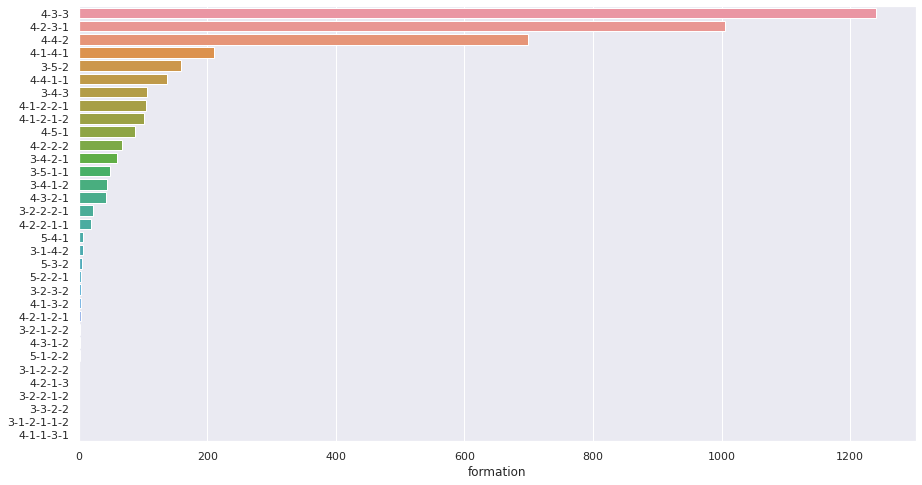

In [162]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x = formation_counts, y = formation_counts.index)

In [ ]:
# visualize this with a bargraph or with a video maybe, showing the changes?

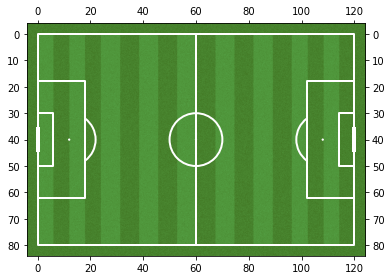

In [38]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True)
# specifying figure size (width, height)
fig, ax = pitch.draw(figsize=(8, 4))

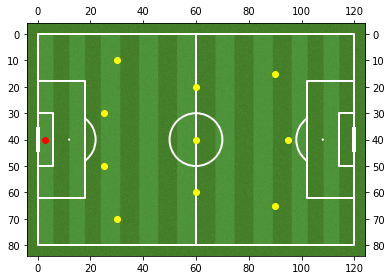

In [59]:
pitch_433 = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True)
# specifying figure size (width, height)
fig, ax = pitch.draw(figsize=(8, 4))

ax.scatter(3, 40, color = 'red')
ax.scatter([30, 25, 25, 30, 60, 60, 60, 90, 95, 90], [10, 30, 50, 70, 20, 40, 60, 15, 40, 65], color = 'yellow')

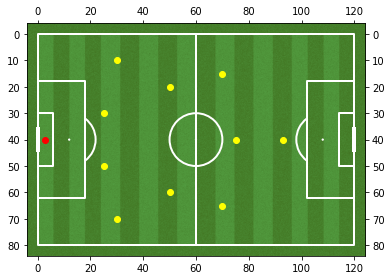

In [105]:
pitch_4231 = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True)
# specifying figure size (width, height)
fig, ax = pitch.draw(figsize=(8, 4))

ax.scatter(3, 40, color = 'red')
# change these vals
ax.scatter([30, 25, 25, 30, 50, 50, 70, 75, 70, 93], [10, 30, 50, 70, 20, 60, 15, 40, 65, 40], color = 'yellow')

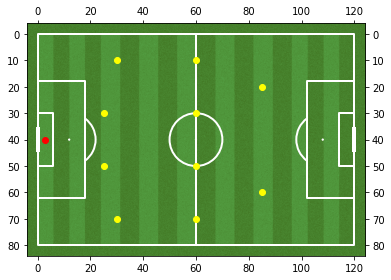

In [110]:
pitch_442 = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True)
# specifying figure size (width, height)
fig, ax = pitch.draw(figsize=(8, 4))

ax.scatter(3, 40, color = 'red')
# change these vals
ax.scatter([30, 25, 25, 30, 60, 60, 60, 60, 85, 85], [10, 30, 50, 70, 10, 30, 50, 70, 20, 60], color = 'yellow')

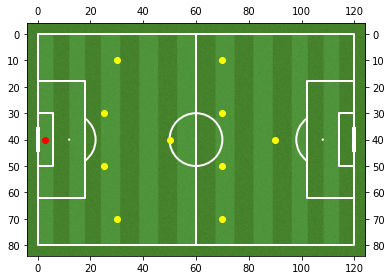

In [118]:
pitch_4141 = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True)
# specifying figure size (width, height)
fig, ax = pitch.draw(figsize=(8, 4))

ax.scatter(3, 40, color = 'red')
# change these vals
ax.scatter([30, 25, 25, 30, 50, 70, 70, 70, 70, 90], [10, 30, 50, 70, 40, 10, 30, 50, 70, 40], color = 'yellow')

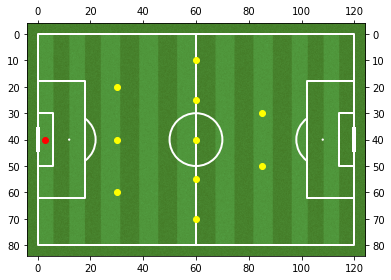

In [126]:
pitch_352 = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True)
# specifying figure size (width, height)
fig, ax = pitch.draw(figsize=(8, 4))

ax.scatter(3, 40, color = 'red')
# change these vals
ax.scatter([30, 30, 30, 60, 60, 60, 60, 60, 85, 85], [20, 40, 60, 40, 10, 25, 55, 70, 30, 50], color = 'yellow')

### Analysis of Related Events DF

In [164]:
related_events = pd.read_csv('related_events.csv')
related_events

id  \
0        91fdaa62-e36b-4aca-8c56-7a6d32289483   
1        aae12223-7969-4f4e-ac4e-83b075af1352   
2        ba7b6ef4-edab-43e9-8ed2-ccc073667b8f   
3        f8f30929-e011-4ea9-bbc9-c22873023d5f   
4        c0927b64-b182-4e44-83f0-b77222d600f8   
...                                       ...   
3970552  a2becaf4-d3e5-4bf3-9459-0b442020b72a   
3970553  a6217adf-c93a-4229-8ea9-f1a58752ca34   
3970554  aa15567a-333d-4aca-9df0-173672564d43   
3970555  abefbcd4-a519-4879-9a28-cc09552141fc   
3970556  7be5fa66-8c67-40d6-8697-996775eb7ec2   

                                   related_events  
0                                             NaN  
1                                             NaN  
2        ['f8f30929-e011-4ea9-bbc9-c22873023d5f']  
3        ['ba7b6ef4-edab-43e9-8ed2-ccc073667b8f']  
4        ['2a1a0dfc-2e25-4131-bd28-e595edb7b0cb']  
...                                           ...  
3970552  ['3b1fe136-a4d5-4a58-94ab-e2ba8551cb16']  
3970553  ['aa15567a-333d-4aca-9df0-173672564d43']  
3970554  ['a6217adf-c93a-4229-8ea9-f1a58752ca34']  
3970555  ['7be5fa66-8c67-40d6-8697-996775eb7ec2']  
3970556  ['abefbcd4-a519-4879-9a28-cc09552141fc']  

[3970557 rows x 2 columns]

In [169]:
lengths = related_events.get('related_events').apply(lambda x: x if pd.isna(x) else len(x.split(',')))

In [180]:
lengths.sort_values(ascending = False).fillna(0)

1935840    35.0
3502902    13.0
3468673    13.0
3849327    12.0
3388807    12.0
           ... 
3970454     0.0
3970463     0.0
3970498     0.0
3970499     0.0
3970510     0.0
Name: related_events, Length: 3970557, dtype: float64

In [177]:
# look at things with lots of related events with the larger table

In [176]:
related_events.iloc[1935840]

id                             b483f508-cfff-4ebd-a04d-c5a8f15c4e87
related_events    ['011fba70-8315-4121-9f94-fb973978dc99', '0473...
Name: 1935840, dtype: object

In [182]:
val_counts = lengths.fillna(0).value_counts()

In [194]:
val_counts_df = pd.DataFrame(val_counts).reset_index()

In [195]:
val_counts_df

index  related_events
0     1.0         2191578
1     2.0         1175969
2     3.0          389305
3     0.0          167997
4     4.0           39667
5     5.0            5156
6     6.0             694
7     7.0              96
8     8.0              57
9     9.0              23
10   10.0               7
11   11.0               3
12   12.0               2
13   13.0               2
14   35.0               1

<AxesSubplot:xlabel='index'>

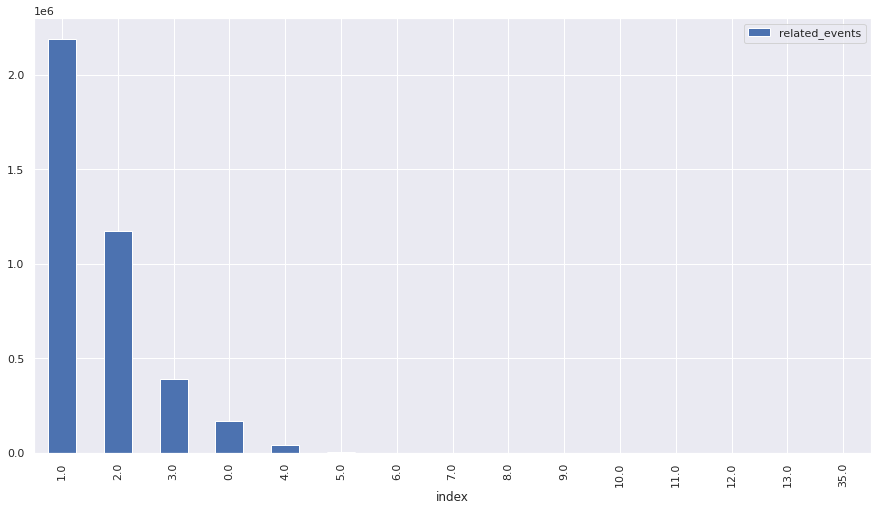

In [201]:
val_counts_df.plot.bar(x = 'index', y = 'related_events')

### Analysis of No Nulls DF (in Google Drive)
Focuses on columns that have no nulls, ie. basic event data.

In [4]:
no_nulls = pd.read_csv('nonNull.csv')
no_nulls.head(5)

type_id    type_name  possession_team_id possession_team_name  \
0       35  Starting XI                 974          Reading WFC   
1       35  Starting XI                 974          Reading WFC   
2       18   Half Start                 974          Reading WFC   
3       18   Half Start                 974          Reading WFC   
4       30         Pass                 969  Birmingham City WFC   

   play_pattern_id play_pattern_name  team_id            team_name  match_id  \
0                1      Regular Play      974          Reading WFC   2275050   
1                1      Regular Play      969  Birmingham City WFC   2275050   
2                1      Regular Play      969  Birmingham City WFC   2275050   
3                1      Regular Play      974          Reading WFC   2275050   
4                9     From Kick Off      969  Birmingham City WFC   2275050   

                                     id  index  period     timestamp  minute  \
0  91fdaa62-e36b-4aca-8c56-7a6d32289483      1       1  00:00:00.000       0   
1  aae12223-7969-4f4e-ac4e-83b075af1352      2       1  00:00:00.000       0   
2  ba7b6ef4-edab-43e9-8ed2-ccc073667b8f      3       1  00:00:00.000       0   
3  f8f30929-e011-4ea9-bbc9-c22873023d5f      4       1  00:00:00.000       0   
4  c0927b64-b182-4e44-83f0-b77222d600f8      5       1  00:00:00.443       0   

   second  possession  
0       0           1  
1       0           1  
2       0           1  
3       0           1  
4       0           2

In [24]:
no_nulls[no_nulls['type_name'] == 'Tactical Shift']

type_id       type_name  possession_team_id possession_team_name  \
5771          36  Tactical Shift                 972  West Ham United LFC   
7774          36  Tactical Shift                 971          Chelsea FCW   
7899          36  Tactical Shift                 971          Chelsea FCW   
10009         36  Tactical Shift                 971          Chelsea FCW   
20480         36  Tactical Shift                 217            Barcelona   
...          ...             ...                 ...                  ...   
3968632       36  Tactical Shift                 773          Switzerland   
3969122       36  Tactical Shift                 773          Switzerland   
3969238       36  Tactical Shift                 773          Switzerland   
3969645       36  Tactical Shift                 773          Switzerland   
3970219       36  Tactical Shift                 772                Spain   

         play_pattern_id play_pattern_name  team_id    team_name  match_id  \
5771                   1      Regular Play      974  Reading WFC     19795   
7774                   1      Regular Play      971  Chelsea FCW      7298   
7899                   4     From Throw In      971  Chelsea FCW      7298   
10009                  1      Regular Play      971  Chelsea FCW      7298   
20480                  1      Regular Play      224     Juventus     18242   
...                  ...               ...      ...          ...       ...   
3968632                1      Regular Play      772        Spain   3795108   
3969122                1      Regular Play      773  Switzerland   3795108   
3969238                9     From Kick Off      772        Spain   3795108   
3969645                1      Regular Play      773  Switzerland   3795108   
3970219                4     From Throw In      772        Spain   3795108   

                                           id  index  period     timestamp  \
5771     3188f369-064a-4e96-9ed4-c52700070e58   2211       2  00:23:32.191   
7774     8f6b8093-5540-425a-b43b-0f906502d59b   1191       1  00:29:05.660   
7899     3fbcdbff-3f2f-404f-b5c9-79fe29b2464b   1316       1  00:31:37.620   
10009    845d742f-2911-4b62-a517-713c103dd3f3   3426       2  00:38:45.278   
20480    fb0d6669-e53b-4d4a-bcd4-53156b1da5db   3210       2  00:43:28.299   
...                                       ...    ...     ...           ...   
3968632  d111e504-c3b2-4a13-8a64-9d97c5326d73   3061       2  00:31:20.199   
3969122  5fe97254-c9f5-4f9e-8c93-0a177a17dce9   3551       2  00:46:14.275   
3969238  9439008d-ff21-4a31-8709-19e0f1c2a33a   3667       3  00:00:01.824   
3969645  c4abb7b1-2af3-4924-b8e7-2cd95b46dc1c   4074       3  00:08:15.882   
3970219  2ba0913a-9a3f-427e-8254-8333cf0eeb03   4648       4  00:08:03.773   

         minute  second  possession  
5771         68      32         164  
7774         29       5          66  
7899         31      37          71  
10009        83      45         205  
20480        88      28         178  
...         ...     ...         ...  
3968632      76      20         137  
3969122      91      14         160  
3969238      90       1         167  
3969645      98      15         181  
3970219     113       3         210  

[1991 rows x 16 columns]

In [16]:
ids_teams = no_nulls[['id', 'team_name']]
ids_teams

id            team_name
0        91fdaa62-e36b-4aca-8c56-7a6d32289483          Reading WFC
1        aae12223-7969-4f4e-ac4e-83b075af1352  Birmingham City WFC
2        ba7b6ef4-edab-43e9-8ed2-ccc073667b8f  Birmingham City WFC
3        f8f30929-e011-4ea9-bbc9-c22873023d5f          Reading WFC
4        c0927b64-b182-4e44-83f0-b77222d600f8  Birmingham City WFC
...                                       ...                  ...
3970557  a2becaf4-d3e5-4bf3-9459-0b442020b72a                Spain
3970558  a6217adf-c93a-4229-8ea9-f1a58752ca34                Spain
3970559  aa15567a-333d-4aca-9df0-173672564d43          Switzerland
3970560  abefbcd4-a519-4879-9a28-cc09552141fc                Spain
3970561  7be5fa66-8c67-40d6-8697-996775eb7ec2          Switzerland

[3970562 rows x 2 columns]

In [19]:
ids_teams.get('id').nunique()

3970562

In [12]:
matches_teams = no_nulls[no_nulls.get("type_name") == "Starting XI"][['team_name', 'match_id']].reset_index(drop = True)

In [14]:
matches_teams.to_csv('matches_teams.csv', index = False)

In [3]:
no_nulls.columns

Index(['type_id', 'type_name', 'possession_team_id', 'possession_team_name',
       'play_pattern_id', 'play_pattern_name', 'team_id', 'team_name',
       'match_id', 'id', 'index', 'period', 'timestamp', 'minute', 'second',
       'possession'],
      dtype='object')

In [166]:
no_nulls.shape

(3970562, 16)

In [3]:
no_nulls.head(10)

type_id      type_name  possession_team_id possession_team_name  \
0       35    Starting XI                 974          Reading WFC   
1       35    Starting XI                 974          Reading WFC   
2       18     Half Start                 974          Reading WFC   
3       18     Half Start                 974          Reading WFC   
4       30           Pass                 969  Birmingham City WFC   
5       42  Ball Receipt*                 969  Birmingham City WFC   
6       43          Carry                 969  Birmingham City WFC   
7       17       Pressure                 969  Birmingham City WFC   
8       30           Pass                 969  Birmingham City WFC   
9       42  Ball Receipt*                 969  Birmingham City WFC   

   play_pattern_id play_pattern_name  team_id            team_name  match_id  \
0                1      Regular Play      974          Reading WFC   2275050   
1                1      Regular Play      969  Birmingham City WFC   2275050   
2                1      Regular Play      969  Birmingham City WFC   2275050   
3                1      Regular Play      974          Reading WFC   2275050   
4                9     From Kick Off      969  Birmingham City WFC   2275050   
5                9     From Kick Off      969  Birmingham City WFC   2275050   
6                9     From Kick Off      969  Birmingham City WFC   2275050   
7                9     From Kick Off      974          Reading WFC   2275050   
8                9     From Kick Off      969  Birmingham City WFC   2275050   
9                9     From Kick Off      969  Birmingham City WFC   2275050   

                                     id  index  period     timestamp  minute  \
0  91fdaa62-e36b-4aca-8c56-7a6d32289483      1       1  00:00:00.000       0   
1  aae12223-7969-4f4e-ac4e-83b075af1352      2       1  00:00:00.000       0   
2  ba7b6ef4-edab-43e9-8ed2-ccc073667b8f      3       1  00:00:00.000       0   
3  f8f30929-e011-4ea9-bbc9-c22873023d5f      4       1  00:00:00.000       0   
4  c0927b64-b182-4e44-83f0-b77222d600f8      5       1  00:00:00.443       0   
5  2a1a0dfc-2e25-4131-bd28-e595edb7b0cb      6       1  00:00:01.299       0   
6  e9e9c434-3acb-4877-9bb0-1513b74af376      7       1  00:00:01.299       0   
7  d36266bb-cdb5-462b-9d9b-6bb90fa04020      8       1  00:00:01.333       0   
8  71905fc2-e4fb-4429-8f44-11c3942ade7d      9       1  00:00:02.582       0   
9  5f5e47d6-0278-4b42-a19a-90798c115f10     10       1  00:00:08.254       0   

   second  possession  
0       0           1  
1       0           1  
2       0           1  
3       0           1  
4       0           2  
5       1           2  
6       1           2  
7       1           2  
8       2           2  
9       8           2

In [4]:
no_nulls.get("play_pattern_name").unique()

array(['Regular Play', 'From Kick Off', 'From Goal Kick',
       'From Free Kick', 'From Throw In', 'From Keeper', 'From Counter',
       'From Corner', 'Other'], dtype=object)

In [5]:
no_nulls.get("type_name").unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Miscontrol', 'Ball Recovery', 'Clearance', 'Duel',
       'Foul Committed', 'Dispossessed', 'Dribbled Past', 'Dribble',
       'Block', 'Foul Won', 'Goal Keeper', 'Shot', 'Interception',
       '50/50', 'Injury Stoppage', 'Referee Ball-Drop', 'Shield',
       'Player Off', 'Player On', 'Half End', 'Offside', 'Substitution',
       'Tactical Shift', 'Camera On', 'Error', 'Bad Behaviour',
       'Camera off', 'Own Goal Against', 'Own Goal For'], dtype=object)

#### Looks at the basic information about shots from the no null dataframe (does not have shot-specific columns).

In [25]:
shots = no_nulls[no_nulls.get("type_name") == 'Shot']
shots.head(5)

type_id type_name  possession_team_id possession_team_name  \
187       16      Shot                 974          Reading WFC   
332       16      Shot                 974          Reading WFC   
478       16      Shot                 969  Birmingham City WFC   
515       16      Shot                 974          Reading WFC   
546       16      Shot                 974          Reading WFC   

     play_pattern_id play_pattern_name  team_id            team_name  \
187                1      Regular Play      974          Reading WFC   
332                1      Regular Play      974          Reading WFC   
478                3    From Free Kick      969  Birmingham City WFC   
515                3    From Free Kick      974          Reading WFC   
546                4     From Throw In      974          Reading WFC   

     match_id                                    id  index  period  \
187   2275050  e24077b9-2ca6-4680-9e8e-761bc9ba4845    188       1   
332   2275050  0d58fd05-2175-48d8-a9b6-2085920f1812    333       1   
478   2275050  7b728a6c-d483-4e5b-8061-a0b849722cea    479       1   
515   2275050  9bdbfc3d-959d-4fc4-bac2-6b5d154191e9    516       1   
546   2275050  ce34292d-68c7-40e9-a949-31c5fc7f2ec7    547       1   

        timestamp  minute  second  possession  
187  00:05:23.402       5      23          17  
332  00:08:43.612       8      43          25  
478  00:11:43.335      11      43          32  
515  00:12:26.245      12      26          34  
546  00:13:01.452      13       1          36

In [32]:
shots_reduced = shots[['team_name', 'play_pattern_name', 'timestamp', 'minute', 'second']].reset_index(drop = True)
shots_reduced

team_name play_pattern_name     timestamp  minute  second
0              Reading WFC      Regular Play  00:05:23.402       5      23
1              Reading WFC      Regular Play  00:08:43.612       8      43
2      Birmingham City WFC    From Free Kick  00:11:43.335      11      43
3              Reading WFC    From Free Kick  00:12:26.245      12      26
4              Reading WFC     From Throw In  00:13:01.452      13       1
...                    ...               ...           ...     ...     ...
28020                Spain             Other  00:03:21.489     123      21
28021          Switzerland             Other  00:04:25.619     124      25
28022                Spain             Other  00:05:07.463     125       7
28023          Switzerland             Other  00:05:54.063     125      54
28024                Spain             Other  00:07:04.301     127       4

[28025 rows x 5 columns]

In [55]:
minute_vals = list(range(0, 131, 5))

In [56]:
minute_df = pd.DataFrame({'minute': minute_vals})
minute_df

minute
0        0
1        5
2       10
3       15
4       20
5       25
6       30
7       35
8       40
9       45
10      50
11      55
12      60
13      65
14      70
15      75
16      80
17      85
18      90
19      95
20     100
21     105
22     110
23     115
24     120
25     125
26     130

In [33]:
shots_reduced.to_csv('shots_reduced.csv', index = False)

In [36]:
reign_shots = shots[shots.get('team_name') == 'OL Reign']

In [72]:
vc_df = pd.DataFrame(minute_bins.value_counts().reset_index()).rename(columns = {'minute': 'count', 'index': 'minute'})



In [73]:
vc_df

minute  count
0       75     11
1       45     10
2       70     10
3       10      9
4       60      7
5       35      7
6       25      6
7       40      6
8       20      5
9       50      5
10      55      4
11      80      4
12      65      4
13      15      3
14      85      3
15       5      3
16      30      3
17       0      3
18      90      2

In [80]:
merged = vc_df.merge(minute_df, how = 'outer').fillna(0)

<AxesSubplot:xlabel='minute', ylabel='count'>

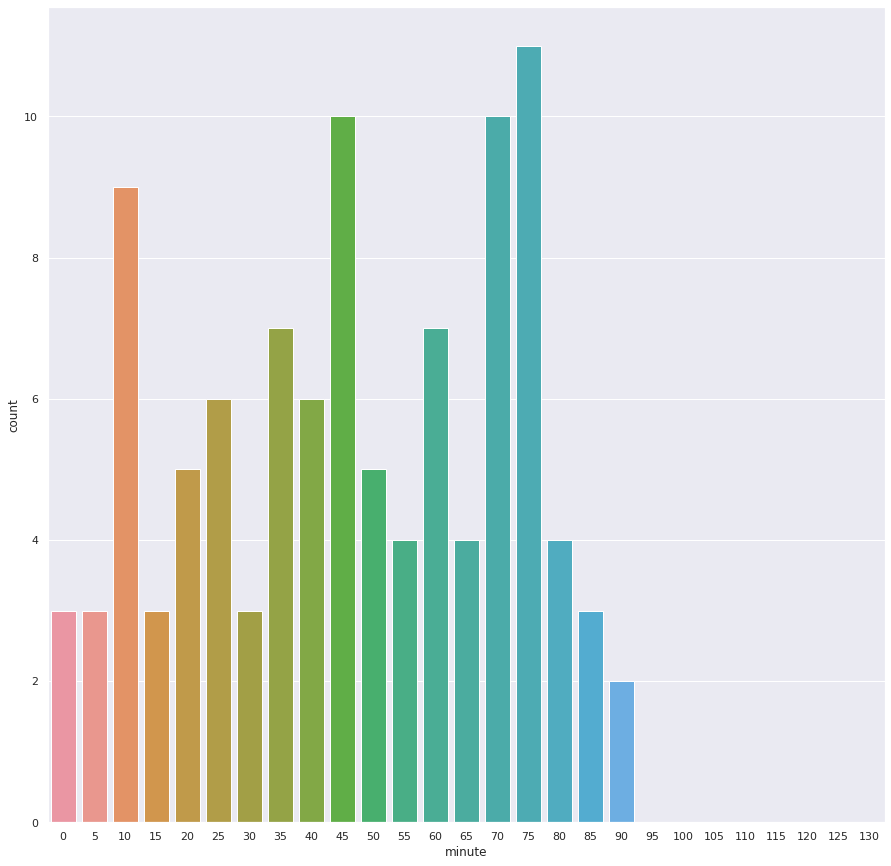

In [84]:
sns.barplot(x = merged['minute'], y = merged['count'])

<AxesSubplot:xlabel='minute', ylabel='count'>

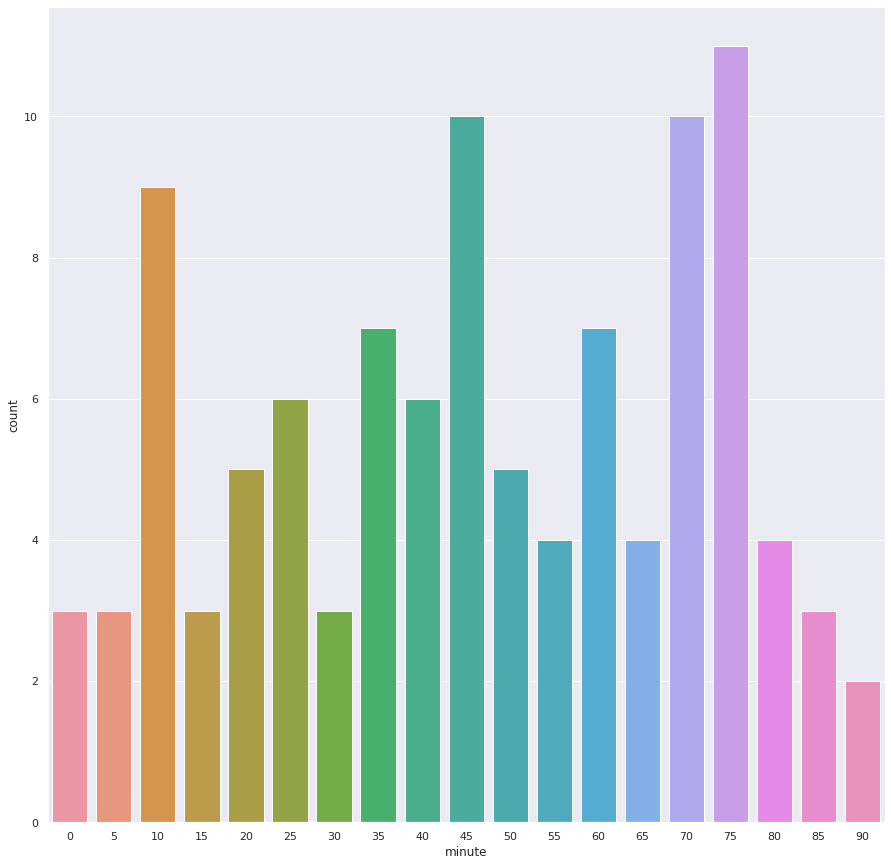

In [37]:
minute_bins = reign_shots.get('minute').transform(lambda x: x - (x%5))
sns.set(rc = {'figure.figsize':(15,15)})
sns.countplot(minute_bins)

In [31]:
shots.get('team_name').value_counts()

Barcelona              8248
Chelsea FCW            1153
Manchester City WFC    1088
Arsenal WFC             968
Reading WFC             771
                       ... 
Numancia                 10
AS Monaco                 9
Southampton               5
FC Porto                  4
Leicester City            2
Name: team_name, Length: 159, dtype: int64

In [14]:
minute_counts = shots.get('minute').value_counts()
minute_counts

46     430
45     393
47     355
56     352
91     345
      ... 
101      5
115      5
110      4
114      3
128      2
Name: minute, Length: 129, dtype: int64

In [28]:
shots.get('minute')

187          5
332          8
478         11
515         12
546         13
          ... 
3970550    123
3970552    124
3970554    125
3970556    125
3970558    127
Name: minute, Length: 28025, dtype: int64

In [29]:
minute_bins = shots.get('minute').transform(lambda x: x - (x%5))
minute_bins

187          5
332          5
478         10
515         10
546         10
          ... 
3970550    120
3970552    120
3970554    125
3970556    125
3970558    125
Name: minute, Length: 28025, dtype: int64

<AxesSubplot:xlabel='minute', ylabel='count'>

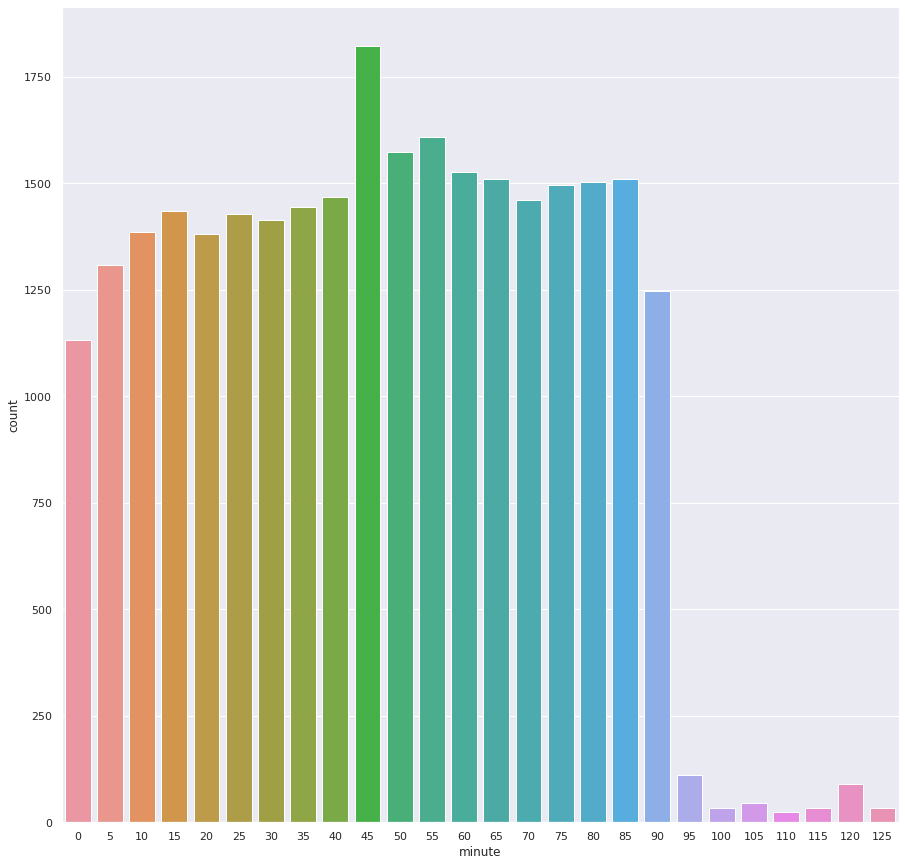

In [30]:
sns.set(rc = {'figure.figsize':(15,15)})
sns.countplot(minute_bins)

#### Looks at the basic information about 50-50s from the no null dataframe (does not have 50-50-specific columns).

In [35]:
fifty_fifty = no_nulls[no_nulls.get("type_name") == '50/50']

In [36]:
fifty_fifty

type_id type_name  possession_team_id possession_team_name  \
354           33     50/50                 974          Reading WFC   
355           33     50/50                 974          Reading WFC   
33331         33     50/50                 217            Barcelona   
33332         33     50/50                 217            Barcelona   
43333         33     50/50                1475    Manchester United   
...          ...       ...                 ...                  ...   
3952921       33     50/50                 974          Reading WFC   
3961153       33     50/50                  36      Manchester City   
3961154       33     50/50                  36      Manchester City   
3967643       33     50/50                 772                Spain   
3967644       33     50/50                 772                Spain   

         play_pattern_id play_pattern_name  team_id            team_name  \
354                    4     From Throw In      969  Birmingham City WFC   
355                    4     From Throw In      974          Reading WFC   
33331                  4     From Throw In      217            Barcelona   
33332                  4     From Throw In      222           Villarreal   
43333                  3    From Free Kick     1475    Manchester United   
...                  ...               ...      ...                  ...   
3952921                3    From Free Kick      972  West Ham United LFC   
3961153                3    From Free Kick        1              Arsenal   
3961154                3    From Free Kick       36      Manchester City   
3967643                1      Regular Play      773          Switzerland   
3967644                1      Regular Play      772                Spain   

         match_id                                    id  index  period  \
354       2275050  ac625bde-ccb9-4494-b18a-84f07534ec20    355       1   
355       2275050  fcc742b8-63c4-4972-aea2-f65c8560134c    356       1   
33331       69244  fdb69385-bd95-45d4-a840-edcf6b36796b   2782       2   
33332       69244  5b17c6f2-a7a7-458d-b96e-39464b413519   2783       2   
43333     2275142  2f0c1c6c-66f4-4b5c-97c5-e2cfbe37689a   1353       1   
...           ...                                   ...    ...     ...   
3952921   3775649  25b5f2c7-5075-4769-9246-ecf440f9cd37   1487       2   
3961153   3749233  6e205635-30ca-4b83-ae0a-2f5a6081bb1c   2674       2   
3961154   3749233  73c329e8-7ad9-4a8c-8b4a-9183b8d507d7   2675       2   
3967643   3795108  c7fa2d46-12ee-48f1-9626-fb2cdddfaa6c   2072       2   
3967644   3795108  b8572f77-c41e-4b19-b997-f7d276b564b9   2073       2   

            timestamp  minute  second  possession  
354      00:09:51.259       9      51          27  
355      00:09:51.259       9      51          27  
33331    00:15:42.959      60      42         141  
33332    00:15:42.959      60      42         141  
43333    00:38:00.737      38       0          80  
...               ...     ...     ...         ...  
3952921  00:02:11.909      47      11         101  
3961153  00:23:11.326      68      11         162  
3961154  00:23:11.326      68      11         162  
3967643  00:04:36.095      49      36          89  
3967644  00:04:36.095      49      36          89  

[1651 rows x 16 columns]

#### Play counts for no nulls -> analyzing most common events across all teams.

In [10]:
play_type_counts = no_nulls.groupby(["play_pattern_name", "type_name"]).count().rename({'type_id': 'count'}, axis = 1)['count']

In [11]:
play_type_counts

play_pattern_name  type_name     
From Corner        50/50               100
                   Bad Behaviour        33
                   Ball Receipt*     30434
                   Ball Recovery      6224
                   Block              2617
                                     ...  
Regular Play       Shield              454
                   Shot               9856
                   Starting XI        2212
                   Substitution       3308
                   Tactical Shift      907
Name: count, Length: 280, dtype: int64

In [19]:
play_type_counts.index.get_level_values(0)

Index(['From Corner', 'From Corner', 'From Corner', 'From Corner',
       'From Corner', 'From Corner', 'From Corner', 'From Corner',
       'From Corner', 'From Corner',
       ...
       'Regular Play', 'Regular Play', 'Regular Play', 'Regular Play',
       'Regular Play', 'Regular Play', 'Regular Play', 'Regular Play',
       'Regular Play', 'Regular Play'],
      dtype='object', name='play_pattern_name', length=280)

<AxesSubplot:xlabel='play_pattern_name', ylabel='count'>

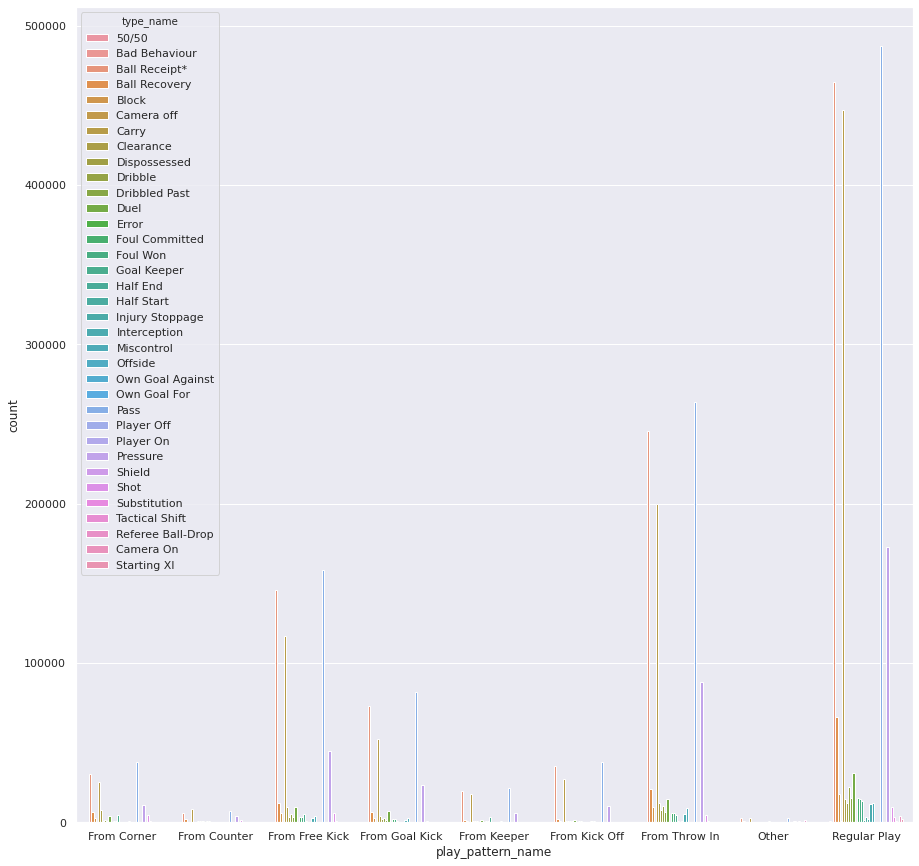

In [21]:
sns.set(rc = {'figure.figsize':(15,15)})
sns.barplot(x = play_type_counts.index.get_level_values(0), y = play_type_counts, hue = play_type_counts.index.get_level_values(1))

## Pass Analysis

In [3]:
passes = pd.read_csv('pass_df.csv')
passes.head(5)

type_id    type_name  possession_team_id possession_team_name  \
0       35  Starting XI                 974          Reading WFC   
1       35  Starting XI                 974          Reading WFC   
2       18   Half Start                 974          Reading WFC   
3       18   Half Start                 974          Reading WFC   
4       30         Pass                 969  Birmingham City WFC   

   play_pattern_id play_pattern_name  team_id            team_name  match_id  \
0                1      Regular Play      974          Reading WFC   2275050   
1                1      Regular Play      969  Birmingham City WFC   2275050   
2                1      Regular Play      969  Birmingham City WFC   2275050   
3                1      Regular Play      974          Reading WFC   2275050   
4                9     From Kick Off      969  Birmingham City WFC   2275050   

                                     id  ...  pass_recipient_id  \
0  91fdaa62-e36b-4aca-8c56-7a6d32289483  ...                NaN   
1  aae12223-7969-4f4e-ac4e-83b075af1352  ...                NaN   
2  ba7b6ef4-edab-43e9-8ed2-ccc073667b8f  ...                NaN   
3  f8f30929-e011-4ea9-bbc9-c22873023d5f  ...                NaN   
4  c0927b64-b182-4e44-83f0-b77222d600f8  ...            15562.0   

   pass_recipient_name pass_height_id  pass_height_name  pass_type_id  \
0                  NaN            NaN               NaN           NaN   
1                  NaN            NaN               NaN           NaN   
2                  NaN            NaN               NaN           NaN   
3                  NaN            NaN               NaN           NaN   
4      Lucy Staniforth            1.0       Ground Pass          65.0   

   pass_type_name  pass_body_part_id  pass_body_part_name  \
0             NaN                NaN                  NaN   
1             NaN                NaN                  NaN   
2             NaN                NaN                  NaN   
3             NaN                NaN                  NaN   
4        Kick Off               40.0           Right Foot   

   pass_end_location_x pass_end_location_y  
0                  NaN                 NaN  
1                  NaN                 NaN  
2                  NaN                 NaN  
3                  NaN                 NaN  
4                 53.9                39.6  

[5 rows x 28 columns]

In [4]:
passes_actual = passes[passes.get('type_name') == 'Pass']
passes_actual.head(5)

type_id type_name  possession_team_id possession_team_name  \
4        30      Pass                 969  Birmingham City WFC   
8        30      Pass                 969  Birmingham City WFC   
12       30      Pass                 974          Reading WFC   
16       30      Pass                 974          Reading WFC   
23       30      Pass                 974          Reading WFC   

    play_pattern_id play_pattern_name  team_id            team_name  match_id  \
4                 9     From Kick Off      969  Birmingham City WFC   2275050   
8                 9     From Kick Off      969  Birmingham City WFC   2275050   
12                7    From Goal Kick      974          Reading WFC   2275050   
16                7    From Goal Kick      974          Reading WFC   2275050   
23                7    From Goal Kick      969  Birmingham City WFC   2275050   

                                      id  ...  pass_recipient_id  \
4   c0927b64-b182-4e44-83f0-b77222d600f8  ...            15562.0   
8   71905fc2-e4fb-4429-8f44-11c3942ade7d  ...            15580.0   
12  7c8f43bb-78d6-421b-a485-c8ddb83e7b1d  ...            15720.0   
16  575a6ca7-9736-4487-bd1f-12ee10011319  ...            26570.0   
23  719c6c68-fa1e-4aab-ab70-601450bc44d6  ...            31563.0   

      pass_recipient_name pass_height_id  pass_height_name  pass_type_id  \
4         Lucy Staniforth            1.0       Ground Pass          65.0   
8          Claudia Walker            3.0         High Pass           NaN   
12          Sophie Howard            1.0       Ground Pass          63.0   
16  Amalie Vevle Eikeland            1.0       Ground Pass           NaN   
23        Rachel Williams            3.0         High Pass           NaN   

    pass_type_name  pass_body_part_id  pass_body_part_name  \
4         Kick Off               40.0           Right Foot   
8              NaN               40.0           Right Foot   
12       Goal Kick               38.0            Left Foot   
16             NaN               40.0           Right Foot   
23             NaN               38.0            Left Foot   

    pass_end_location_x pass_end_location_y  
4                  53.9                39.6  
8                 118.4                72.9  
12                 13.4                54.2  
16                 62.0                60.2  
23                 69.9                13.3  

[5 rows x 28 columns]

In [5]:
passes_actual.columns

Index(['type_id', 'type_name', 'possession_team_id', 'possession_team_name',
       'play_pattern_id', 'play_pattern_name', 'team_id', 'team_name',
       'match_id', 'id', 'index', 'period', 'timestamp', 'minute', 'second',
       'possession', 'pass_length', 'pass_angle', 'pass_recipient_id',
       'pass_recipient_name', 'pass_height_id', 'pass_height_name',
       'pass_type_id', 'pass_type_name', 'pass_body_part_id',
       'pass_body_part_name', 'pass_end_location_x', 'pass_end_location_y'],
      dtype='object')

In [27]:
pass_cols = passes_actual.get(['pass_length', 'pass_angle', 'pass_recipient_id',
       'pass_recipient_name', 'pass_height_id', 'pass_height_name',
       'pass_type_id', 'pass_type_name', 'pass_body_part_id',
       'pass_body_part_name', 'pass_end_location_x', 'pass_end_location_y']).reset_index(drop = True)

In [28]:
pass_cols

pass_length  pass_angle  pass_recipient_id  \
0           7.117584   -3.071286            15562.0   
1          72.217730    0.431441            15580.0   
2          12.601587    0.943167            15720.0   
3          22.489109    0.089050            26570.0   
4          34.269080    0.099378            31563.0   
...              ...         ...                ...   
1098101    14.447491   -2.053018             5208.0   
1098102    27.290474   -0.855413             5211.0   
1098103     9.902020    1.550597             6685.0   
1098104    53.027540    1.027789             6840.0   
1098105    15.720369   -1.914676             6765.0   

                    pass_recipient_name  pass_height_id pass_height_name  \
0                       Lucy Staniforth             1.0      Ground Pass   
1                        Claudia Walker             3.0        High Pass   
2                         Sophie Howard             1.0      Ground Pass   
3                 Amalie Vevle Eikeland             1.0      Ground Pass   
4                       Rachel Williams             3.0        High Pass   
...                                 ...             ...              ...   
1098101  Thiago Alcântara do Nascimento             1.0      Ground Pass   
1098102                Jordi Alba Ramos             1.0      Ground Pass   
1098103          Mikel Oyarzabal Ugarte             1.0      Ground Pass   
1098104          Marcos Llorente Moreno             3.0        High Pass   
1098105      Rodrigo Hernández Cascante             3.0        High Pass   

         pass_type_id pass_type_name  pass_body_part_id pass_body_part_name  \
0                65.0       Kick Off               40.0          Right Foot   
1                 NaN            NaN               40.0          Right Foot   
2                63.0      Goal Kick               38.0           Left Foot   
3                 NaN            NaN               40.0          Right Foot   
4                 NaN            NaN               38.0           Left Foot   
...               ...            ...                ...                 ...   
1098101          62.0      Free Kick               40.0          Right Foot   
1098102           NaN            NaN               40.0          Right Foot   
1098103           NaN            NaN               38.0           Left Foot   
1098104           NaN            NaN               38.0           Left Foot   
1098105           NaN            NaN               40.0          Right Foot   

         pass_end_location_x  pass_end_location_y  
0                       53.9                 39.6  
1                      118.4                 72.9  
2                       13.4                 54.2  
3                       62.0                 60.2  
4                       69.9                 13.3  
...                      ...                  ...  
1098101                 64.4                 25.4  
1098102                 91.8                  3.1  
1098103                 92.0                 13.0  
1098104                117.1                 57.7  
1098105                112.6                 43.1  

[1098106 rows x 12 columns]

### Setting up the pass success column by finding the events immediately after pass events and defining a success as the same team having possession.

In [4]:
pass_vals = (passes.get('type_name') == 'Pass')

In [5]:
pass_vals

0          False
1          False
2          False
3          False
4           True
           ...  
3970557    False
3970558    False
3970559    False
3970560    False
3970561    False
Name: type_name, Length: 3970562, dtype: bool

In [6]:
pass_vals.index = pass_vals.index + 1
pass_vals

1          False
2          False
3          False
4          False
5           True
           ...  
3970558    False
3970559    False
3970560    False
3970561    False
3970562    False
Name: type_name, Length: 3970562, dtype: bool

In [7]:
pass_vals = pass_vals[:3970561]
pass_vals

1          False
2          False
3          False
4          False
5           True
           ...  
3970557    False
3970558    False
3970559    False
3970560    False
3970561    False
Name: type_name, Length: 3970561, dtype: bool

In [8]:
pass_vals[0] = False

In [9]:
pass_vals

1          False
2          False
3          False
4          False
5           True
           ...  
3970558    False
3970559    False
3970560    False
3970561    False
0          False
Name: type_name, Length: 3970562, dtype: bool

In [10]:
after_passes = passes[pass_vals]
after_passes

type_id      type_name  possession_team_id possession_team_name  \
5             42  Ball Receipt*                 969  Birmingham City WFC   
9             42  Ball Receipt*                 969  Birmingham City WFC   
13            42  Ball Receipt*                 974          Reading WFC   
17            42  Ball Receipt*                 974          Reading WFC   
24            42  Ball Receipt*                 974          Reading WFC   
...          ...            ...                 ...                  ...   
3970524       42  Ball Receipt*                 772                Spain   
3970526       42  Ball Receipt*                 772                Spain   
3970529       42  Ball Receipt*                 772                Spain   
3970532       42  Ball Receipt*                 772                Spain   
3970535       42  Ball Receipt*                 772                Spain   

         play_pattern_id play_pattern_name  team_id            team_name  \
5                      9     From Kick Off      969  Birmingham City WFC   
9                      9     From Kick Off      969  Birmingham City WFC   
13                     7    From Goal Kick      974          Reading WFC   
17                     7    From Goal Kick      974          Reading WFC   
24                     7    From Goal Kick      969  Birmingham City WFC   
...                  ...               ...      ...                  ...   
3970524                3    From Free Kick      772                Spain   
3970526                3    From Free Kick      772                Spain   
3970529                3    From Free Kick      772                Spain   
3970532                3    From Free Kick      772                Spain   
3970535                3    From Free Kick      772                Spain   

         match_id                                    id  ...  \
5         2275050  2a1a0dfc-2e25-4131-bd28-e595edb7b0cb  ...   
9         2275050  5f5e47d6-0278-4b42-a19a-90798c115f10  ...   
13        2275050  b29c5ad7-5fff-446a-a328-6da38addd9d5  ...   
17        2275050  badfa18b-ffc9-44d9-914c-a63727ab8567  ...   
24        2275050  7b2c7906-f906-475f-9c2b-0a791b0a1302  ...   
...           ...                                   ...  ...   
3970524   3795108  e9faf229-25c2-42e0-83b0-55acacdb444a  ...   
3970526   3795108  3ddf7bf6-9959-4fab-aea6-ce34a4cf337e  ...   
3970529   3795108  c5ba20ff-22b9-4611-be19-10a4a8f99011  ...   
3970532   3795108  7f2a8296-5406-4fd8-946a-fbe0f7f8bae9  ...   
3970535   3795108  e9d11fbb-eea2-4f7e-9bbb-fe7c97947c57  ...   

         pass_recipient_id  pass_recipient_name pass_height_id  \
5                      NaN                  NaN            NaN   
9                      NaN                  NaN            NaN   
13                     NaN                  NaN            NaN   
17                     NaN                  NaN            NaN   
24                     NaN                  NaN            NaN   
...                    ...                  ...            ...   
3970524                NaN                  NaN            NaN   
3970526                NaN                  NaN            NaN   
3970529                NaN                  NaN            NaN   
3970532                NaN                  NaN            NaN   
3970535                NaN                  NaN            NaN   

         pass_height_name  pass_type_id  pass_type_name  pass_body_part_id  \
5                     NaN           NaN             NaN                NaN   
9                     NaN           NaN             NaN                NaN   
13                    NaN           NaN             NaN                NaN   
17                    NaN           NaN             NaN                NaN   
24                    NaN           NaN             NaN                NaN   
...                   ...           ...             ...                ...   
3970524               NaN           NaN             NaN                NaN 

### Analyzing what happens after passes.

In [11]:
after_types = after_passes.get("type_name").value_counts()
after_types

Ball Receipt*        902407
Pressure             119396
Pass                  23371
Ball Recovery         15712
Block                 11959
Clearance             10521
Duel                   6135
Goal Keeper            2074
Foul Committed         1982
Interception           1524
Injury Stoppage         595
Half End                539
Substitution            510
Shield                  350
Camera On               322
Tactical Shift          313
Player On               175
Error                    51
Player Off               44
Referee Ball-Drop        43
Miscontrol               30
Bad Behaviour            25
50/50                    10
Offside                   8
Foul Won                  7
Own Goal For              2
Dribbled Past             1
Name: type_name, dtype: int64

In [12]:
no_br_pressure = after_types.drop(['Ball Receipt*', 'Pressure'])
no_br_pressure

Pass                 23371
Ball Recovery        15712
Block                11959
Clearance            10521
Duel                  6135
Goal Keeper           2074
Foul Committed        1982
Interception          1524
Injury Stoppage        595
Half End               539
Substitution           510
Shield                 350
Camera On              322
Tactical Shift         313
Player On              175
Error                   51
Player Off              44
Referee Ball-Drop       43
Miscontrol              30
Bad Behaviour           25
50/50                   10
Offside                  8
Foul Won                 7
Own Goal For             2
Dribbled Past            1
Name: type_name, dtype: int64

<AxesSubplot:xlabel='type_name'>

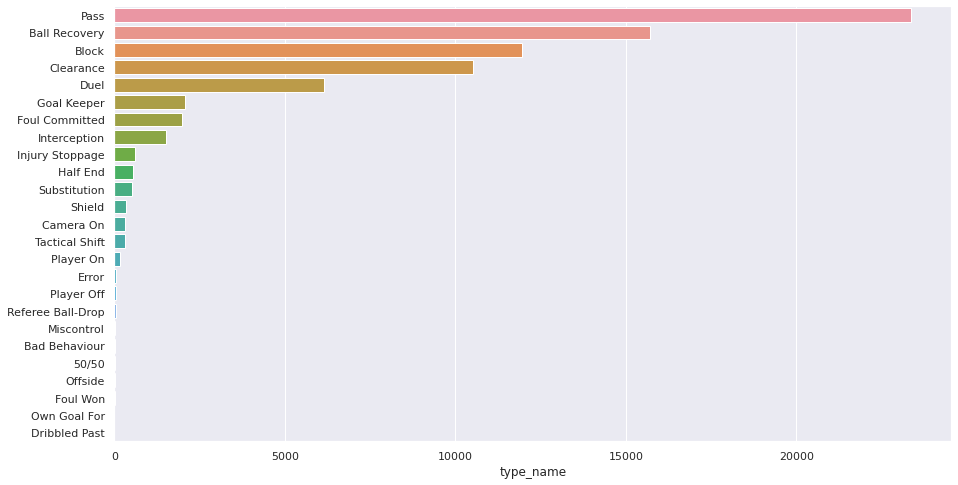

In [13]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x = no_br_pressure, y = no_br_pressure.index)


### Continuing the setup for what counts as a successful pass and placing that into a DF.

In [14]:
possess_pass = passes_actual.get("possession_team_name").reset_index(drop = True)

In [15]:
possess_after = after_passes.get("possession_team_name").reset_index(drop = True)

In [20]:
possess_after

0          Birmingham City WFC
1          Birmingham City WFC
2                  Reading WFC
3                  Reading WFC
4                  Reading WFC
                  ...         
1098101                  Spain
1098102                  Spain
1098103                  Spain
1098104                  Spain
1098105                  Spain
Name: possession_team_name, Length: 1098106, dtype: object

In [35]:
pass_success_df = pd.DataFrame({'pass_continue': (possess_pass == possess_after), 'possess_before': possess_pass, 'possess_after': possess_after})

In [36]:
pass_success_df

pass_continue       possess_before        possess_after
0                 True  Birmingham City WFC  Birmingham City WFC
1                 True  Birmingham City WFC  Birmingham City WFC
2                 True          Reading WFC          Reading WFC
3                 True          Reading WFC          Reading WFC
4                 True          Reading WFC          Reading WFC
...                ...                  ...                  ...
1098101           True                Spain                Spain
1098102           True                Spain                Spain
1098103           True                Spain                Spain
1098104           True                Spain                Spain
1098105           True                Spain                Spain

[1098106 rows x 3 columns]

In [38]:
# Combining success status and teams with the pass-specific columns singled out earlier

total_pass_df = pd.concat([pass_success_df, pass_cols], axis = 1)
total_pass_df

pass_continue       possess_before        possess_after  pass_length  \
0                 True  Birmingham City WFC  Birmingham City WFC     7.117584   
1                 True  Birmingham City WFC  Birmingham City WFC    72.217730   
2                 True          Reading WFC          Reading WFC    12.601587   
3                 True          Reading WFC          Reading WFC    22.489109   
4                 True          Reading WFC          Reading WFC    34.269080   
...                ...                  ...                  ...          ...   
1098101           True                Spain                Spain    14.447491   
1098102           True                Spain                Spain    27.290474   
1098103           True                Spain                Spain     9.902020   
1098104           True                Spain                Spain    53.027540   
1098105           True                Spain                Spain    15.720369   

         pass_angle  pass_recipient_id             pass_recipient_name  \
0         -3.071286            15562.0                 Lucy Staniforth   
1          0.431441            15580.0                  Claudia Walker   
2          0.943167            15720.0                   Sophie Howard   
3          0.089050            26570.0           Amalie Vevle Eikeland   
4          0.099378            31563.0                 Rachel Williams   
...             ...                ...                             ...   
1098101   -2.053018             5208.0  Thiago Alcântara do Nascimento   
1098102   -0.855413             5211.0                Jordi Alba Ramos   
1098103    1.550597             6685.0          Mikel Oyarzabal Ugarte   
1098104    1.027789             6840.0          Marcos Llorente Moreno   
1098105   -1.914676             6765.0      Rodrigo Hernández Cascante   

         pass_height_id pass_height_name  pass_type_id pass_type_name  \
0                   1.0      Ground Pass          65.0       Kick Off   
1                   3.0        High Pass           NaN            NaN   
2                   1.0      Ground Pass          63.0      Goal Kick   
3                   1.0      Ground Pass           NaN            NaN   
4                   3.0        High Pass           NaN            NaN   
...                 ...              ...           ...            ...   
1098101             1.0      Ground Pass          62.0      Free Kick   
1098102             1.0      Ground Pass           NaN            NaN   
1098103             1.0      Ground Pass           NaN            NaN   
1098104             3.0        High Pass           NaN            NaN   
1098105             3.0        High Pass           NaN            NaN   

         pass_body_part_id pass_body_part_name  pass_end_location_x  \
0                     40.0          Right Foot                 53.9   
1                     40.0          Right Foot                118.4   
2                     38.0           Left Foot                 13.4   
3                     40.0          Right Foot                 62.0   
4                     38.0           Left Foot                 69.9   
...                    ...                 ...                  ...   
1098101               40.0          Right Foot                 64.4   
1098102               40.0          Right Foot                 91.8   
1098103               38.0           Left Foot                 92.0   
1098104               38.0           Left Foot                117.1   
1098105               40.0          Right Foot                112.6   

         pass_end_location_y  
0                       39.6  
1                       72.9  
2                       54.2  
3                       60.2  
4                       13.3  
...                      ...  
1098101                 25.4  
1098102                  3.1  
1098103                 13.0  
1098104                 57.7  
1098105                 43.1  

[1098106 rows x 15 columns]

#### Defining pass angles into different bins (after making them all positive radians) and then analyzing pass success based on angle bin.

In [154]:
angles = total_pass_df.get("pass_angle")

In [155]:
angles

0         -3.071286
1          0.431441
2          0.943167
3          0.089050
4          0.099378
             ...   
1098101   -2.053018
1098102   -0.855413
1098103    1.550597
1098104    1.027789
1098105   -1.914676
Name: pass_angle, Length: 1098106, dtype: float64

In [157]:
angles_pos = angles.transform(positive_angle)

In [158]:
angle_bins = pd.cut(angles_pos, 10)

In [159]:
total_pass_df['angle_bins'] = angle_bins

In [156]:
def positive_angle(angle_val):
    if angle_val < 0:
        angle_val = 2 * np.pi + angle_val
    return angle_val

In [161]:
angle_counts = total_pass_df.groupby(["angle_bins", "pass_continue"]).count()['possess_before']

<AxesSubplot:xlabel='pass_continue', ylabel='possess_before'>

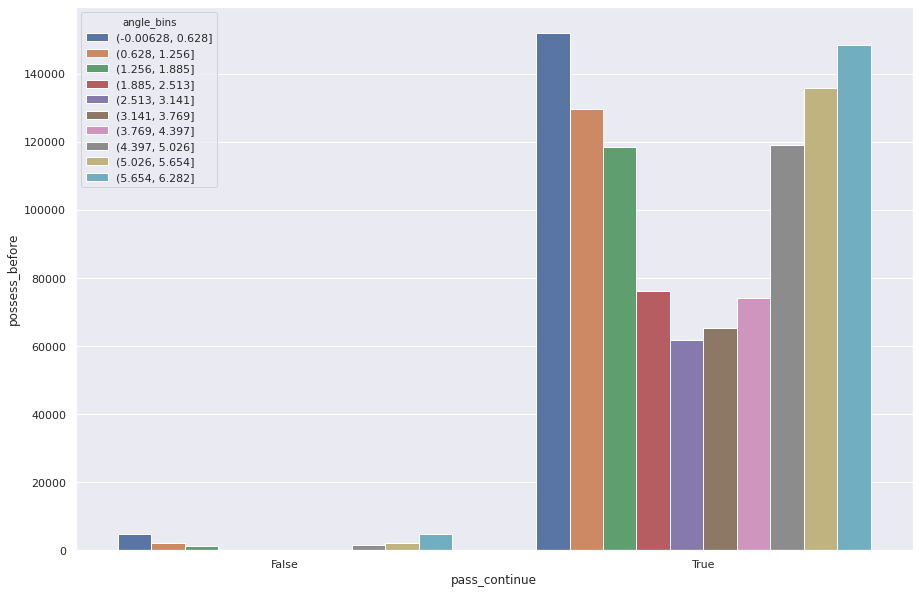

In [162]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.barplot(x = angle_counts.index.get_level_values(1), y = angle_counts, hue = angle_counts.index.get_level_values(0))


### Separating passes into successful and unsuccessful and then mapping them onto the pitch using the end location.

In [91]:
good_passes = total_pass_df[total_pass_df.get("pass_continue") == True].reset_index(drop = True)
good_passes

pass_continue       possess_before        possess_after  pass_length  \
0                 True  Birmingham City WFC  Birmingham City WFC     7.117584   
1                 True  Birmingham City WFC  Birmingham City WFC    72.217730   
2                 True          Reading WFC          Reading WFC    12.601587   
3                 True          Reading WFC          Reading WFC    22.489109   
4                 True          Reading WFC          Reading WFC    34.269080   
...                ...                  ...                  ...          ...   
1080617           True                Spain                Spain    14.447491   
1080618           True                Spain                Spain    27.290474   
1080619           True                Spain                Spain     9.902020   
1080620           True                Spain                Spain    53.027540   
1080621           True                Spain                Spain    15.720369   

         pass_angle  pass_recipient_id             pass_recipient_name  \
0         -3.071286            15562.0                 Lucy Staniforth   
1          0.431441            15580.0                  Claudia Walker   
2          0.943167            15720.0                   Sophie Howard   
3          0.089050            26570.0           Amalie Vevle Eikeland   
4          0.099378            31563.0                 Rachel Williams   
...             ...                ...                             ...   
1080617   -2.053018             5208.0  Thiago Alcântara do Nascimento   
1080618   -0.855413             5211.0                Jordi Alba Ramos   
1080619    1.550597             6685.0          Mikel Oyarzabal Ugarte   
1080620    1.027789             6840.0          Marcos Llorente Moreno   
1080621   -1.914676             6765.0      Rodrigo Hernández Cascante   

         pass_height_id pass_height_name  pass_type_id pass_type_name  \
0                   1.0      Ground Pass          65.0       Kick Off   
1                   3.0        High Pass           NaN            NaN   
2                   1.0      Ground Pass          63.0      Goal Kick   
3                   1.0      Ground Pass           NaN            NaN   
4                   3.0        High Pass           NaN            NaN   
...                 ...              ...           ...            ...   
1080617             1.0      Ground Pass          62.0      Free Kick   
1080618             1.0      Ground Pass           NaN            NaN   
1080619             1.0      Ground Pass           NaN            NaN   
1080620             3.0        High Pass           NaN            NaN   
1080621             3.0        High Pass           NaN            NaN   

         pass_body_part_id pass_body_part_name  pass_end_location_x  \
0                     40.0          Right Foot                 53.9   
1                     40.0          Right Foot                118.4   
2                     38.0           Left Foot                 13.4   
3                     40.0          Right Foot                 62.0   
4                     38.0           Left Foot                 69.9   
...                    ...                 ...                  ...   
1080617               40.0          Right Foot                 64.4   
1080618               40.0          Right Foot                 91.8   
1080619               38.0           Left Foot                 92.0   
1080620               38.0           Left Foot                117.1   
1080621               40.0          Right Foot                112.6   

         pass_end_location_y pass_length_bins  
0                       39.6    (5.96, 11.92]  
1                       72.9   (71.52, 77.48]  
2                       54.2   (11.92, 17.88]  
3                       60.2   (17.88, 23.84]  
4                       13.3    (29.8, 35.76]  
...                      ...              ...  
1080617                 25.4   (11.92, 17.88]  
1080618                  3.1    (

In [93]:
good_pass_x = good_passes.get("pass_end_location_x")
good_pass_y = good_passes.get("pass_end_location_y")

In [92]:
bad_passes = total_pass_df[total_pass_df.get("pass_continue") == False].reset_index(drop = True)
bad_passes

pass_continue       possess_before        possess_after  pass_length  \
0              False          Reading WFC  Birmingham City WFC    13.845216   
1              False          Reading WFC  Birmingham City WFC    53.572006   
2              False  Birmingham City WFC          Reading WFC    29.201542   
3              False          Reading WFC  Birmingham City WFC    65.553640   
4              False  Birmingham City WFC          Reading WFC    44.086845   
...              ...                  ...                  ...          ...   
17479          False          Switzerland                Spain    44.456722   
17480          False                Spain          Switzerland     9.929753   
17481          False          Switzerland                Spain    28.577614   
17482          False                Spain          Switzerland     3.041381   
17483          False                Spain          Switzerland     8.100000   

       pass_angle  pass_recipient_id pass_recipient_name  pass_height_id  \
0       -0.144961                NaN                 NaN             3.0   
1        0.687568                NaN                 NaN             3.0   
2        0.249131                NaN                 NaN             3.0   
3        0.290872                NaN                 NaN             3.0   
4       -1.066562                NaN                 NaN             3.0   
...           ...                ...                 ...             ...   
17479   -0.554307                NaN                 NaN             2.0   
17480   -0.328120                NaN                 NaN             1.0   
17481   -0.520014                NaN                 NaN             3.0   
17482    1.735945                NaN                 NaN             2.0   
17483    0.000000                NaN                 NaN             3.0   

      pass_height_name  pass_type_id pass_type_name  pass_body_part_id  \
0            High Pass           NaN            NaN               38.0   
1            High Pass          62.0      Free Kick               40.0   
2            High Pass           NaN            NaN               40.0   
3            High Pass          62.0      Free Kick               38.0   
4            High Pass           NaN            NaN               40.0   
...                ...           ...            ...                ...   
17479         Low Pass           NaN            NaN               40.0   
17480      Ground Pass           NaN            NaN               40.0   
17481        High Pass           NaN            NaN               68.0   
17482         Low Pass           NaN            NaN               40.0   
17483        High Pass          66.0       Recovery                NaN   

      pass_body_part_name  pass_end_location_x  pass_end_location_y  \
0               Left Foot                 57.4                  0.1   
1              Right Foot                118.1                 41.5   
2              Right Foot                 71.3                 13.3   
3               Left Foot                119.8                 20.4   
4              Right Foot                112.4                 38.7   
...                   ...                  ...                  ...   
17479          Right Foot                 99.9                 43.4   
17480          Right Foot                 94.4                 16.0   
17481           Drop Kick                 27.9                 15.3   
17482          Right Foot                117.0                 37.2   
17483                 NaN                 93.1                 51.9   

      pass_length_bins  
0       (11.92, 17.88]  
1       (47.68, 53.64]  
2        (23.84, 29.8]  
3        (59.6, 65.56]  
4       (41.72, 47.68]  
...                ...  
17479   (41.72, 47.68]  
17480    (5.96, 11.92]  
17481    (23.84, 29.8]  
17482   (-0.119, 5.96]  
17483    (5.96, 11.92]  

[17484 rows x 16 columns]

In [94]:
bad_pass_x = bad_passes.get("pass_end_location_x")
bad_pass_y = bad_passes.get("pass_end_location_y")

In [96]:
total_pass_df.get("pass_end_location_x").max()

120.9

In [97]:
total_pass_df.get("pass_end_location_x").min()

0.1

In [98]:
total_pass_df.get("pass_end_location_y").min()

0.1

In [99]:
total_pass_df.get("pass_end_location_y").max()

80.9

In [ ]:
# dimensions are 0-121 for x and 0-81 for y --> don't need to do any adjustment because it matches this format already

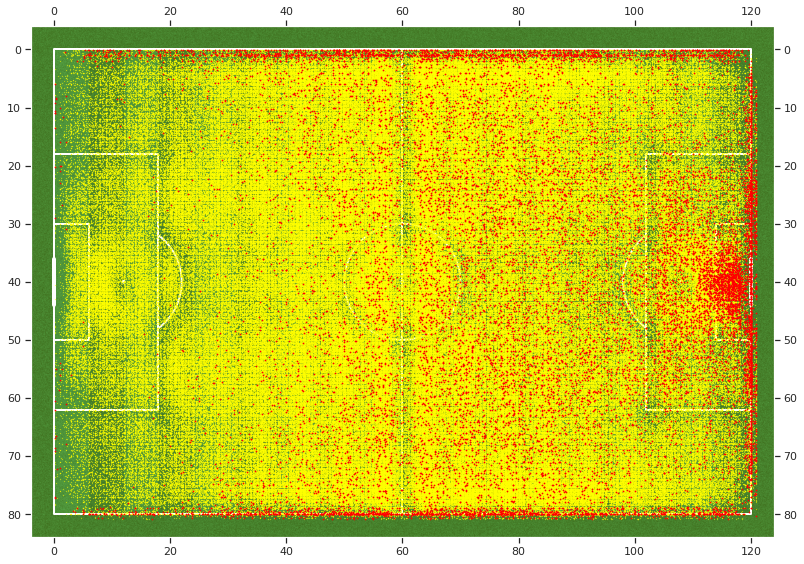

In [112]:
pass_ends = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True)
# specifying figure size (width, height)
fig, ax = pass_ends.draw(figsize=(16, 8))

ax.scatter(good_pass_x, good_pass_y, color = 'yellow', s = 0.05)
ax.scatter(bad_pass_x, bad_pass_y, color = 'red', s = 0.5)



#### Defining pass lengths into different bins and then analyzing pass success based on length bin (similar to angle).

In [67]:
pass_lengths = total_pass_df.get("pass_length")
pass_lengths

0           7.117584
1          72.217730
2          12.601587
3          22.489109
4          34.269080
             ...    
1098101    14.447491
1098102    27.290474
1098103     9.902020
1098104    53.027540
1098105    15.720369
Name: pass_length, Length: 1098106, dtype: float64

In [85]:
total_pass_df['pass_length_bins'] = pd.cut(pass_lengths, 20)

In [86]:
pass_length_success = total_pass_df.groupby(["pass_length_bins", "pass_continue"]).count()['possess_before']
pass_length_success

pass_length_bins    pass_continue
(-0.119, 5.96]      False               514
                    True              59019
(5.96, 11.92]       False              1478
                    True             241035
(11.92, 17.88]      False              1859
                    True             273624
(17.88, 23.84]      False              1662
                    True             186890
(23.84, 29.8]       False              1643
                    True             114241
(29.8, 35.76]       False              1656
                    True              69846
(35.76, 41.72]      False              1721
                    True              43451
(41.72, 47.68]      False              1533
                    True              29038
(47.68, 53.64]      False              1292
                    True              21067
(53.64, 59.6]       False              1077
                    True              15546
(59.6, 65.56]       False               952
                    True              1147

<AxesSubplot:xlabel='pass_continue', ylabel='possess_before'>

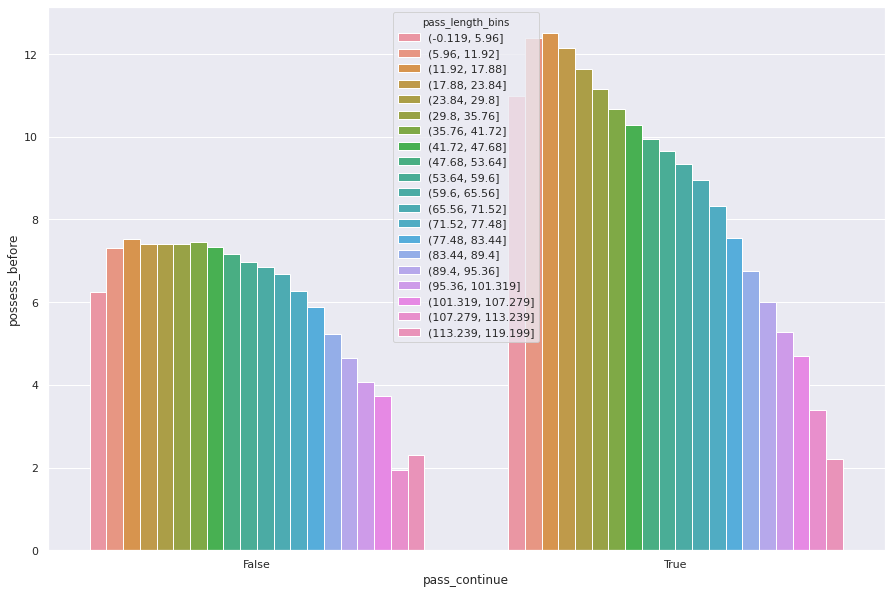

In [90]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.barplot(x = pass_length_success.index.get_level_values(1), y = np.log(pass_length_success), hue = pass_length_success.index.get_level_values(0))
# log scaled y axis - couldn't fit on a plot otherwise

### Analyzing the success on different types of pass (ground, low, high).

In [43]:
pass_type_success = total_pass_df.groupby(["pass_height_name", "pass_continue"]).count()['possess_before']
pass_type_success

pass_height_name  pass_continue
Ground Pass       False              2612
                  True             719725
High Pass         False             12326
                  True             213274
Low Pass          False              2546
                  True             147623
Name: possess_before, dtype: int64

In [61]:
# want these as proportions
pts_props = pass_type_success / total_pass_df.groupby(["pass_height_name"]).count()['possess_before']

In [63]:
pts_props

pass_height_name  pass_continue
Ground Pass       False            0.003616
                  True             0.996384
High Pass         False            0.054637
                  True             0.945363
Low Pass          False            0.016954
                  True             0.983046
Name: possess_before, dtype: float64

In [52]:
pass_type_success.index.get_level_values(0)

Index(['Ground Pass', 'Ground Pass', 'High Pass', 'High Pass', 'Low Pass',
       'Low Pass'],
      dtype='object', name='pass_height_name')

<AxesSubplot:xlabel='pass_height_name', ylabel='possess_before'>

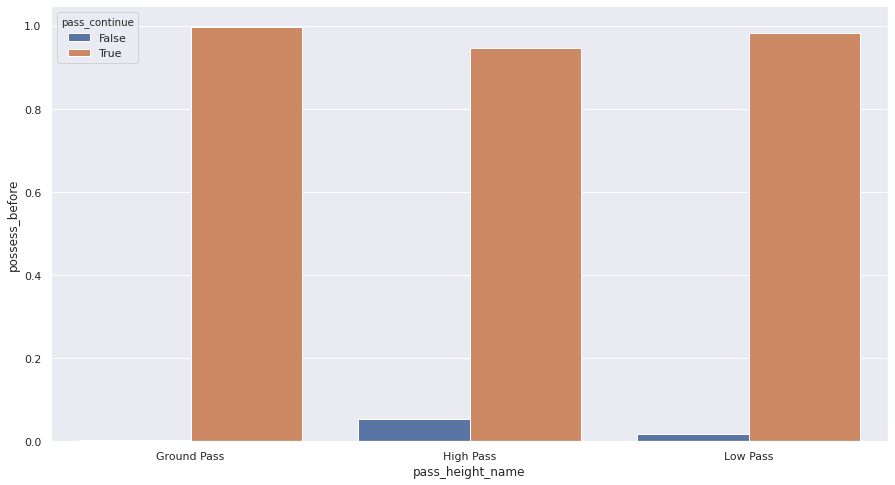

In [62]:
sns.barplot(x = pts_props.index.get_level_values(0), y = pts_props, hue = pts_props.index.get_level_values(1))


### Tried to look at different teams and how successful their passes were - visualization for all teams together wasn't helpful.

In [41]:
team_passes = total_pass_df.groupby(["possess_before", "pass_continue"]).count()['possess_after']

In [42]:
team_passes

possess_before           pass_continue
AC Milan                 False              26
                         True             1128
AS Monaco                False               5
                         True              522
Albacete                 False              42
                                          ... 
Wolverhampton Wanderers  True              678
Xerez                    False              35
                         True              516
Yeovil Town LFC          False             247
                         True             4829
Name: possess_after, Length: 318, dtype: int64

<AxesSubplot:xlabel='pass_continue', ylabel='possess_after'>

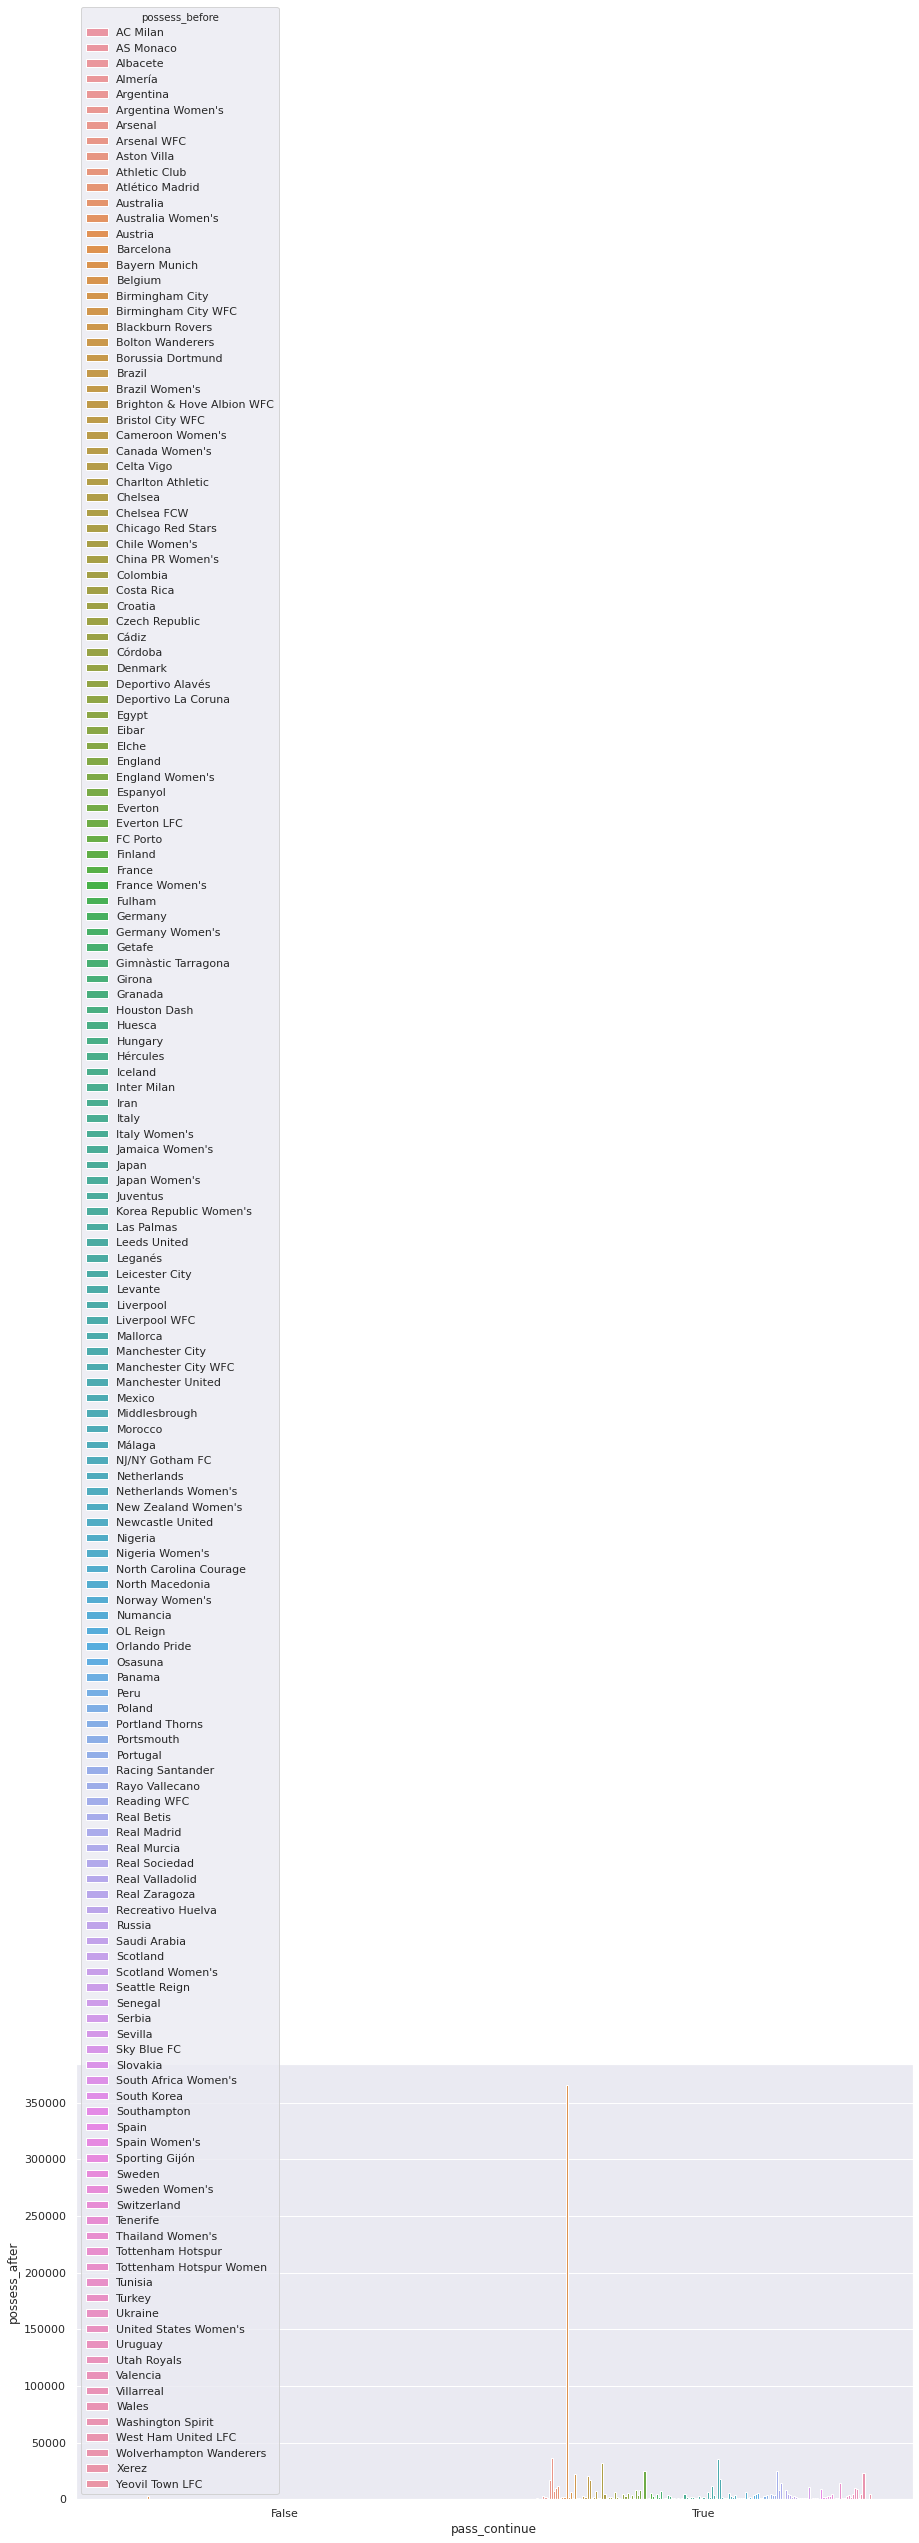

In [65]:
sns.barplot(x = team_passes.index.get_level_values(1), y = team_passes, hue = team_passes.index.get_level_values(0))


In [27]:
passes_actual.get("possession_team_name")

0          Birmingham City WFC
1          Birmingham City WFC
2                  Reading WFC
3                  Reading WFC
4                  Reading WFC
                  ...         
1098101                  Spain
1098102                  Spain
1098103                  Spain
1098104                  Spain
1098105                  Spain
Name: possession_team_name, Length: 1098106, dtype: object

In [4]:
passes_actual.shape

(1098106, 28)

In [5]:
passes_actual.columns

Index(['type_id', 'type_name', 'possession_team_id', 'possession_team_name',
       'play_pattern_id', 'play_pattern_name', 'team_id', 'team_name',
       'match_id', 'id', 'index', 'period', 'timestamp', 'minute', 'second',
       'possession', 'pass_length', 'pass_angle', 'pass_recipient_id',
       'pass_recipient_name', 'pass_height_id', 'pass_height_name',
       'pass_type_id', 'pass_type_name', 'pass_body_part_id',
       'pass_body_part_name', 'pass_end_location_x', 'pass_end_location_y'],
      dtype='object')

In [11]:
passes_actual.get('possession_team_name').value_counts()

Barcelona              368253
Arsenal WFC             36471
Manchester City WFC     36399
Chelsea FCW             32635
Reading WFC             25754
                        ...  
Everton                   357
Portsmouth                348
Leicester City            321
Gimnàstic Tarragona       292
Inter Milan               287
Name: possession_team_name, Length: 159, dtype: int64

In [9]:
passes_actual.get('possession').value_counts()

2      9562
3      6980
4      6535
23     6282
20     6256
       ... 
290       4
289       3
285       2
293       2
294       2
Name: possession, Length: 293, dtype: int64

### Pass map

In [9]:
passes_clean = pd.read_csv('predicting_pass.csv')
passes_clean

type_id type_name  possession_team_id possession_team_name  \
0             30      Pass                 969  Birmingham City WFC   
1             30      Pass                 969  Birmingham City WFC   
2             30      Pass                 974          Reading WFC   
3             30      Pass                 974          Reading WFC   
4             30      Pass                 974          Reading WFC   
...          ...       ...                 ...                  ...   
1098101       30      Pass                 772                Spain   
1098102       30      Pass                 772                Spain   
1098103       30      Pass                 772                Spain   
1098104       30      Pass                 772                Spain   
1098105       30      Pass                 772                Spain   

         play_pattern_id play_pattern_name  team_id            team_name  \
0                      9     From Kick Off      969  Birmingham City WFC   
1                      9     From Kick Off      969  Birmingham City WFC   
2                      7    From Goal Kick      974          Reading WFC   
3                      7    From Goal Kick      974          Reading WFC   
4                      7    From Goal Kick      969  Birmingham City WFC   
...                  ...               ...      ...                  ...   
1098101                3    From Free Kick      772                Spain   
1098102                3    From Free Kick      772                Spain   
1098103                3    From Free Kick      772                Spain   
1098104                3    From Free Kick      772                Spain   
1098105                3    From Free Kick      772                Spain   

         match_id                                    id  ...  \
0         2275050  c0927b64-b182-4e44-83f0-b77222d600f8  ...   
1         2275050  71905fc2-e4fb-4429-8f44-11c3942ade7d  ...   
2         2275050  7c8f43bb-78d6-421b-a485-c8ddb83e7b1d  ...   
3         2275050  575a6ca7-9736-4487-bd1f-12ee10011319  ...   
4         2275050  719c6c68-fa1e-4aab-ab70-601450bc44d6  ...   
...           ...                                   ...  ...   
1098101   3795108  506b0d88-432a-41fe-8287-10e28b6e5e5e  ...   
1098102   3795108  6233e16a-b147-4b4b-86af-a8e54038abc5  ...   
1098103   3795108  8860a417-f611-4096-a765-16cf5aee1d3f  ...   
1098104   3795108  00346026-c1c9-4584-82db-8b96b3bd3df3  ...   
1098105   3795108  7397eaf0-cf04-4497-b045-852b3f921a92  ...   

         pass_height_name  pass_type_id pass_type_name  pass_body_part_id  \
0             Ground Pass          65.0       Kick Off               40.0   
1               High Pass           NaN            NaN               40.0   
2             Ground Pass          63.0      Goal Kick               38.0   
3             Ground Pass           NaN            NaN               40.0   
4               High Pass           NaN            NaN               38.0   
...                   ...           ...            ...                ...   
1098101       Ground Pass          62.0      Free Kick               40.0   
1098102       Ground Pass           NaN            NaN               40.0   
1098103       Ground Pass           NaN            NaN               38.0   
1098104         High Pass           NaN            NaN               38.0   
1098105         High Pass           NaN            NaN               40.0   

         pass_body_part_name  pass_end_location_x  pass_end_location_y  \
0                 Right Foot                 53.9                 39.6   
1                 Right Foot                118.4                 72.9   
2                  Left Foot                 13.4                 54.2   
3                 Right Foot                 62.0                 60.2   
4                  Left Foot                 69.9                 13.3   
...                      ...                  ...                  ...   
1098101           Right Foot   

In [3]:
passes_barcelona = passes_clean[passes_clean.get("possession_team_name") == "Barcelona"].reset_index(drop = True)
passes_barcelona


type_id type_name  possession_team_id possession_team_name  \
0            30      Pass                 217            Barcelona   
1            30      Pass                 217            Barcelona   
2            30      Pass                 217            Barcelona   
3            30      Pass                 217            Barcelona   
4            30      Pass                 217            Barcelona   
...         ...       ...                 ...                  ...   
368248       30      Pass                 217            Barcelona   
368249       30      Pass                 217            Barcelona   
368250       30      Pass                 217            Barcelona   
368251       30      Pass                 217            Barcelona   
368252       30      Pass                 217            Barcelona   

        play_pattern_id play_pattern_name  team_id  team_name  match_id  \
0                     1      Regular Play      217  Barcelona    265958   
1                     1      Regular Play      217  Barcelona    265958   
2                     1      Regular Play      217  Barcelona    265958   
3                     1      Regular Play      217  Barcelona    265958   
4                     1      Regular Play      217  Barcelona    265958   
...                 ...               ...      ...        ...       ...   
368248                1      Regular Play      217  Barcelona    266033   
368249                1      Regular Play      217  Barcelona    266033   
368250                1      Regular Play      217  Barcelona    266033   
368251                1      Regular Play      217  Barcelona    266033   
368252                1      Regular Play      217  Barcelona    266033   

                                          id  ...  pass_height_name  \
0       e97ecc5e-c15f-47af-8d3b-32af0c55ef3a  ...          Low Pass   
1       7abe637c-cf0c-4542-90d7-734efb64b117  ...       Ground Pass   
2       3a34c87d-62b3-4882-9534-eb58e305fd80  ...         High Pass   
3       58a5c756-71f9-43c9-b494-3666e6aa723a  ...       Ground Pass   
4       8772dc6c-83f4-4239-a03f-146f383a7f2c  ...       Ground Pass   
...                                      ...  ...               ...   
368248  d5c470b5-961b-4dc5-8a82-cfca91d8f7ab  ...       Ground Pass   
368249  1ab40a84-0cba-4ffd-860a-1148c0212336  ...       Ground Pass   
368250  f2b5e6b7-659f-4bb5-9d43-b92dea0b48d9  ...       Ground Pass   
368251  c0ec345a-012c-4329-99c8-2620eb0a2443  ...       Ground Pass   
368252  f74659e4-dde2-4a6f-900a-70d347df66a1  ...       Ground Pass   

        pass_type_id pass_type_name  pass_body_part_id  pass_body_part_name  \
0               66.0       Recovery               40.0           Right Foot   
1                NaN            NaN               38.0            Left Foot   
2                NaN            NaN               40.0           Right Foot   
3                NaN            NaN               40.0           Right Foot   
4                NaN            NaN               40.0           Right Foot   
...              ...            ...                ...                  ...   
368248           NaN            NaN               40.0           Right Foot   
368249           NaN            NaN               40.0           Right Foot   
368250           NaN            NaN               38.0            Left Foot   
368251           NaN            NaN               40.0           Right Foot   
368252           NaN            NaN               38.0            Left Foot   

        pass_end_location_x  pass_end_location_y  location_x  location_y  \
0                      35.6                  3.4        56.1         6.5   
1                      19.8                 11.0        32.9         5.9   
2                      14.0                 47.8        19.4        13.3   
3                      19.8                 75.1         4.4        57.8   
4                       3.4                 65.5        19.8        72.0   
...     

In [4]:
passes_barcelona.columns

Index(['type_id', 'type_name', 'possession_team_id', 'possession_team_name',
       'play_pattern_id', 'play_pattern_name', 'team_id', 'team_name',
       'match_id', 'id', 'index', 'period', 'timestamp', 'minute', 'second',
       'possession', 'pass_length', 'pass_angle', 'pass_recipient_id',
       'pass_recipient_name', 'pass_height_id', 'pass_height_name',
       'pass_type_id', 'pass_type_name', 'pass_body_part_id',
       'pass_body_part_name', 'pass_end_location_x', 'pass_end_location_y',
       'location_x', 'location_y', 'Success'],
      dtype='object')

In [12]:
passes_barcelona['id']

0         e97ecc5e-c15f-47af-8d3b-32af0c55ef3a
1         7abe637c-cf0c-4542-90d7-734efb64b117
2         3a34c87d-62b3-4882-9534-eb58e305fd80
3         58a5c756-71f9-43c9-b494-3666e6aa723a
4         8772dc6c-83f4-4239-a03f-146f383a7f2c
                          ...                 
368248    d5c470b5-961b-4dc5-8a82-cfca91d8f7ab
368249    1ab40a84-0cba-4ffd-860a-1148c0212336
368250    f2b5e6b7-659f-4bb5-9d43-b92dea0b48d9
368251    c0ec345a-012c-4329-99c8-2620eb0a2443
368252    f74659e4-dde2-4a6f-900a-70d347df66a1
Name: id, Length: 368253, dtype: object

In [11]:
passes_barcelona['pass_recipient_name']

0                       Jordi Alba Ramos
1            Javier Alejandro Mascherano
2                  Gerard Piqué Bernabéu
3                  Daniel Alves da Silva
4                  Gerard Piqué Bernabéu
                       ...              
368248          Luis Alberto Suárez Díaz
368249    Lionel Andrés Messi Cuccittini
368250     Neymar da Silva Santos Junior
368251    Lionel Andrés Messi Cuccittini
368252          Luis Alberto Suárez Díaz
Name: pass_recipient_name, Length: 368253, dtype: object

In [10]:
passes_barcelona.value_counts()

pass_end_location_x  pass_end_location_y  location_x  location_y
115.0                39.0                 120.0       1.0           6
50.0                 41.0                 61.0        41.0          6
48.0                 41.0                 61.0        41.0          5
115.0                77.0                 120.0       80.0          4
116.0                78.0                 120.0       80.0          4
                                                                   ..
55.2                 71.3                 60.5        73.2          1
                     71.0                 78.3        77.0          1
                     70.9                 55.2        53.4          1
                     70.5                 42.1        62.3          1
120.9                79.2                 85.6        38.4          1
Length: 367904, dtype: int64

In [102]:
regular_passes = passes_clean[passes_clean.get("play_pattern_name") == "Regular Play"]
regular_passes

type_id type_name  possession_team_id possession_team_name  \
6             30      Pass                 969  Birmingham City WFC   
8             30      Pass                 974          Reading WFC   
9             30      Pass                 974          Reading WFC   
10            30      Pass                 974          Reading WFC   
11            30      Pass                 974          Reading WFC   
...          ...       ...                 ...                  ...   
1098096       30      Pass                 772                Spain   
1098097       30      Pass                 772                Spain   
1098098       30      Pass                 772                Spain   
1098099       30      Pass                 772                Spain   
1098100       30      Pass                 772                Spain   

         play_pattern_id play_pattern_name  team_id            team_name  \
6                      1      Regular Play      969  Birmingham City WFC   
8                      1      Regular Play      974          Reading WFC   
9                      1      Regular Play      974          Reading WFC   
10                     1      Regular Play      974          Reading WFC   
11                     1      Regular Play      974          Reading WFC   
...                  ...               ...      ...                  ...   
1098096                1      Regular Play      772                Spain   
1098097                1      Regular Play      772                Spain   
1098098                1      Regular Play      772                Spain   
1098099                1      Regular Play      772                Spain   
1098100                1      Regular Play      772                Spain   

         match_id                                    id  ...  \
6         2275050  8545e90f-b14b-45b3-8ff6-515e855b1c94  ...   
8         2275050  3822fa1f-812b-465d-a711-aed378d6101a  ...   
9         2275050  c730168c-ba02-4a0b-9e80-aeb8d58b7bac  ...   
10        2275050  13798307-d041-4a9c-9d2e-d3392e598452  ...   
11        2275050  fea56414-dec6-4c18-a2b1-8440546551fb  ...   
...           ...                                   ...  ...   
1098096   3795108  c265bf54-8e5d-4231-a872-897bc01c9eef  ...   
1098097   3795108  1125e156-a414-4951-af17-e337e219d6e3  ...   
1098098   3795108  e08a218e-ec53-4f46-8271-353d93c9833c  ...   
1098099   3795108  f9a81340-6a06-43a2-952a-e3d6979b8b50  ...   
1098100   3795108  2b8c1558-af20-44b8-816b-9b021176815c  ...   

         pass_height_name  pass_type_id pass_type_name  pass_body_part_id  \
6               High Pass          66.0       Recovery                NaN   
8             Ground Pass           NaN            NaN               40.0   
9             Ground Pass           NaN            NaN               40.0   
10            Ground Pass           NaN            NaN               38.0   
11            Ground Pass           NaN            NaN               40.0   
...                   ...           ...            ...                ...   
1098096       Ground Pass           NaN            NaN               40.0   
1098097          Low Pass           NaN            NaN               38.0   
1098098       Ground Pass           NaN            NaN               40.0   
1098099       Ground Pass           NaN            NaN               40.0   
1098100          Low Pass           NaN            NaN               40.0   

         pass_body_part_name  pass_end_location_x  pass_end_location_y  \
6                        NaN                 57.9                 19.9   
8                 Right Foot                 36.9                 33.1   
9                 Right Foot                 34.6                 19.7   
10                 Left Foot                  6.1                 26.1   
11                Right Foot                 20.1                 52.5   
...                      ...                  ...                  ...   
1098096           Right Foot   

In [123]:
passes_rounded = regular_passes[['location_x', 'location_y', 'pass_end_location_x', 'pass_end_location_y']].transform(lambda x: x - (x % 5))
passes_rounded

location_x  location_y  pass_end_location_x  pass_end_location_y
6              60.0        15.0                 55.0                 15.0
8              25.0        25.0                 35.0                 30.0
9              35.0        30.0                 30.0                 15.0
10             25.0        10.0                  5.0                 25.0
11              5.0        30.0                 20.0                 50.0
...             ...         ...                  ...                  ...
1098096        80.0        30.0                 95.0                 10.0
1098097       100.0        10.0                105.0                 15.0
1098098        40.0        35.0                 60.0                 40.0
1098099        65.0        45.0                 70.0                 30.0
1098100        75.0        30.0                 75.0                 25.0

[487342 rows x 4 columns]

In [124]:
passes_middle = passes_rounded[(passes_rounded.get('location_x') >= 20) & (passes_rounded.get('pass_end_location_x') <= 100)].reset_index(drop = True)
passes_middle

location_x  location_y  pass_end_location_x  pass_end_location_y
0             60.0        15.0                 55.0                 15.0
1             25.0        25.0                 35.0                 30.0
2             35.0        30.0                 30.0                 15.0
3             25.0        10.0                  5.0                 25.0
4             40.0        65.0                 55.0                 55.0
...            ...         ...                  ...                  ...
408648        85.0        30.0                 80.0                 30.0
408649        80.0        30.0                 95.0                 10.0
408650        40.0        35.0                 60.0                 40.0
408651        65.0        45.0                 70.0                 30.0
408652        75.0        30.0                 75.0                 25.0

[408653 rows x 4 columns]

In [125]:
rounded_vc = pd.DataFrame(passes_middle.value_counts(), columns = ['count']).reset_index()
rounded_vc

location_x  location_y  pass_end_location_x  pass_end_location_y  count
0            60.0        70.0                 70.0                 75.0    110
1            75.0        65.0                 85.0                 75.0     99
2            65.0        70.0                 75.0                 75.0     98
3            75.0        70.0                 85.0                 75.0     95
4            65.0        75.0                 75.0                 75.0     93
...           ...         ...                  ...                  ...    ...
43297        50.0        65.0                 10.0                 40.0      1
43298        50.0        65.0                 10.0                 50.0      1
43299        50.0        65.0                 15.0                 35.0      1
43300        50.0        65.0                 15.0                 65.0      1
43301       120.0        60.0                100.0                 65.0      1

[43302 rows x 5 columns]

In [133]:
top = rounded_vc[rounded_vc.get("count") >= 50]
top

location_x  location_y  pass_end_location_x  pass_end_location_y  count
0          60.0        70.0                 70.0                 75.0    110
1          75.0        65.0                 85.0                 75.0     99
2          65.0        70.0                 75.0                 75.0     98
3          75.0        70.0                 85.0                 75.0     95
4          65.0        75.0                 75.0                 75.0     93
..          ...         ...                  ...                  ...    ...
570        35.0        20.0                 40.0                 25.0     50
571        55.0        15.0                 50.0                 20.0     50
572        65.0        35.0                 65.0                 45.0     50
573        90.0        10.0                 85.0                 20.0     50
574        40.0         5.0                 50.0                  5.0     50

[575 rows x 5 columns]

In [83]:
top.get('count').sum()

2642

In [84]:
x_locations = top[['location_x', 'pass_end_location_x']].to_numpy()

In [85]:
x_locations

array([[60., 60.],
       [61., 61.],
       [61., 61.],
       [60., 60.],
       [61., 61.],
       [60., 60.],
       [60., 59.],
       [60., 60.],
       [60., 60.],
       [61., 61.],
       [61., 61.],
       [61., 60.],
       [60., 59.],
       [61., 60.],
       [61., 60.],
       [61., 62.],
       [61., 61.],
       [60., 61.],
       [60., 59.],
       [60., 51.],
       [61., 48.],
       [61., 62.],
       [60., 48.],
       [60., 60.],
       [60., 46.],
       [61., 60.],
       [60., 48.],
       [60., 51.],
       [60., 60.],
       [60., 61.],
       [60., 50.],
       [61., 62.],
       [61., 60.],
       [61., 62.],
       [61., 50.],
       [61., 50.],
       [61., 61.],
       [60., 49.],
       [60., 45.],
       [60., 52.],
       [61., 49.],
       [60., 50.],
       [61., 62.],
       [60., 47.],
       [60., 48.],
       [60., 47.],
       [60., 47.],
       [61., 52.],
       [61., 48.],
       [60., 50.],
       [60., 59.],
       [60., 51.],
       [60.,

In [86]:
y_locations = top[['location_y', 'pass_end_location_y']].to_numpy()
y_locations

array([[40., 42.],
       [41., 44.],
       [41., 38.],
       [40., 43.],
       [41., 43.],
       [40., 38.],
       [40., 42.],
       [40., 41.],
       [40., 37.],
       [41., 39.],
       [41., 40.],
       [41., 43.],
       [40., 43.],
       [41., 39.],
       [41., 44.],
       [41., 43.],
       [41., 42.],
       [40., 42.],
       [40., 38.],
       [40., 40.],
       [41., 41.],
       [41., 39.],
       [40., 39.],
       [40., 36.],
       [40., 40.],
       [41., 38.],
       [40., 40.],
       [40., 38.],
       [40., 44.],
       [40., 43.],
       [40., 40.],
       [41., 44.],
       [41., 45.],
       [41., 40.],
       [41., 41.],
       [41., 42.],
       [41., 45.],
       [40., 40.],
       [40., 40.],
       [40., 39.],
       [41., 41.],
       [40., 39.],
       [41., 38.],
       [40., 39.],
       [40., 41.],
       [40., 38.],
       [40., 40.],
       [40., 41.],
       [41., 40.],
       [40., 38.],
       [40., 37.],
       [40., 36.],
       [40.,

In [63]:
counts = top['count'].to_numpy()
counts

array([90, 67, 56, 51, 49, 44, 39, 38, 38, 37, 37, 35, 34, 34, 34, 34, 33,
       32, 31, 31, 29, 29, 29, 29, 29, 29, 29, 29, 28, 28, 28, 28, 27, 27,
       27, 27, 27, 27, 27, 26, 26, 26, 26, 26, 25, 25, 25, 25, 25, 25, 25,
       25, 25, 25, 24, 24, 24, 24, 24, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 13, 13, 13, 13

In [31]:
passes_barcelona.loc[0]

pass_end_location_x    35.6
pass_end_location_y     3.4
location_x             56.1
location_y              6.5
Name: 0, dtype: float64

In [36]:
for row in passes_barcelona.iterrows():
    print(row[1])
    break

pass_end_location_x    35.6
pass_end_location_y     3.4
location_x             56.1
location_y              6.5
Name: 0, dtype: float64


In [134]:
def generate_linewidth():
    i = 0
    while i < len(counts):
        yield(counts[i])
        i = i + 1

In [138]:
counts_generator = generate_linewidth()

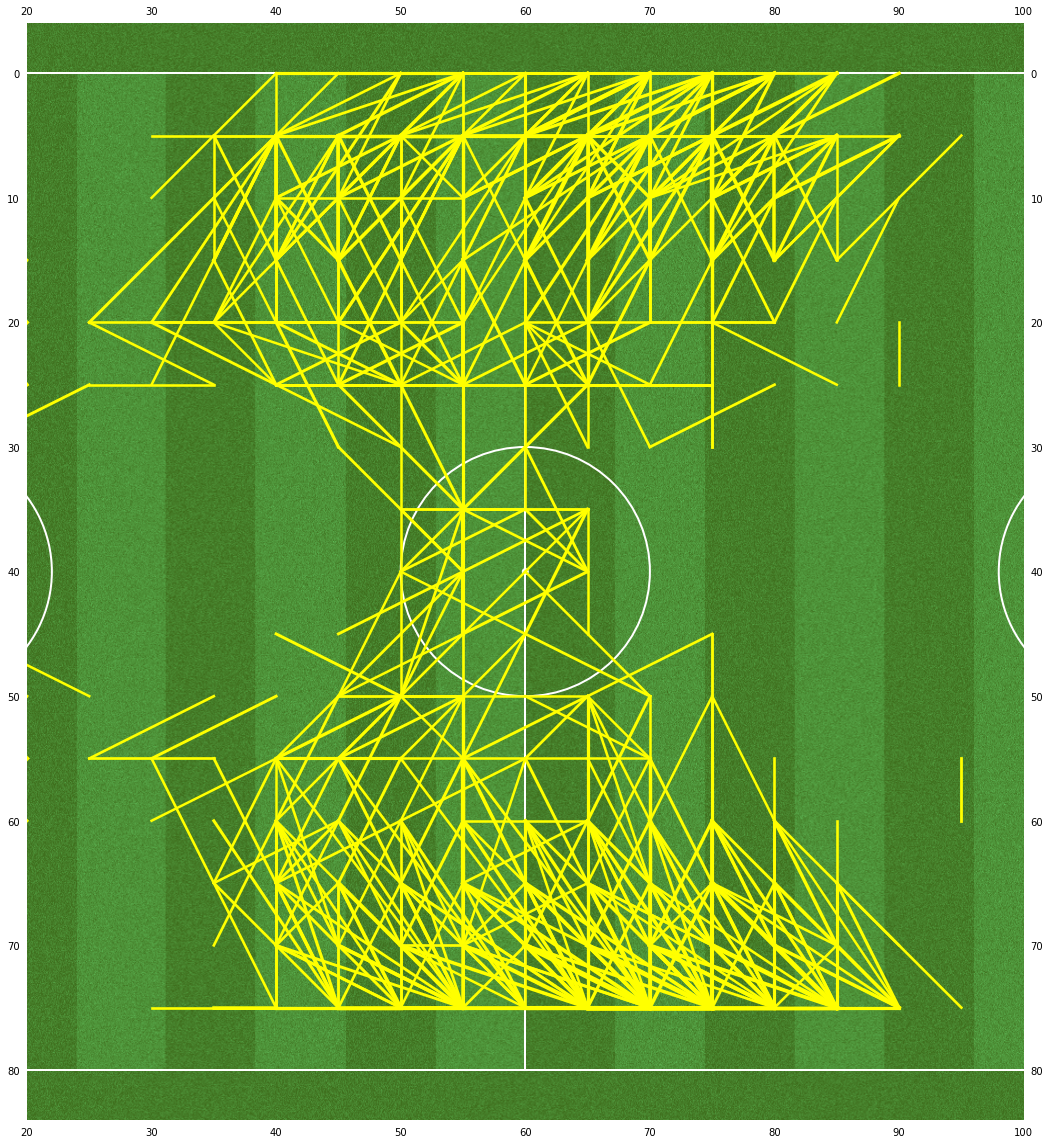

In [134]:
pitch = Pitch(half = True, pad_left = 40, pad_right = -20, pitch_type='statsbomb', pitch_color='grass', line_color='white', stripe=True, label = True)
fig, ax = pitch.draw(figsize=(16, 16))

for row in top.iterrows():
    info = row[1]
    #print(info['count'])
    ax.plot([info['location_x'], info['pass_end_location_x']], [info['location_y'], info['pass_end_location_y']], color = 'yellow', linewidth = 0.05 * info['count'])
    #ax.plot([x_locations], y_locations, color = 'yellow', linewidth = 0.01)



## Looking at duel dataframe.

In [163]:
duels = pd.read_csv('duel_df.csv')
duels.head(5)

type_id    type_name  possession_team_id possession_team_name  \
0       35  Starting XI                 974          Reading WFC   
1       35  Starting XI                 974          Reading WFC   
2       18   Half Start                 974          Reading WFC   
3       18   Half Start                 974          Reading WFC   
4       30         Pass                 969  Birmingham City WFC   

   play_pattern_id play_pattern_name  team_id            team_name  match_id  \
0                1      Regular Play      974          Reading WFC   2275050   
1                1      Regular Play      969  Birmingham City WFC   2275050   
2                1      Regular Play      969  Birmingham City WFC   2275050   
3                1      Regular Play      974          Reading WFC   2275050   
4                9     From Kick Off      969  Birmingham City WFC   2275050   

                                     id  index  period     timestamp  minute  \
0  91fdaa62-e36b-4aca-8c56-7a6d32289483      1       1  00:00:00.000       0   
1  aae12223-7969-4f4e-ac4e-83b075af1352      2       1  00:00:00.000       0   
2  ba7b6ef4-edab-43e9-8ed2-ccc073667b8f      3       1  00:00:00.000       0   
3  f8f30929-e011-4ea9-bbc9-c22873023d5f      4       1  00:00:00.000       0   
4  c0927b64-b182-4e44-83f0-b77222d600f8      5       1  00:00:00.443       0   

   second  possession counterpress duel_type outcome  
0       0           1          NaN       NaN     NaN  
1       0           1          NaN       NaN     NaN  
2       0           1          NaN       NaN     NaN  
3       0           1          NaN       NaN     NaN  
4       0           2          NaN       NaN     NaN

In [164]:
duels.shape

(3970562, 19)

In [168]:
duels_actual = duels[duels.get('type_name') == 'Duel'].reset_index(drop = True)
duels_actual.head(5)

type_id type_name  possession_team_id possession_team_name  \
0        4      Duel                 974          Reading WFC   
1        4      Duel                 974          Reading WFC   
2        4      Duel                 974          Reading WFC   
3        4      Duel                 974          Reading WFC   
4        4      Duel                 969  Birmingham City WFC   

   play_pattern_id play_pattern_name  team_id    team_name  match_id  \
0                7    From Goal Kick      974  Reading WFC   2275050   
1                1      Regular Play      974  Reading WFC   2275050   
2                1      Regular Play      974  Reading WFC   2275050   
3                1      Regular Play      974  Reading WFC   2275050   
4                8       From Keeper      974  Reading WFC   2275050   

                                     id  index  period     timestamp  minute  \
0  ebee3b2d-a669-42ef-9566-d827fd69183c     32       1  00:01:20.740       1   
1  ec4e35a8-df0f-4415-8ea9-3e4db6abbc72     44       1  00:01:37.078       1   
2  096be974-cb6c-4a4c-84e4-1d17a2c893df    102       1  00:02:26.654       2   
3  6ecf7cdc-9af2-4844-98d1-31e58865ff4d    122       1  00:03:26.776       3   
4  c8d80843-cb54-41df-99d9-2c27c5b05035    172       1  00:05:13.476       5   

   second  possession counterpress    duel_type outcome  
0      20           3          NaN  Aerial Lost     NaN  
1      37           6         True       Tackle     NaN  
2      26           8         True       Tackle     NaN  
3      26          12         True       Tackle     NaN  
4      13          16          NaN       Tackle     NaN

In [169]:
duels_actual.shape

(70200, 19)

### Examining what leads to duels the most.

In [175]:
duels_patterns = duels_actual.get('play_pattern_name').value_counts(dropna = False)

<AxesSubplot:>

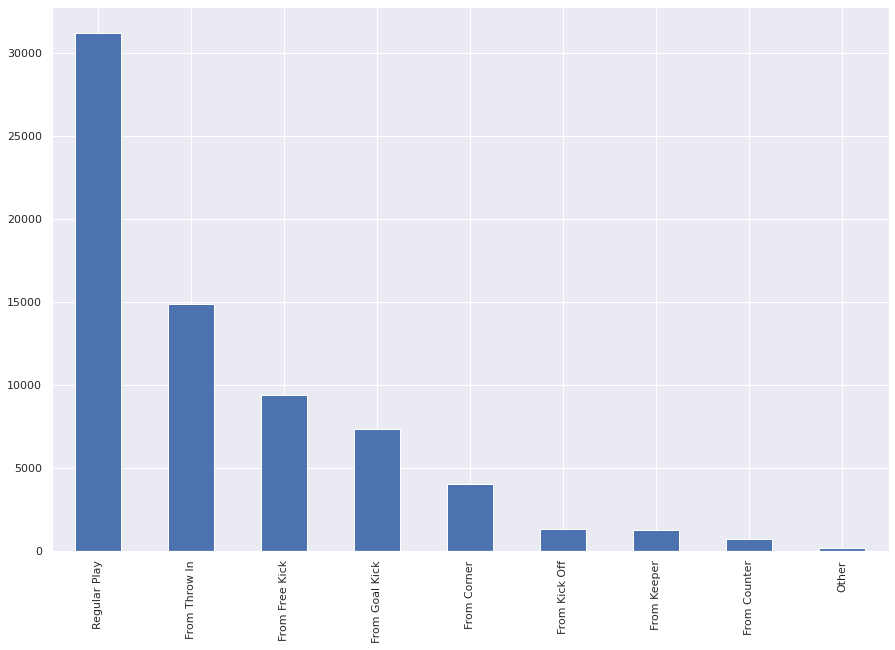

In [178]:
duels_patterns.plot(kind = 'bar')

In [180]:
 duels_actual.get('outcome').value_counts(dropna = False)

NaN        69228
success      606
fail         366
Name: outcome, dtype: int64

^ Did we assign these values to duels??? A lot of nuance is missing here based on documentation at: https://github.com/statsbomb/open-data/blob/master/doc/Open%20Data%20Events%20v4.0.0.pdf

Should be several values for outcome - Lost, Won, Lost in Play, Lost Out, Success, Success in Play, Success Out.

Additionally not sure why there are nans here, all duels should have an outcome.

### NEW DFs

In [3]:
coord_events = pd.read_csv('coord_events_new.csv')
coord_events.head(5)

possession_team_name  location_x  location_y    type_name
0          Reading WFC         NaN         NaN  Starting XI
1          Reading WFC         NaN         NaN  Starting XI
2          Reading WFC         NaN         NaN   Half Start
3          Reading WFC         NaN         NaN   Half Start
4  Birmingham City WFC        61.0        40.1         Pass

In [4]:
players = pd.read_csv('players.csv')
players.head(5)

player_name
0              NaN
1              NaN
2              NaN
3              NaN
4  Rachel Williams

In [13]:
players.dropna()

player_name
4               Rachel Williams
5               Lucy Staniforth
6               Lucy Staniforth
7         Amalie Vevle Eikeland
8               Lucy Staniforth
...                         ...
3970555             Yann Sommer
3970556            Ruben Vargas
3970557     Unai Simón Mendibil
3970558  Mikel Oyarzabal Ugarte
3970559             Yann Sommer

[3950640 rows x 1 columns]

In [6]:
players.shape

(3970562, 1)

In [5]:
no_nulls = pd.read_csv('nonNull.csv')[['type_name']]
no_nulls.head(5)

type_name
0  Starting XI
1  Starting XI
2   Half Start
3   Half Start
4         Pass

In [7]:
no_nulls.shape

(3970562, 1)

In [6]:
players_added = pd.concat([no_nulls, players], axis = 1)
players_added.head(5)

type_name      player_name
0  Starting XI              NaN
1  Starting XI              NaN
2   Half Start              NaN
3   Half Start              NaN
4         Pass  Rachel Williams

0                             NaN
1                             NaN
2                             NaN
3                             NaN
4                 Rachel Williams
                    ...          
3970557       Unai Simón Mendibil
3970558    Mikel Oyarzabal Ugarte
3970559               Yann Sommer
3970560                       NaN
3970561                       NaN
Name: player_name, Length: 3970562, dtype: object

In [7]:
players_passes = players_added[players_added.get("type_name") == "Pass"].reset_index(drop = True)
players_passes

type_name                     player_name
0            Pass                 Rachel Williams
1            Pass                 Lucy Staniforth
2            Pass                    Rachael Laws
3            Pass                   Sophie Howard
4            Pass                Rebecca Holloway
...           ...                             ...
1098101      Pass         César Azpilicueta Tanco
1098102      Pass  Thiago Alcântara do Nascimento
1098103      Pass                Jordi Alba Ramos
1098104      Pass          Mikel Oyarzabal Ugarte
1098105      Pass          Marcos Llorente Moreno

[1098106 rows x 2 columns]

In [12]:
players_passes.dropna()

Empty DataFrame
Columns: [type_name, player_name]
Index: []

In [10]:
passes_with_players = pd.concat([passes_clean, players_passes['player_name']], axis = 1)
passes_with_players

type_id type_name  possession_team_id possession_team_name  \
0             30      Pass                 969  Birmingham City WFC   
1             30      Pass                 969  Birmingham City WFC   
2             30      Pass                 974          Reading WFC   
3             30      Pass                 974          Reading WFC   
4             30      Pass                 974          Reading WFC   
...          ...       ...                 ...                  ...   
1098101       30      Pass                 772                Spain   
1098102       30      Pass                 772                Spain   
1098103       30      Pass                 772                Spain   
1098104       30      Pass                 772                Spain   
1098105       30      Pass                 772                Spain   

         play_pattern_id play_pattern_name  team_id            team_name  \
0                      9     From Kick Off      969  Birmingham City WFC   
1                      9     From Kick Off      969  Birmingham City WFC   
2                      7    From Goal Kick      974          Reading WFC   
3                      7    From Goal Kick      974          Reading WFC   
4                      7    From Goal Kick      969  Birmingham City WFC   
...                  ...               ...      ...                  ...   
1098101                3    From Free Kick      772                Spain   
1098102                3    From Free Kick      772                Spain   
1098103                3    From Free Kick      772                Spain   
1098104                3    From Free Kick      772                Spain   
1098105                3    From Free Kick      772                Spain   

         match_id                                    id  ...  pass_type_id  \
0         2275050  c0927b64-b182-4e44-83f0-b77222d600f8  ...          65.0   
1         2275050  71905fc2-e4fb-4429-8f44-11c3942ade7d  ...           NaN   
2         2275050  7c8f43bb-78d6-421b-a485-c8ddb83e7b1d  ...          63.0   
3         2275050  575a6ca7-9736-4487-bd1f-12ee10011319  ...           NaN   
4         2275050  719c6c68-fa1e-4aab-ab70-601450bc44d6  ...           NaN   
...           ...                                   ...  ...           ...   
1098101   3795108  506b0d88-432a-41fe-8287-10e28b6e5e5e  ...          62.0   
1098102   3795108  6233e16a-b147-4b4b-86af-a8e54038abc5  ...           NaN   
1098103   3795108  8860a417-f611-4096-a765-16cf5aee1d3f  ...           NaN   
1098104   3795108  00346026-c1c9-4584-82db-8b96b3bd3df3  ...           NaN   
1098105   3795108  7397eaf0-cf04-4497-b045-852b3f921a92  ...           NaN   

         pass_type_name pass_body_part_id  pass_body_part_name  \
0              Kick Off              40.0           Right Foot   
1                   NaN              40.0           Right Foot   
2             Goal Kick              38.0            Left Foot   
3                   NaN              40.0           Right Foot   
4                   NaN              38.0            Left Foot   
...                 ...               ...                  ...   
1098101       Free Kick              40.0           Right Foot   
1098102             NaN              40.0           Right Foot   
1098103             NaN              38.0            Left Foot   
1098104             NaN              38.0            Left Foot   
1098105             NaN              40.0           Right Foot   

         pass_end_location_x  pass_end_location_y  location_x  location_y  \
0                       53.9                 39.6        61.0        40.1   
1                      118.4                 72.9        52.8        42.7   
2                       13.4                 54.2         6.0        44.0   
3                       62.0                 60.2        39.6        58.2   
4                       69.9                 13.3        35.8         9.9   
...                      ...                  ...  

In [11]:
passes_with_players.columns

Index(['type_id', 'type_name', 'possession_team_id', 'possession_team_name',
       'play_pattern_id', 'play_pattern_name', 'team_id', 'team_name',
       'match_id', 'id', 'index', 'period', 'timestamp', 'minute', 'second',
       'possession', 'pass_length', 'pass_angle', 'pass_recipient_id',
       'pass_recipient_name', 'pass_height_id', 'pass_height_name',
       'pass_type_id', 'pass_type_name', 'pass_body_part_id',
       'pass_body_part_name', 'pass_end_location_x', 'pass_end_location_y',
       'location_x', 'location_y', 'Success', 'player_name'],
      dtype='object')

In [12]:
passes_with_players.to_csv('passes_players.csv', index = False)

In [13]:
passes_barcelona = passes_with_players[passes_with_players.get("possession_team_name") == "Barcelona"].reset_index(drop = True)
passes_barcelona.head(5)

type_id type_name  possession_team_id possession_team_name  \
0       30      Pass                 217            Barcelona   
1       30      Pass                 217            Barcelona   
2       30      Pass                 217            Barcelona   
3       30      Pass                 217            Barcelona   
4       30      Pass                 217            Barcelona   

   play_pattern_id play_pattern_name  team_id  team_name  match_id  \
0                1      Regular Play      217  Barcelona    265958   
1                1      Regular Play      217  Barcelona    265958   
2                1      Regular Play      217  Barcelona    265958   
3                1      Regular Play      217  Barcelona    265958   
4                1      Regular Play      217  Barcelona    265958   

                                     id  ...  pass_type_id  pass_type_name  \
0  e97ecc5e-c15f-47af-8d3b-32af0c55ef3a  ...          66.0        Recovery   
1  7abe637c-cf0c-4542-90d7-734efb64b117  ...           NaN             NaN   
2  3a34c87d-62b3-4882-9534-eb58e305fd80  ...           NaN             NaN   
3  58a5c756-71f9-43c9-b494-3666e6aa723a  ...           NaN             NaN   
4  8772dc6c-83f4-4239-a03f-146f383a7f2c  ...           NaN             NaN   

  pass_body_part_id  pass_body_part_name  pass_end_location_x  \
0              40.0           Right Foot                 35.6   
1              38.0            Left Foot                 19.8   
2              40.0           Right Foot                 14.0   
3              40.0           Right Foot                 19.8   
4              40.0           Right Foot                  3.4   

   pass_end_location_y  location_x  location_y  Success  \
0                  3.4        56.1         6.5     True   
1                 11.0        32.9         5.9     True   
2                 47.8        19.4        13.3     True   
3                 75.1         4.4        57.8     True   
4                 65.5        19.8        72.0     True   

                     player_name  
0  Neymar da Silva Santos Junior  
1               Jordi Alba Ramos  
2    Javier Alejandro Mascherano  
3          Gerard Piqué Bernabéu  
4          Daniel Alves da Silva  

[5 rows x 32 columns]

In [56]:
passes_barcelona['player_name'].value_counts()[0:30]

Lionel Andrés Messi Cuccittini       28060
Sergio Busquets i Burgos             25945
Xavier Hernández Creus               23010
Gerard Piqué Bernabéu                19940
Andrés Iniesta Luján                 19688
Jordi Alba Ramos                     17324
Daniel Alves da Silva                17313
Javier Alejandro Mascherano          11376
Ivan Rakitić                         11000
Sergi Roberto Carnicer                9172
Carles Puyol i Saforcada              8784
Víctor Valdés Arribas                 6655
Eric-Sylvain Bilal Abidal             6577
Pedro Eliezer Rodríguez Ledesma       5664
Marc-André ter Stegen                 5542
Adriano Correia Claro                 5537
Neymar da Silva Santos Junior         5450
Francesc Fàbregas i Soler             5223
Samuel Yves Umtiti                    5036
Luis Alberto Suárez Díaz              4949
Clément Lenglet                       4864
Rafael Márquez Álvarez                4706
Seydou Kéita                          3879
Frenkie de 

In [25]:
grouped_barca = passes_barcelona.groupby(['player_name', 'pass_recipient_name']).count()['Success']

In [28]:
grouped_barca.idxmax()

('Sergio Busquets i Burgos', 'Lionel Andrés Messi Cuccittini')

In [47]:
grouped_barca.loc[('Sergio Busquets i Burgos', 'Lionel Andrés Messi Cuccittini')]

4032

In [32]:
grouped_barca.sort_values(ascending = False)[0:30]

player_name                     pass_recipient_name            
Sergio Busquets i Burgos        Lionel Andrés Messi Cuccittini     4032
Daniel Alves da Silva           Lionel Andrés Messi Cuccittini     3879
Xavier Hernández Creus          Lionel Andrés Messi Cuccittini     3253
Lionel Andrés Messi Cuccittini  Xavier Hernández Creus             2609
Xavier Hernández Creus          Daniel Alves da Silva              2598
Daniel Alves da Silva           Xavier Hernández Creus             2533
Andrés Iniesta Luján            Lionel Andrés Messi Cuccittini     2521
Lionel Andrés Messi Cuccittini  Andrés Iniesta Luján               2341
                                Daniel Alves da Silva              2269
                                Sergio Busquets i Burgos           2110
Sergio Busquets i Burgos        Gerard Piqué Bernabéu              2033
Xavier Hernández Creus          Andrés Iniesta Luján               2010
Sergio Busquets i Burgos        Xavier Hernández Creus             1992


In [122]:
grouped_barca.loc['Víctor Valdés Arribas', :]

player_name            pass_recipient_name                 
Víctor Valdés Arribas  Adriano Correia Claro                    93
                       Alexandre Dimitri Song-Billong           17
                       Alexis Alejandro Sánchez Sánchez        115
                       Aliaksandr Hleb                           4
                       Anderson Luís de Souza                   51
                       Andreu Fontàs Prat                       20
                       Andrés Iniesta Luján                    180
                       Bojan Krkíc Pérez                        24
                       Carles Puyol i Saforcada                574
                       Cristian Tello Herrera                   11
                       Daniel Alves da Silva                   334
                       David Villa Sánchez                      60
                       Dmytro Chygrynskiy                       60
                       Eiður Smári Guðjohnsen                   48
  

In [ ]:
passe

In [ ]:
# busquets - usually center defensive mid 1 
# messi - right wing or center forwards 2
# alves da silva - right back 3
# xavier hernandez creus - right center mid or left center mid 4
# iniesta - left center mid or right center mid 5
# pique - right center back 6
# jordi alba - left back 7
# ivan rakitic - right center mid 8
# sergi roberto carnicer - right back 9 --> alves takes precedence
# luis suarzes - center forward 10
# Javier Alejandro Mascherano - left center back or right center back
# pedro eliezer rodriguez ledesma - right wing

# Eric-Sylvain Bilal Abidal            


In [35]:
tactics.columns

Index(['id', 'timestamp', 'formation', 'player_id', 'name', 'position_id',
       'position', 'jersey'],
      dtype='object')

In [58]:
tactics[tactics.get("name") == 'Marc-André ter Stegen']['position'].value_counts()

Goalkeeper    334
Name: position, dtype: int64

In [14]:
most_common_positions = tactics.groupby('name')['position'].agg([pd.Series.mode, pd.Series.count])

In [15]:
most_common_positions

mode  \
name                                                                            
Aaron Hughes                                                       Right Back   
Aaron Mooy                                               Left Center Midfield   
Aaron Ramsey                [Center Attacking Midfield, Left Center Midfield]   
Aarón Escandell Banacloche                                         Goalkeeper   
Aarón Martín Caricol                                                Left Back   
...                                                                       ...   
İrfan Can Kahveci           [Left Attacking Midfield, Left Center Midfield...   
Ľubomír Šatka                                               Right Center Back   
Łukasz Fabiański                                                   Goalkeeper   
Łukasz Piszczek                                 [Right Back, Right Wing Back]   
Šime Vrsaljko                                                      Right Back   

                            count  
name                               
Aaron Hughes                    2  
Aaron Mooy                      3  
Aaron Ramsey                    7  
Aarón Escandell Banacloche      1  
Aarón Martín Caricol            7  
...                           ...  
İrfan Can Kahveci               4  
Ľubomír Šatka                   5  
Łukasz Fabiański                1  
Łukasz Piszczek                 5  
Šime Vrsaljko                  18  

[3878 rows x 2 columns]

In [16]:
unique_barca_players = passes_barcelona.get('player_name').unique()
unique_barca_players

array(['Neymar da Silva Santos Junior', 'Jordi Alba Ramos',
       'Javier Alejandro Mascherano', ..., 'Stephane Dalmat',
       'Eliaquim Mangala', 'Luís Carlos Almeida da Cunha'], dtype=object)

In [17]:
bp_df = pd.DataFrame({'name': unique_barca_players})
bp_df

name
0     Neymar da Silva Santos Junior
1                  Jordi Alba Ramos
2       Javier Alejandro Mascherano
3             Gerard Piqué Bernabéu
4             Daniel Alves da Silva
...                             ...
1832             José Moratón Taeño
1833  Francisco Borja Enrique Ayesa
1834                Stephane Dalmat
1835               Eliaquim Mangala
1836   Luís Carlos Almeida da Cunha

[1837 rows x 1 columns]

In [18]:
bpp_df = most_common_positions.merge(bp_df, left_index = True, right_on = 'name')

In [19]:
bpp_df['position'] = bpp_df['mode'].transform(lambda x: x[0] if len(x[0]) != 1 else x)

In [20]:
bpp_df = bpp_df.drop('mode', axis = 1)
bpp_df

count                        name                   position
1742      1  Aarón Escandell Banacloche                 Goalkeeper
239       7        Aarón Martín Caricol                  Left Back
1370      2       Aarón Níguez Esclapez                  Left Wing
1058      2           Abdelaziz Barrada  Center Attacking Midfield
209       4           Abdoul Karim Yoda             Right Midfield
...     ...                         ...                        ...
884      10         Óscar Plano Pedreño        Left Center Forward
1195      4      Óscar Rodríguez Arnaiz                 Right Wing
609       9     Óscar Serrano Rodriguez              Left Midfield
185      30       Óscar de Marcos Arana                 Right Back
1504     18               Šime Vrsaljko                 Right Back

[1761 rows x 3 columns]

In [21]:
bpp_df.sort_values(by = 'count', ascending = False)[0:20]

count                             name                   position
10     940   Lionel Andrés Messi Cuccittini                 Right Wing
6      637         Sergio Busquets i Burgos  Center Defensive Midfield
3      603            Gerard Piqué Bernabéu          Right Center Back
37     510            Víctor Valdés Arribas                 Goalkeeper
8      500             Andrés Iniesta Luján       Left Center Midfield
1      452                 Jordi Alba Ramos                  Left Back
31     445           Xavier Hernández Creus      Right Center Midfield
4      404            Daniel Alves da Silva                 Right Back
26     336         Carles Puyol i Saforcada           Left Center Back
2      336      Javier Alejandro Mascherano           Left Center Back
13     334            Marc-André ter Stegen                 Goalkeeper
12     305         Luis Alberto Suárez Díaz             Center Forward
7      290                     Ivan Rakitić      Right Center Midfield
73     245           Sergi Roberto Carnicer                 Right Back
60     237  Pedro Eliezer Rodríguez Ledesma                 Right Wing
35     202        Eric-Sylvain Bilal Abidal                  Left Back
0      181    Neymar da Silva Santos Junior                  Left Wing
124    164            Adriano Correia Claro                  Left Back
29     164                    Thierry Henry                  Left Wing
75     161                Antoine Griezmann                  Left Wing

In [ ]:
messi - right wing 1, sergio busquets - cdm 2, pique - rcb 3, victor valdes arribas - goalkeeper 4
andres iniesta lujan - lcm 5, jordi alba ramos - left back 6, xavier hernandez creus - rcm 7,
daniel alaves de silva - rb 8, carles puyol i Saforcada - lcb 9, luis suarez - cf 10, neymar - lw 11


In [ ]:
goal keeper, 
rb, left back, left center back, right center back
center defensive mid, left center mid, right center mid
left wing, center forward, right wing

'the barca ideal lineup'

In [22]:
ideal_barca = ['Lionel Andrés Messi Cuccittini', 'Sergio Busquets i Burgos', 'Gerard Piqué Bernabéu', 'Víctor Valdés Arribas', 'Andrés Iniesta Luján', 'Jordi Alba Ramos', 'Xavier Hernández Creus', 'Daniel Alves da Silva', 'Carles Puyol i Saforcada', 'Luis Alberto Suárez Díaz', 'Neymar da Silva Santos Junior']

In [26]:
passmap_relationships = []

In [27]:
for player in ideal_barca:
    for inner_player in ideal_barca:
        if player == inner_player:
            continue
        print(player, inner_player)
        if (player, inner_player) in grouped_barca.index:
            relation = grouped_barca.loc[(player, inner_player)]
        else:
            relation = 0
        print(relation)
        passmap_relationships.append([player, inner_player, relation])
        

Lionel Andrés Messi Cuccittini Sergio Busquets i Burgos
2110
Lionel Andrés Messi Cuccittini Gerard Piqué Bernabéu
577
Lionel Andrés Messi Cuccittini Víctor Valdés Arribas
4
Lionel Andrés Messi Cuccittini Andrés Iniesta Luján
2341
Lionel Andrés Messi Cuccittini Jordi Alba Ramos
1193
Lionel Andrés Messi Cuccittini Xavier Hernández Creus
2609
Lionel Andrés Messi Cuccittini Daniel Alves da Silva
2269
Lionel Andrés Messi Cuccittini Carles Puyol i Saforcada
159
Lionel Andrés Messi Cuccittini Luis Alberto Suárez Díaz
1364
Lionel Andrés Messi Cuccittini Neymar da Silva Santos Junior
998
Sergio Busquets i Burgos Lionel Andrés Messi Cuccittini
4032
Sergio Busquets i Burgos Gerard Piqué Bernabéu
2033
Sergio Busquets i Burgos Víctor Valdés Arribas
115
Sergio Busquets i Burgos Andrés Iniesta Luján
1860
Sergio Busquets i Burgos Jordi Alba Ramos
1228
Sergio Busquets i Burgos Xavier Hernández Creus
1992
Sergio Busquets i Burgos Daniel Alves da Silva
1275
Sergio Busquets i Burgos Carles Puyol i Saforca

In [28]:
passmap_relationships_df = pd.DataFrame(passmap_relationships, columns = ['from', 'to', 'count'])

In [29]:
passmap_relationships_df

from                        to  count
0    Lionel Andrés Messi Cuccittini  Sergio Busquets i Burgos   2110
1    Lionel Andrés Messi Cuccittini     Gerard Piqué Bernabéu    577
2    Lionel Andrés Messi Cuccittini     Víctor Valdés Arribas      4
3    Lionel Andrés Messi Cuccittini      Andrés Iniesta Luján   2341
4    Lionel Andrés Messi Cuccittini          Jordi Alba Ramos   1193
..                              ...                       ...    ...
105   Neymar da Silva Santos Junior          Jordi Alba Ramos    620
106   Neymar da Silva Santos Junior    Xavier Hernández Creus    194
107   Neymar da Silva Santos Junior     Daniel Alves da Silva    120
108   Neymar da Silva Santos Junior  Carles Puyol i Saforcada      5
109   Neymar da Silva Santos Junior  Luis Alberto Suárez Díaz    577

[110 rows x 3 columns]

In [ ]:
# not enough data

In [30]:
passmap_relationships_df[passmap_relationships_df['count'] == 0]

from                        to  count
38           Víctor Valdés Arribas  Luis Alberto Suárez Díaz      0
88        Carles Puyol i Saforcada  Luis Alberto Suárez Díaz      0
93        Luis Alberto Suárez Díaz     Víctor Valdés Arribas      0
98        Luis Alberto Suárez Díaz  Carles Puyol i Saforcada      0
103  Neymar da Silva Santos Junior     Víctor Valdés Arribas      0

In [31]:
player_locs = []

In [32]:
for player in ideal_barca:
    my_passes = passes_barcelona[passes_barcelona.get('player_name') == player]
    avg_x = my_passes.get('location_x').mean()
    avg_y = my_passes.get('location_y').mean()
    player_locs.append([player, avg_x, avg_y])

In [135]:
fix = np.array(player_locs)
old_xs = fix[:, 1]
old_ys = fix[:, 2]

In [33]:
player_locs

[['Lionel Andrés Messi Cuccittini', 80.44338203848953, 48.968317890235134],
 ['Sergio Busquets i Burgos', 59.42866448255924, 40.79259202158424],
 ['Gerard Piqué Bernabéu', 45.487848545636886, 51.30842026078224],
 ['Víctor Valdés Arribas', 11.71627347858754, 41.33612321562739],
 ['Andrés Iniesta Luján', 70.28523973994294, 29.342533522958195],
 ['Jordi Alba Ramos', 66.91118679288834, 11.605241283768207],
 ['Xavier Hernández Creus', 68.67591481964295, 45.0417601043025],
 ['Daniel Alves da Silva', 69.54320452838876, 69.0342863744007],
 ['Carles Puyol i Saforcada', 45.60923269581037, 40.190163934426245],
 ['Luis Alberto Suárez Díaz', 83.3671650838553, 38.63176399272578],
 ['Neymar da Silva Santos Junior', 85.08464220183497, 20.745944954128454]]

In [34]:
loc_df = pd.DataFrame(player_locs, columns = ['name', 'avg_x', 'avg_y'])
loc_df

name      avg_x      avg_y
0   Lionel Andrés Messi Cuccittini  80.443382  48.968318
1         Sergio Busquets i Burgos  59.428664  40.792592
2            Gerard Piqué Bernabéu  45.487849  51.308420
3            Víctor Valdés Arribas  11.716273  41.336123
4             Andrés Iniesta Luján  70.285240  29.342534
5                 Jordi Alba Ramos  66.911187  11.605241
6           Xavier Hernández Creus  68.675915  45.041760
7            Daniel Alves da Silva  69.543205  69.034286
8         Carles Puyol i Saforcada  45.609233  40.190164
9         Luis Alberto Suárez Díaz  83.367165  38.631764
10   Neymar da Silva Santos Junior  85.084642  20.745945

In [35]:
loc_df = loc_df.merge(bpp_df, left_on = 'name', right_on = 'name').drop(['count'], axis = 1)
loc_df

name      avg_x      avg_y  \
0   Lionel Andrés Messi Cuccittini  80.443382  48.968318   
1         Sergio Busquets i Burgos  59.428664  40.792592   
2            Gerard Piqué Bernabéu  45.487849  51.308420   
3            Víctor Valdés Arribas  11.716273  41.336123   
4             Andrés Iniesta Luján  70.285240  29.342534   
5                 Jordi Alba Ramos  66.911187  11.605241   
6           Xavier Hernández Creus  68.675915  45.041760   
7            Daniel Alves da Silva  69.543205  69.034286   
8         Carles Puyol i Saforcada  45.609233  40.190164   
9         Luis Alberto Suárez Díaz  83.367165  38.631764   
10   Neymar da Silva Santos Junior  85.084642  20.745945   

                     position  
0                  Right Wing  
1   Center Defensive Midfield  
2           Right Center Back  
3                  Goalkeeper  
4        Left Center Midfield  
5                   Left Back  
6       Right Center Midfield  
7                  Right Back  
8            Left Center Back  
9              Center Forward  
10                  Left Wing

In [36]:
to_locs = passmap_relationships_df.merge(loc_df, left_on = 'from', right_on = 'name').drop(['name'], axis = 1)
to_locs

from                        to  count  \
0    Lionel Andrés Messi Cuccittini  Sergio Busquets i Burgos   2110   
1    Lionel Andrés Messi Cuccittini     Gerard Piqué Bernabéu    577   
2    Lionel Andrés Messi Cuccittini     Víctor Valdés Arribas      4   
3    Lionel Andrés Messi Cuccittini      Andrés Iniesta Luján   2341   
4    Lionel Andrés Messi Cuccittini          Jordi Alba Ramos   1193   
..                              ...                       ...    ...   
105   Neymar da Silva Santos Junior          Jordi Alba Ramos    620   
106   Neymar da Silva Santos Junior    Xavier Hernández Creus    194   
107   Neymar da Silva Santos Junior     Daniel Alves da Silva    120   
108   Neymar da Silva Santos Junior  Carles Puyol i Saforcada      5   
109   Neymar da Silva Santos Junior  Luis Alberto Suárez Díaz    577   

         avg_x      avg_y    position  
0    80.443382  48.968318  Right Wing  
1    80.443382  48.968318  Right Wing  
2    80.443382  48.968318  Right Wing  
3    80.443382  48.968318  Right Wing  
4    80.443382  48.968318  Right Wing  
..         ...        ...         ...  
105  85.084642  20.745945   Left Wing  
106  85.084642  20.745945   Left Wing  
107  85.084642  20.745945   Left Wing  
108  85.084642  20.745945   Left Wing  
109  85.084642  20.745945   Left Wing  

[110 rows x 6 columns]

In [37]:
to_from_locs = to_locs.merge(loc_df, left_on = 'to', right_on = 'name').drop(['name'], axis = 1)
to_from_locs = to_from_locs.rename(columns = {'avg_x_x': 'from_x', 'avg_y_x': 'from_y', 'avg_x_y': 'to_x', 'avg_y_y': 'to_y'})
to_from_locs

from                              to  count  \
0    Lionel Andrés Messi Cuccittini        Sergio Busquets i Burgos   2110   
1             Gerard Piqué Bernabéu        Sergio Busquets i Burgos   1954   
2             Víctor Valdés Arribas        Sergio Busquets i Burgos    307   
3              Andrés Iniesta Luján        Sergio Busquets i Burgos   1455   
4                  Jordi Alba Ramos        Sergio Busquets i Burgos   1380   
..                              ...                             ...    ...   
105          Xavier Hernández Creus  Lionel Andrés Messi Cuccittini   3253   
106           Daniel Alves da Silva  Lionel Andrés Messi Cuccittini   3879   
107        Carles Puyol i Saforcada  Lionel Andrés Messi Cuccittini    281   
108        Luis Alberto Suárez Díaz  Lionel Andrés Messi Cuccittini   1236   
109   Neymar da Silva Santos Junior  Lionel Andrés Messi Cuccittini   1094   

        from_x     from_y             position_x       to_x       to_y  \
0    80.443382  48.968318             Right Wing  59.428664  40.792592   
1    45.487849  51.308420      Right Center Back  59.428664  40.792592   
2    11.716273  41.336123             Goalkeeper  59.428664  40.792592   
3    70.285240  29.342534   Left Center Midfield  59.428664  40.792592   
4    66.911187  11.605241              Left Back  59.428664  40.792592   
..         ...        ...                    ...        ...        ...   
105  68.675915  45.041760  Right Center Midfield  80.443382  48.968318   
106  69.543205  69.034286             Right Back  80.443382  48.968318   
107  45.609233  40.190164       Left Center Back  80.443382  48.968318   
108  83.367165  38.631764         Center Forward  80.443382  48.968318   
109  85.084642  20.745945              Left Wing  80.443382  48.968318   

                    position_y  
0    Center Defensive Midfield  
1    Center Defensive Midfield  
2    Center Defensive Midfield  
3    Center Defensive Midfield  
4    Center Defensive Midfield  
..                         ...  
105                 Right Wing  
106                 Right Wing  
107                 Right Wing  
108                 Right Wing  
109                 Right Wing  

[110 rows x 9 columns]

In [38]:
#to_from_locs = to_from_locs.merge(bpp_df, left_on = 'from', right_on = 'name').drop(['name'], axis = 1).rename(columns = {'position': 'from_position'})
#to_from_locs = to_from_locs.merge(bpp_df, left_on = 'to', right_on = 'name').drop(['name'], axis = 1).rename(columns = {'position': 'to_position'})
#(['count_x', 'count_y', 'count'], axis = 1)
to_from_locs = to_from_locs.rename(columns = {'position_x': 'from_position', 'position_y':'to_position'})
to_from_locs

from                              to  count  \
0    Lionel Andrés Messi Cuccittini        Sergio Busquets i Burgos   2110   
1             Gerard Piqué Bernabéu        Sergio Busquets i Burgos   1954   
2             Víctor Valdés Arribas        Sergio Busquets i Burgos    307   
3              Andrés Iniesta Luján        Sergio Busquets i Burgos   1455   
4                  Jordi Alba Ramos        Sergio Busquets i Burgos   1380   
..                              ...                             ...    ...   
105          Xavier Hernández Creus  Lionel Andrés Messi Cuccittini   3253   
106           Daniel Alves da Silva  Lionel Andrés Messi Cuccittini   3879   
107        Carles Puyol i Saforcada  Lionel Andrés Messi Cuccittini    281   
108        Luis Alberto Suárez Díaz  Lionel Andrés Messi Cuccittini   1236   
109   Neymar da Silva Santos Junior  Lionel Andrés Messi Cuccittini   1094   

        from_x     from_y          from_position       to_x       to_y  \
0    80.443382  48.968318             Right Wing  59.428664  40.792592   
1    45.487849  51.308420      Right Center Back  59.428664  40.792592   
2    11.716273  41.336123             Goalkeeper  59.428664  40.792592   
3    70.285240  29.342534   Left Center Midfield  59.428664  40.792592   
4    66.911187  11.605241              Left Back  59.428664  40.792592   
..         ...        ...                    ...        ...        ...   
105  68.675915  45.041760  Right Center Midfield  80.443382  48.968318   
106  69.543205  69.034286             Right Back  80.443382  48.968318   
107  45.609233  40.190164       Left Center Back  80.443382  48.968318   
108  83.367165  38.631764         Center Forward  80.443382  48.968318   
109  85.084642  20.745945              Left Wing  80.443382  48.968318   

                   to_position  
0    Center Defensive Midfield  
1    Center Defensive Midfield  
2    Center Defensive Midfield  
3    Center Defensive Midfield  
4    Center Defensive Midfield  
..                         ...  
105                 Right Wing  
106                 Right Wing  
107                 Right Wing  
108                 Right Wing  
109                 Right Wing  

[110 rows x 9 columns]

In [39]:
to_from_locs = to_from_locs.drop('count', axis = 1)
to_from_locs

from                              to  \
0    Lionel Andrés Messi Cuccittini        Sergio Busquets i Burgos   
1             Gerard Piqué Bernabéu        Sergio Busquets i Burgos   
2             Víctor Valdés Arribas        Sergio Busquets i Burgos   
3              Andrés Iniesta Luján        Sergio Busquets i Burgos   
4                  Jordi Alba Ramos        Sergio Busquets i Burgos   
..                              ...                             ...   
105          Xavier Hernández Creus  Lionel Andrés Messi Cuccittini   
106           Daniel Alves da Silva  Lionel Andrés Messi Cuccittini   
107        Carles Puyol i Saforcada  Lionel Andrés Messi Cuccittini   
108        Luis Alberto Suárez Díaz  Lionel Andrés Messi Cuccittini   
109   Neymar da Silva Santos Junior  Lionel Andrés Messi Cuccittini   

        from_x     from_y          from_position       to_x       to_y  \
0    80.443382  48.968318             Right Wing  59.428664  40.792592   
1    45.487849  51.308420      Right Center Back  59.428664  40.792592   
2    11.716273  41.336123             Goalkeeper  59.428664  40.792592   
3    70.285240  29.342534   Left Center Midfield  59.428664  40.792592   
4    66.911187  11.605241              Left Back  59.428664  40.792592   
..         ...        ...                    ...        ...        ...   
105  68.675915  45.041760  Right Center Midfield  80.443382  48.968318   
106  69.543205  69.034286             Right Back  80.443382  48.968318   
107  45.609233  40.190164       Left Center Back  80.443382  48.968318   
108  83.367165  38.631764         Center Forward  80.443382  48.968318   
109  85.084642  20.745945              Left Wing  80.443382  48.968318   

                   to_position  
0    Center Defensive Midfield  
1    Center Defensive Midfield  
2    Center Defensive Midfield  
3    Center Defensive Midfield  
4    Center Defensive Midfield  
..                         ...  
105                 Right Wing  
106                 Right Wing  
107                 Right Wing  
108                 Right Wing  
109                 Right Wing  

[110 rows x 8 columns]

In [151]:
to_from_locs.to_csv('to_from_locs.csv', index = False)

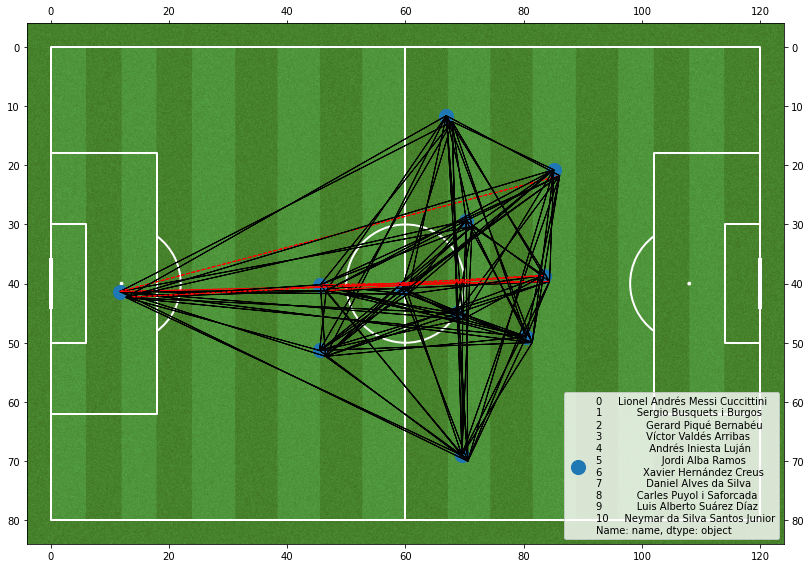

In [180]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white', stripe=True, axis=True, label=True, tick=True)
# specifying figure size (width, height)
fig, ax = pitch.draw(figsize=(16, 8))

ax.scatter(loc_df['avg_x'], loc_df['avg_y'], s = 200, label = loc_df['name'])
ax.legend(loc = 'lower right')

for row in to_from_locs.iterrows():
    current = row[1]
    
    if current['count'] == 0:
        ax.arrow(current['from_x'] + 1, current['from_y'] + 1, current['to_x'] - current['from_x'] - 1, current['to_y'] - current['from_y'] - 1, lw = 1, ls = 'dashed', color = 'red')
    else:
        ax.arrow(current['from_x'] + 1, current['from_y'] + 1, current['to_x'] - current['from_x'] - 1, current['to_y'] - current['from_y'] - 1, lw = 1)
#ax.arrow(to_from_locs.loc[0]['from_x'], to_from_locs.loc[0]['from_y'], to_from_locs.loc[0]['to_x'] - to_from_locs.loc[0]['from_x'], to_from_locs.loc[0]['to_y'] - to_from_locs.loc[0]['from_y'], lw = to_from_locs.loc[0]['count'] * 0.001)



In [181]:
bpp_df

count                        name                   position
1742      1  Aarón Escandell Banacloche                 Goalkeeper
239       7        Aarón Martín Caricol                  Left Back
1370      2       Aarón Níguez Esclapez                  Left Wing
1058      2           Abdelaziz Barrada  Center Attacking Midfield
209       4           Abdoul Karim Yoda             Right Midfield
...     ...                         ...                        ...
884      10         Óscar Plano Pedreño        Left Center Forward
1195      4      Óscar Rodríguez Arnaiz                 Right Wing
609       9     Óscar Serrano Rodriguez              Left Midfield
185      30       Óscar de Marcos Arana                 Right Back
1504     18               Šime Vrsaljko                 Right Back

[1761 rows x 3 columns]

In [186]:
passes_barcelona.columns

Index(['type_id', 'type_name', 'possession_team_id', 'possession_team_name',
       'play_pattern_id', 'play_pattern_name', 'team_id', 'team_name',
       'match_id', 'id', 'index', 'period', 'timestamp', 'minute', 'second',
       'possession', 'pass_length', 'pass_angle', 'pass_recipient_id',
       'pass_recipient_name', 'pass_height_id', 'pass_height_name',
       'pass_type_id', 'pass_type_name', 'pass_body_part_id',
       'pass_body_part_name', 'pass_end_location_x', 'pass_end_location_y',
       'location_x', 'location_y', 'Success', 'player_name'],
      dtype='object')

In [66]:
passes_barcelona_mod = passes_barcelona.merge(bpp_df, left_on = 'pass_recipient_name', right_on = 'name').drop(['count', 'name'], axis = 1).rename(columns = {'position': 'recipient_position'})
passes_barcelona_mod

type_id type_name  possession_team_id possession_team_name  \
0            30      Pass                 217            Barcelona   
1            30      Pass                 217            Barcelona   
2            30      Pass                 217            Barcelona   
3            30      Pass                 217            Barcelona   
4            30      Pass                 217            Barcelona   
...         ...       ...                 ...                  ...   
353839       30      Pass                 217            Barcelona   
353840       30      Pass                 217            Barcelona   
353841       30      Pass                 217            Barcelona   
353842       30      Pass                 217            Barcelona   
353843       30      Pass                 217            Barcelona   

        play_pattern_id play_pattern_name  team_id         team_name  \
0                     1      Regular Play      217         Barcelona   
1                     1      Regular Play      217         Barcelona   
2                     4     From Throw In      217         Barcelona   
3                     4     From Throw In      217         Barcelona   
4                     3    From Free Kick      217         Barcelona   
...                 ...               ...      ...               ...   
353839                3    From Free Kick     1217  Racing Santander   
353840                1      Regular Play     1217  Racing Santander   
353841                1      Regular Play     1217  Racing Santander   
353842                1      Regular Play      213           Sevilla   
353843                4     From Throw In      213           Sevilla   

        match_id                                    id  ...  pass_type_name  \
0         265958  e97ecc5e-c15f-47af-8d3b-32af0c55ef3a  ...        Recovery   
1         265958  a542864e-a927-4e75-9a83-7e91a903b40f  ...             NaN   
2         265958  98dabcba-8a37-4a24-a158-f9fed76611b6  ...             NaN   
3         265958  a82ce2ea-7909-4dc1-ac77-09f586aa1633  ...             NaN   
4         265958  e0270b31-55a5-428a-a1f1-5962943b06aa  ...             NaN   
...          ...                                   ...  ...             ...   
353839     68354  b284f94c-7b4a-4d60-a48f-08243f5a1822  ...        Recovery   
353840     68354  298f6213-b88a-460d-8ab8-4020c6b65035  ...             NaN   
353841     68354  60826079-a0c1-45e6-97d3-2cd1e82727a7  ...        Recovery   
353842     70271  b3a796a1-cb2d-4841-9b53-6eba708ec262  ...             NaN   
353843     70271  958c1836-9b68-4cf9-93a8-9ae6740dfcd9  ...             NaN   

        pass_body_part_id pass_body_part_name  pass_end_location_x  \
0                    40.0          Right Foot                 35.6   
1                    38.0           Left Foot                 51.6   
2                    40.0          Right Foot                101.1   
3                    40.0          Right Foot                 92.9   
4                    40.0          Right Foot                 75.3   
...                   ...                 ...                  ...   
353839               38.0           Left Foot                 65.6   
353840               38.0           Left Foot                 82.8   
353841               37.0                Head                  6.1   
353842               40.0          Right Foot                 27.2   
353843               40.0          Right Foot                 66.9   

        pass_end_location_y  location_x  location_y  Success  \
0                       3.4        56.1         6.5     True   
1                      13.7        41.8        45.7     True   
2                       1.3        97.0         4.7     True   
3                       3.4        70.9        26.5     True   
4                       8.0        93.2        17.2     True   
...                     ...         ...         ...      ...   
353839                 27.6        49.1         3.9     True   


In [41]:
passes_barcelona_mod['passer_position'] = positions_passer
passes_barcelona_mod

NameError: name 'positions_passer' is not defined

In [69]:
bpp_df[bpp_df['name'] == 'Neymar da Silva Santos Junior']

count                           name   position
0    181  Neymar da Silva Santos Junior  Left Wing

In [67]:
passes_barcelona_mod = passes_barcelona_mod.merge(bpp_df, left_on = 'player_name', right_on = 'name')
passes_barcelona_mod

type_id type_name  possession_team_id possession_team_name  \
0            30      Pass                 217            Barcelona   
1            30      Pass                 217            Barcelona   
2            30      Pass                 217            Barcelona   
3            30      Pass                 217            Barcelona   
4            30      Pass                 217            Barcelona   
...         ...       ...                 ...                  ...   
353727       30      Pass                 217            Barcelona   
353728       30      Pass                 217            Barcelona   
353729       30      Pass                 217            Barcelona   
353730       30      Pass                 217            Barcelona   
353731       30      Pass                 217            Barcelona   

        play_pattern_id play_pattern_name  team_id          team_name  \
0                     1      Regular Play      217          Barcelona   
1                     4     From Throw In      217          Barcelona   
2                     1      Regular Play      217          Barcelona   
3                     1      Regular Play      217          Barcelona   
4                     1      Regular Play      217          Barcelona   
...                 ...               ...      ...                ...   
353727                1      Regular Play     1219              Xerez   
353728                3    From Free Kick       39  Manchester United   
353729                1      Regular Play      216             Getafe   
353730                1      Regular Play      221            Levante   
353731                3    From Free Kick     1217   Racing Santander   

        match_id                                    id  ...  \
0         265958  e97ecc5e-c15f-47af-8d3b-32af0c55ef3a  ...   
1         265958  98dabcba-8a37-4a24-a158-f9fed76611b6  ...   
2         265958  e58e2da9-a26d-4b4b-8641-5029a6dc8b82  ...   
3         265958  58490217-68b1-48fd-92da-c853b7a5c88c  ...   
4         265958  40485d2a-3cf1-4a4b-bcf9-b2efd58abde4  ...   
...          ...                                   ...  ...   
353727     69267  0882dae9-6692-4cdf-869b-7958da7d897e  ...   
353728     18236  cd2d0aba-6c25-4282-807e-b34bd7ac7c41  ...   
353729     68339  0f9c2434-2216-40a2-ad79-bdda3ed567e1  ...   
353730     68315  edfcb6fd-fb04-44ad-b24d-4f8706936be5  ...   
353731     69154  62d84ec3-bba6-4a01-a7ea-567ad6530fe0  ...   

        pass_end_location_x  pass_end_location_y location_x  location_y  \
0                      35.6                  3.4       56.1         6.5   
1                     101.1                  1.3       97.0         4.7   
2                      41.6                 16.6       43.9         7.5   
3                     101.8                  1.4       97.0         4.1   
4                      57.6                  4.8       66.9        16.2   
...                     ...                  ...        ...         ...   
353727                 91.7                 31.3      100.3        20.2   
353728                 43.0                 54.0       36.0        41.0   
353729                 99.7                 58.4       80.4        47.0   
353730                 83.9                 15.6       33.4         9.4   
353731                 41.3                 63.1       44.8        68.4   

        Success                    player_name         recipient_position  \
0          True  Neymar da Silva Santos Junior                  Left Back   
1          True  Neymar da Silva Santos Junior                  Left Back   
2          True  Neymar da Silva Santos Junior                  Left Back   
3          True  Neymar da Silva Santos Junior                  Left Back   
4          True  Neymar da Silva Santos Junior                  Left Back   
...         ...                            ...                        ...   
353727     True           Carlos Calvo Sobrado       Left Center Midfield   
353728     True 

In [70]:
passes_barcelona_mod = passes_barcelona_mod.drop(['count', 'Success', 'player_name'], axis = 1).rename(columns = {'position': 'passer-position'})


In [73]:
passes_barcelona_mod = passes_barcelona_mod.rename(columns = {'passer-position': 'passer_position'})

In [54]:
#passes_barcelona_mod = passes_barcelona_mod.merge(bpp_df, left_on = 'pass_recipient_name', right_on = 'name').drop(['count', 'name'], axis = 1).rename(columns={'position': 'recipient_position'})
#passes_barcelona_mod

KeyError: "['name'] not found in axis"

In [74]:
positions_passer = passes_barcelona_mod.get('passer_position')
positions_passer

0                         Left Wing
1                         Left Wing
2                         Left Wing
3                         Left Wing
4                         Left Wing
                    ...            
353727    Center Attacking Midfield
353728                   Goalkeeper
353729             Left Center Back
353730                    Left Wing
353731         Right Center Forward
Name: passer_position, Length: 353732, dtype: object

In [75]:
passes_barcelona_mod.columns

Index(['type_id', 'type_name', 'possession_team_id', 'possession_team_name',
       'play_pattern_id', 'play_pattern_name', 'team_id', 'team_name',
       'match_id', 'id', 'index', 'period', 'timestamp', 'minute', 'second',
       'possession', 'pass_length', 'pass_angle', 'pass_recipient_id',
       'pass_recipient_name', 'pass_height_id', 'pass_height_name',
       'pass_type_id', 'pass_type_name', 'pass_body_part_id',
       'pass_body_part_name', 'pass_end_location_x', 'pass_end_location_y',
       'location_x', 'location_y', 'recipient_position', 'name',
       'passer_position'],
      dtype='object')

In [76]:
positions = ['Right Wing', 'Center Defensive Midfield', 'Right Center Back', 'Goalkeeper', 
             'Left Center Midfield', 'Left Back', 'Right Center Midfield', 'Right Back', 
             'Left Center Back', 'Center Forward', 'Left Wing']

In [77]:
positions

['Right Wing',
 'Center Defensive Midfield',
 'Right Center Back',
 'Goalkeeper',
 'Left Center Midfield',
 'Left Back',
 'Right Center Midfield',
 'Right Back',
 'Left Center Back',
 'Center Forward',
 'Left Wing']

In [78]:
position_to_position_counts = passes_barcelona_mod.groupby(['passer_position', 'recipient_position']).count()['type_id'].rename('count')

In [79]:
position_to_position_counts

passer_position            recipient_position       
Center Attacking Midfield  Center Attacking Midfield     24
                           Center Defensive Midfield      6
                           Center Forward               177
                           Goalkeeper                     4
                           Left Back                     41
                                                       ... 
Right Wing Back            Right Wing                     2
                           Secondary Striker              1
Secondary Striker          Center Forward                 2
                           Left Midfield                  1
                           Right Center Midfield          2
Name: count, Length: 406, dtype: int64

In [80]:
position_to_position_counts.loc['Right Wing']

recipient_position
Center Attacking Midfield      34
Center Defensive Midfield    3160
Center Forward               2700
Goalkeeper                     39
Left Back                    3163
Left Center Back             1201
Left Center Forward            20
Left Center Midfield         6926
Left Defensive Midfield        25
Left Midfield                  16
Left Wing                    3617
Right Back                   6389
Right Center Back            1271
Right Center Forward           12
Right Center Midfield        6435
Right Defensive Midfield      143
Right Midfield                 79
Right Wing                   3544
Right Wing Back                 1
Name: count, dtype: int64

In [83]:
(ideal_barca[0], positions[1])

('Lionel Andrés Messi Cuccittini', 'Center Defensive Midfield')

In [84]:
player_to_position_counts.loc[(ideal_barca[0])].sum()

NameError: name 'player_to_position_counts' is not defined

In [210]:
player_to_position_counts.loc[(ideal_barca[0], positions[1])] / player_to_position_counts.loc[(ideal_barca[0])].sum()

0.08935291079465801

In [85]:
position_position_top11 = []

In [86]:
for index, player in enumerate(ideal_barca):
    for i, pos in enumerate(positions):
        if index == i:
            continue
            
        player_pos = positions[index]
        
        if (player_pos, pos) in position_to_position_counts.index:
            prop_passes = position_to_position_counts.loc[(player_pos, pos)] / position_to_position_counts.loc[player_pos].sum() 
            
        else:
            prop_passes = 0
            
        position_position_top11.append([player, player_pos, pos, prop_passes])
        

In [87]:
position_position_top11

[['Lionel Andrés Messi Cuccittini',
  'Right Wing',
  'Center Defensive Midfield',
  0.08149580915538363],
 ['Lionel Andrés Messi Cuccittini',
  'Right Wing',
  'Right Center Back',
  0.03277885235332044],
 ['Lionel Andrés Messi Cuccittini',
  'Right Wing',
  'Goalkeeper',
  0.0010058027079303674],
 ['Lionel Andrés Messi Cuccittini',
  'Right Wing',
  'Left Center Midfield',
  0.17862024500322374],
 ['Lionel Andrés Messi Cuccittini',
  'Right Wing',
  'Left Back',
  0.08157317859445519],
 ['Lionel Andrés Messi Cuccittini',
  'Right Wing',
  'Right Center Midfield',
  0.16595744680851063],
 ['Lionel Andrés Messi Cuccittini',
  'Right Wing',
  'Right Back',
  0.16477111540941328],
 ['Lionel Andrés Messi Cuccittini',
  'Right Wing',
  'Left Center Back',
  0.030973565441650548],
 ['Lionel Andrés Messi Cuccittini',
  'Right Wing',
  'Center Forward',
  0.06963249516441006],
 ['Lionel Andrés Messi Cuccittini',
  'Right Wing',
  'Left Wing',
  0.09328175370728563],
 ['Sergio Busquets i Burgo

In [88]:
position_position_top_df = pd.DataFrame(position_position_top11, columns = ['name', 'player_pos', 'receipient_pos', 'prop_passes'])
position_position_top_df

name  player_pos             receipient_pos  \
0    Lionel Andrés Messi Cuccittini  Right Wing  Center Defensive Midfield   
1    Lionel Andrés Messi Cuccittini  Right Wing          Right Center Back   
2    Lionel Andrés Messi Cuccittini  Right Wing                 Goalkeeper   
3    Lionel Andrés Messi Cuccittini  Right Wing       Left Center Midfield   
4    Lionel Andrés Messi Cuccittini  Right Wing                  Left Back   
..                              ...         ...                        ...   
105   Neymar da Silva Santos Junior   Left Wing                  Left Back   
106   Neymar da Silva Santos Junior   Left Wing      Right Center Midfield   
107   Neymar da Silva Santos Junior   Left Wing                 Right Back   
108   Neymar da Silva Santos Junior   Left Wing           Left Center Back   
109   Neymar da Silva Santos Junior   Left Wing             Center Forward   

     prop_passes  
0       0.081496  
1       0.032779  
2       0.001006  
3       0.178620  
4       0.081573  
..           ...  
105     0.176979  
106     0.117544  
107     0.077780  
108     0.044748  
109     0.100260  

[110 rows x 4 columns]

In [89]:
mod_pos_2 = position_position_top_df.rename(columns = {'player_pos': 'from_position', 'receipient_pos':'to_position'}).set_index(['from_position', 'to_position'])
mod_pos_2

name  \
from_position to_position                                                 
Right Wing    Center Defensive Midfield  Lionel Andrés Messi Cuccittini   
              Right Center Back          Lionel Andrés Messi Cuccittini   
              Goalkeeper                 Lionel Andrés Messi Cuccittini   
              Left Center Midfield       Lionel Andrés Messi Cuccittini   
              Left Back                  Lionel Andrés Messi Cuccittini   
...                                                                 ...   
Left Wing     Left Back                   Neymar da Silva Santos Junior   
              Right Center Midfield       Neymar da Silva Santos Junior   
              Right Back                  Neymar da Silva Santos Junior   
              Left Center Back            Neymar da Silva Santos Junior   
              Center Forward              Neymar da Silva Santos Junior   

                                         prop_passes  
from_position to_position                             
Right Wing    Center Defensive Midfield     0.081496  
              Right Center Back             0.032779  
              Goalkeeper                    0.001006  
              Left Center Midfield          0.178620  
              Left Back                     0.081573  
...                                              ...  
Left Wing     Left Back                     0.176979  
              Right Center Midfield         0.117544  
              Right Back                    0.077780  
              Left Center Back              0.044748  
              Center Forward                0.100260  

[110 rows x 2 columns]

In [90]:
mod = to_from_locs.set_index(['from_position', 'to_position']).drop(['from', 'to'], axis = 1)
mod

from_x     from_y  \
from_position         to_position                                       
Right Wing            Center Defensive Midfield  80.443382  48.968318   
Right Center Back     Center Defensive Midfield  45.487849  51.308420   
Goalkeeper            Center Defensive Midfield  11.716273  41.336123   
Left Center Midfield  Center Defensive Midfield  70.285240  29.342534   
Left Back             Center Defensive Midfield  66.911187  11.605241   
...                                                    ...        ...   
Right Center Midfield Right Wing                 68.675915  45.041760   
Right Back            Right Wing                 69.543205  69.034286   
Left Center Back      Right Wing                 45.609233  40.190164   
Center Forward        Right Wing                 83.367165  38.631764   
Left Wing             Right Wing                 85.084642  20.745945   

                                                      to_x       to_y  
from_position         to_position                                      
Right Wing            Center Defensive Midfield  59.428664  40.792592  
Right Center Back     Center Defensive Midfield  59.428664  40.792592  
Goalkeeper            Center Defensive Midfield  59.428664  40.792592  
Left Center Midfield  Center Defensive Midfield  59.428664  40.792592  
Left Back             Center Defensive Midfield  59.428664  40.792592  
...                                                    ...        ...  
Right Center Midfield Right Wing                 80.443382  48.968318  
Right Back            Right Wing                 80.443382  48.968318  
Left Center Back      Right Wing                 80.443382  48.968318  
Center Forward        Right Wing                 80.443382  48.968318  
Left Wing             Right Wing                 80.443382  48.968318  

[110 rows x 4 columns]

In [91]:
mod_pos_2

name  \
from_position to_position                                                 
Right Wing    Center Defensive Midfield  Lionel Andrés Messi Cuccittini   
              Right Center Back          Lionel Andrés Messi Cuccittini   
              Goalkeeper                 Lionel Andrés Messi Cuccittini   
              Left Center Midfield       Lionel Andrés Messi Cuccittini   
              Left Back                  Lionel Andrés Messi Cuccittini   
...                                                                 ...   
Left Wing     Left Back                   Neymar da Silva Santos Junior   
              Right Center Midfield       Neymar da Silva Santos Junior   
              Right Back                  Neymar da Silva Santos Junior   
              Left Center Back            Neymar da Silva Santos Junior   
              Center Forward              Neymar da Silva Santos Junior   

                                         prop_passes  
from_position to_position                             
Right Wing    Center Defensive Midfield     0.081496  
              Right Center Back             0.032779  
              Goalkeeper                    0.001006  
              Left Center Midfield          0.178620  
              Left Back                     0.081573  
...                                              ...  
Left Wing     Left Back                     0.176979  
              Right Center Midfield         0.117544  
              Right Back                    0.077780  
              Left Center Back              0.044748  
              Center Forward                0.100260  

[110 rows x 2 columns]

In [92]:
merged_plotting = mod.merge(mod_pos_2, left_index = True, right_index = True)
merged_plotting

from_x     from_y  \
from_position         to_position                                       
Right Wing            Center Defensive Midfield  80.443382  48.968318   
Right Center Back     Center Defensive Midfield  45.487849  51.308420   
Goalkeeper            Center Defensive Midfield  11.716273  41.336123   
Left Center Midfield  Center Defensive Midfield  70.285240  29.342534   
Left Back             Center Defensive Midfield  66.911187  11.605241   
...                                                    ...        ...   
Right Center Midfield Right Wing                 68.675915  45.041760   
Right Back            Right Wing                 69.543205  69.034286   
Left Center Back      Right Wing                 45.609233  40.190164   
Center Forward        Right Wing                 83.367165  38.631764   
Left Wing             Right Wing                 85.084642  20.745945   

                                                      to_x       to_y  \
from_position         to_position                                       
Right Wing            Center Defensive Midfield  59.428664  40.792592   
Right Center Back     Center Defensive Midfield  59.428664  40.792592   
Goalkeeper            Center Defensive Midfield  59.428664  40.792592   
Left Center Midfield  Center Defensive Midfield  59.428664  40.792592   
Left Back             Center Defensive Midfield  59.428664  40.792592   
...                                                    ...        ...   
Right Center Midfield Right Wing                 80.443382  48.968318   
Right Back            Right Wing                 80.443382  48.968318   
Left Center Back      Right Wing                 80.443382  48.968318   
Center Forward        Right Wing                 80.443382  48.968318   
Left Wing             Right Wing                 80.443382  48.968318   

                                                                           name  \
from_position         to_position                                                 
Right Wing            Center Defensive Midfield  Lionel Andrés Messi Cuccittini   
Right Center Back     Center Defensive Midfield           Gerard Piqué Bernabéu   
Goalkeeper            Center Defensive Midfield           Víctor Valdés Arribas   
Left Center Midfield  Center Defensive Midfield            Andrés Iniesta Luján   
Left Back             Center Defensive Midfield                Jordi Alba Ramos   
...                                                                         ...   
Right Center Midfield Right Wing                         Xavier Hernández Creus   
Right Back            Right Wing                          Daniel Alves da Silva   
Left Center Back      Right Wing                       Carles Puyol i Saforcada   
Center Forward        Right Wing                       Luis Alberto Suárez Díaz   
Left Wing             Right Wing                  Neymar da Silva Santos Junior   

                                                 prop_passes  
from_position         to_position                             
Right Wing            Center Defensive Midfield     0.081496  
Right Center Back     Center Defensive Midfield     0.106709  
Goalkeeper            Center Defensive Midfield     0.072262  
Left Center Midfield  Center Defensive Midfield     0.090820  
Left Back             Center Defensive Midfield     0.088424  
...                                                      ...  
Right Center Midfield Right Wing                    0.197421  
Right Back            Right Wing                    0.255407  
Left Center Back      Right Wing                    0.056619  
Center Forward        Right Wing                    0.233075  
Left Wing             Right Wing                    0.183818  

[110 rows x 6 columns]

In [126]:
to_from_locs.get('from_x')

0      80.443382
1      45.487849
2      11.716273
3      70.285240
4      66.911187
         ...    
105    68.675915
106    69.543205
107    45.609233
108    83.367165
109    85.084642
Name: from_x, Length: 110, dtype: float64

In [95]:
merged_plotting = merged_plotting.reset_index()

In [96]:
merged_plotting

from_position                to_position     from_x     from_y  \
0               Right Wing  Center Defensive Midfield  80.443382  48.968318   
1        Right Center Back  Center Defensive Midfield  45.487849  51.308420   
2               Goalkeeper  Center Defensive Midfield  11.716273  41.336123   
3     Left Center Midfield  Center Defensive Midfield  70.285240  29.342534   
4                Left Back  Center Defensive Midfield  66.911187  11.605241   
..                     ...                        ...        ...        ...   
105  Right Center Midfield                 Right Wing  68.675915  45.041760   
106             Right Back                 Right Wing  69.543205  69.034286   
107       Left Center Back                 Right Wing  45.609233  40.190164   
108         Center Forward                 Right Wing  83.367165  38.631764   
109              Left Wing                 Right Wing  85.084642  20.745945   

          to_x       to_y                            name  prop_passes  
0    59.428664  40.792592  Lionel Andrés Messi Cuccittini     0.081496  
1    59.428664  40.792592           Gerard Piqué Bernabéu     0.106709  
2    59.428664  40.792592           Víctor Valdés Arribas     0.072262  
3    59.428664  40.792592            Andrés Iniesta Luján     0.090820  
4    59.428664  40.792592                Jordi Alba Ramos     0.088424  
..         ...        ...                             ...          ...  
105  80.443382  48.968318          Xavier Hernández Creus     0.197421  
106  80.443382  48.968318           Daniel Alves da Silva     0.255407  
107  80.443382  48.968318        Carles Puyol i Saforcada     0.056619  
108  80.443382  48.968318        Luis Alberto Suárez Díaz     0.233075  
109  80.443382  48.968318   Neymar da Silva Santos Junior     0.183818  

[110 rows x 8 columns]

In [148]:
fix_x = {}
fix_y = {}

In [149]:
for index, val in enumerate(avg_xs):
    fix_x[float(old_xs[index])] = val 
    
for index, val in enumerate(avg_ys):
    fix_x[float(old_ys[index])] = val 

In [150]:
fix_x

{80.44338203848953: 79.97851708575232,
 59.42866448255924: 58.745828186758956,
 45.487848545636886: 45.28011944850331,
 11.71627347858754: 11.883084543357338,
 70.28523973994294: 69.06312232734423,
 66.91118679288834: 63.36710125118314,
 68.67591481964295: 66.49004676792006,
 69.54320452838876: 65.73268642252295,
 45.60923269581037: 46.77109884596098,
 83.3671650838553: 80.15049793783334,
 85.08464220183497: 80.25617411590036,
 48.968317890235134: 48.61133720180553,
 40.79259202158424: 40.94180768280623,
 51.30842026078224: 51.454301416862414,
 41.33612321562739: 40.87287284570495,
 29.342533522958195: 33.14408525912315,
 11.605241283768207: 14.186994006939132,
 45.0417601043025: 45.679968512687175,
 69.0342863744007: 65.33285983882593,
 40.190163934426245: 32.78357144743424,
 38.63176399272578: 37.923639472890045,
 20.745944954128454: 26.889024972164815}

In [151]:
merged_plotting['from_x'].replace(fix_x)

0      79.978517
1      45.280119
2      11.883085
3      69.063122
4      63.367101
         ...    
105    66.490047
106    65.732686
107    46.771099
108    80.150498
109    80.256174
Name: from_x, Length: 110, dtype: float64

In [157]:
#merged_plotting['from_x'] = merged_plotting['from_x'].replace(fix_x)
#merged_plotting['from_y'] = merged_plotting['from_y'].replace(fix_y)
merged_plotting['to_x'] = merged_plotting['to_x'].replace(fix_x)
merged_plotting['to_y'] = merged_plotting['to_y'].replace(fix_y)
merged_plotting

from_position                to_position     from_x     from_y  \
0               Right Wing  Center Defensive Midfield  79.978517  48.968318   
1        Right Center Back  Center Defensive Midfield  45.280119  51.308420   
2               Goalkeeper  Center Defensive Midfield  11.883085  41.336123   
3     Left Center Midfield  Center Defensive Midfield  69.063122  29.342534   
4                Left Back  Center Defensive Midfield  63.367101  11.605241   
..                     ...                        ...        ...        ...   
105  Right Center Midfield                 Right Wing  66.490047  45.041760   
106             Right Back                 Right Wing  65.732686  69.034286   
107       Left Center Back                 Right Wing  46.771099  40.190164   
108         Center Forward                 Right Wing  80.150498  38.631764   
109              Left Wing                 Right Wing  80.256174  20.745945   

          to_x       to_y                            name  prop_passes  
0    58.745828  40.792592  Lionel Andrés Messi Cuccittini     0.081496  
1    58.745828  40.792592           Gerard Piqué Bernabéu     0.106709  
2    58.745828  40.792592           Víctor Valdés Arribas     0.072262  
3    58.745828  40.792592            Andrés Iniesta Luján     0.090820  
4    58.745828  40.792592                Jordi Alba Ramos     0.088424  
..         ...        ...                             ...          ...  
105  79.978517  48.968318          Xavier Hernández Creus     0.197421  
106  79.978517  48.968318           Daniel Alves da Silva     0.255407  
107  79.978517  48.968318        Carles Puyol i Saforcada     0.056619  
108  79.978517  48.968318        Luis Alberto Suárez Díaz     0.233075  
109  79.978517  48.968318   Neymar da Silva Santos Junior     0.183818  

[110 rows x 8 columns]

In [122]:
merged_plotting[merged_plotting.get('name') == player]

from_position                to_position     from_x     from_y       to_x  \
9       Left Wing  Center Defensive Midfield  85.084642  20.745945  59.428664   
19      Left Wing          Right Center Back  85.084642  20.745945  45.487849   
29      Left Wing                 Goalkeeper  85.084642  20.745945  11.716273   
39      Left Wing       Left Center Midfield  85.084642  20.745945  70.285240   
49      Left Wing                  Left Back  85.084642  20.745945  66.911187   
59      Left Wing      Right Center Midfield  85.084642  20.745945  68.675915   
69      Left Wing                 Right Back  85.084642  20.745945  69.543205   
79      Left Wing           Left Center Back  85.084642  20.745945  45.609233   
89      Left Wing             Center Forward  85.084642  20.745945  83.367165   
109     Left Wing                 Right Wing  85.084642  20.745945  80.443382   

          to_y                           name  prop_passes  
9    40.792592  Neymar da Silva Santos Junior     0.058268  
19   51.308420  Neymar da Silva Santos Junior     0.025873  
29   41.336123  Neymar da Silva Santos Junior     0.001856  
39   29.342534  Neymar da Silva Santos Junior     0.177721  
49   11.605241  Neymar da Silva Santos Junior     0.176979  
59   45.041760  Neymar da Silva Santos Junior     0.117544  
69   69.034286  Neymar da Silva Santos Junior     0.077780  
79   40.190164  Neymar da Silva Santos Junior     0.044748  
89   38.631764  Neymar da Silva Santos Junior     0.100260  
109  48.968318  Neymar da Silva Santos Junior     0.183818

In [ ]:
for index, player in enumerate(ideal_barca):
    player_data = merged_plotting.get('name') == player


In [108]:
for pos in positions:
    print(pos)

Right Wing
Center Defensive Midfield
Right Center Back
Goalkeeper
Left Center Midfield
Left Back
Right Center Midfield
Right Back
Left Center Back
Center Forward
Left Wing


In [121]:
ideal_barca

['Lionel Andrés Messi Cuccittini',
 'Sergio Busquets i Burgos',
 'Gerard Piqué Bernabéu',
 'Víctor Valdés Arribas',
 'Andrés Iniesta Luján',
 'Jordi Alba Ramos',
 'Xavier Hernández Creus',
 'Daniel Alves da Silva',
 'Carles Puyol i Saforcada',
 'Luis Alberto Suárez Díaz',
 'Neymar da Silva Santos Junior']

In [109]:
avg_xs = []
avg_ys = []

In [112]:
for pos in positions:
    reduced = passes_barcelona_mod[passes_barcelona_mod.get('passer_position') == pos][['location_x', 'location_y']]
    print(reduced.head(5))
    avg_xs.append(reduced['location_x'].mean())
    avg_ys.append(reduced['location_y'].mean())

    

       location_x  location_y
76697        63.7        40.5
76698        73.3        45.1
76699        90.5        49.9
76700        53.2        35.1
76701        71.8        39.6
      location_x  location_y
5179        41.8        45.7
5180        50.4         7.2
5181        70.1        45.2
5182        84.0         8.5
5183        74.9        28.8
        location_x  location_y
120387        72.1        55.1
120388        52.0        55.0
120389        65.0        53.0
120390        18.0        72.0
120391        31.0        46.0
        location_x  location_y
139974        10.5        43.8
139975         6.0        44.0
139976        15.8        67.8
139977        11.0        55.0
139978         9.0        49.0
       location_x  location_y
57409        50.4        18.3
57410        64.1        37.5
57411        72.8        20.7
57412        62.0         7.0
57413        53.0        42.0
        location_x  location_y
215572        52.5        12.3
215573        41.3        22.4
2

In [113]:
avg_xs

[79.97851708575232,
 58.745828186758956,
 45.28011944850331,
 11.883084543357338,
 69.06312232734423,
 63.36710125118314,
 66.49004676792006,
 65.73268642252295,
 46.77109884596098,
 80.15049793783334,
 80.25617411590036]

In [114]:
avg_ys

[48.61133720180553,
 40.94180768280623,
 51.454301416862414,
 40.87287284570495,
 33.14408525912315,
 14.186994006939132,
 45.679968512687175,
 65.33285983882593,
 32.78357144743424,
 37.923639472890045,
 26.889024972164815]

In [115]:
positions

['Right Wing',
 'Center Defensive Midfield',
 'Right Center Back',
 'Goalkeeper',
 'Left Center Midfield',
 'Left Back',
 'Right Center Midfield',
 'Right Back',
 'Left Center Back',
 'Center Forward',
 'Left Wing']

In [158]:
loc_df

name      avg_x      avg_y  \
0   Lionel Andrés Messi Cuccittini  79.978517  48.611337   
1         Sergio Busquets i Burgos  58.745828  40.941808   
2            Gerard Piqué Bernabéu  45.280119  51.454301   
3            Víctor Valdés Arribas  11.883085  40.872873   
4             Andrés Iniesta Luján  69.063122  33.144085   
5                 Jordi Alba Ramos  63.367101  14.186994   
6           Xavier Hernández Creus  66.490047  45.679969   
7            Daniel Alves da Silva  65.732686  65.332860   
8         Carles Puyol i Saforcada  46.771099  32.783571   
9         Luis Alberto Suárez Díaz  80.150498  37.923639   
10   Neymar da Silva Santos Junior  80.256174  26.889025   

                     position  \
0                  Right Wing   
1   Center Defensive Midfield   
2           Right Center Back   
3                  Goalkeeper   
4        Left Center Midfield   
5                   Left Back   
6       Right Center Midfield   
7                  Right Back   
8            Left Center Back   
9              Center Forward   
10                  Left Wing   

                                                color  
0   (0.5529411764705883, 0.8274509803921568, 0.780...  
1                      (1.0, 1.0, 0.7019607843137254)  
2   (0.7450980392156863, 0.7294117647058823, 0.854...  
3   (0.984313725490196, 0.5019607843137255, 0.4470...  
4   (0.5019607843137255, 0.6941176470588235, 0.827...  
5   (0.9921568627450981, 0.7058823529411765, 0.384...  
6   (0.7019607843137254, 0.8705882352941177, 0.411...  
7   (0.9882352941176471, 0.803921568627451, 0.8980...  
8   (0.8509803921568627, 0.8509803921568627, 0.850...  
9   (0.7372549019607844, 0.5019607843137255, 0.741...  
10      (0.8, 0.9215686274509803, 0.7725490196078432)

In [117]:
loc_df['avg_x'] = avg_xs
loc_df['avg_y'] = avg_ys

loc_df

name      avg_x      avg_y  \
0   Lionel Andrés Messi Cuccittini  79.978517  48.611337   
1         Sergio Busquets i Burgos  58.745828  40.941808   
2            Gerard Piqué Bernabéu  45.280119  51.454301   
3            Víctor Valdés Arribas  11.883085  40.872873   
4             Andrés Iniesta Luján  69.063122  33.144085   
5                 Jordi Alba Ramos  63.367101  14.186994   
6           Xavier Hernández Creus  66.490047  45.679969   
7            Daniel Alves da Silva  65.732686  65.332860   
8         Carles Puyol i Saforcada  46.771099  32.783571   
9         Luis Alberto Suárez Díaz  80.150498  37.923639   
10   Neymar da Silva Santos Junior  80.256174  26.889025   

                     position  \
0                  Right Wing   
1   Center Defensive Midfield   
2           Right Center Back   
3                  Goalkeeper   
4        Left Center Midfield   
5                   Left Back   
6       Right Center Midfield   
7                  Right Back   
8            Left Center Back   
9              Center Forward   
10                  Left Wing   

                                                color  
0   (0.5529411764705883, 0.8274509803921568, 0.780...  
1                      (1.0, 1.0, 0.7019607843137254)  
2   (0.7450980392156863, 0.7294117647058823, 0.854...  
3   (0.984313725490196, 0.5019607843137255, 0.4470...  
4   (0.5019607843137255, 0.6941176470588235, 0.827...  
5   (0.9921568627450981, 0.7058823529411765, 0.384...  
6   (0.7019607843137254, 0.8705882352941177, 0.411...  
7   (0.9882352941176471, 0.803921568627451, 0.8980...  
8   (0.8509803921568627, 0.8509803921568627, 0.850...  
9   (0.7372549019607844, 0.5019607843137255, 0.741...  
10      (0.8, 0.9215686274509803, 0.7725490196078432)

In [99]:
color_map = matplotlib.cm.get_cmap('Set3')

In [100]:
color_map(11)

(1.0, 0.9294117647058824, 0.43529411764705883, 1.0)

In [101]:
loc_df['color'] = color_map.colors[0:11]

In [102]:
loc_df

name      avg_x      avg_y  \
0   Lionel Andrés Messi Cuccittini  80.443382  48.968318   
1         Sergio Busquets i Burgos  59.428664  40.792592   
2            Gerard Piqué Bernabéu  45.487849  51.308420   
3            Víctor Valdés Arribas  11.716273  41.336123   
4             Andrés Iniesta Luján  70.285240  29.342534   
5                 Jordi Alba Ramos  66.911187  11.605241   
6           Xavier Hernández Creus  68.675915  45.041760   
7            Daniel Alves da Silva  69.543205  69.034286   
8         Carles Puyol i Saforcada  45.609233  40.190164   
9         Luis Alberto Suárez Díaz  83.367165  38.631764   
10   Neymar da Silva Santos Junior  85.084642  20.745945   

                     position  \
0                  Right Wing   
1   Center Defensive Midfield   
2           Right Center Back   
3                  Goalkeeper   
4        Left Center Midfield   
5                   Left Back   
6       Right Center Midfield   
7                  Right Back   
8            Left Center Back   
9              Center Forward   
10                  Left Wing   

                                                color  
0   (0.5529411764705883, 0.8274509803921568, 0.780...  
1                      (1.0, 1.0, 0.7019607843137254)  
2   (0.7450980392156863, 0.7294117647058823, 0.854...  
3   (0.984313725490196, 0.5019607843137255, 0.4470...  
4   (0.5019607843137255, 0.6941176470588235, 0.827...  
5   (0.9921568627450981, 0.7058823529411765, 0.384...  
6   (0.7019607843137254, 0.8705882352941177, 0.411...  
7   (0.9882352941176471, 0.803921568627451, 0.8980...  
8   (0.8509803921568627, 0.8509803921568627, 0.850...  
9   (0.7372549019607844, 0.5019607843137255, 0.741...  
10      (0.8, 0.9215686274509803, 0.7725490196078432)

In [118]:
loc_df_names = loc_df.set_index('name')
loc_df_names

avg_x      avg_y  \
name                                                   
Lionel Andrés Messi Cuccittini  79.978517  48.611337   
Sergio Busquets i Burgos        58.745828  40.941808   
Gerard Piqué Bernabéu           45.280119  51.454301   
Víctor Valdés Arribas           11.883085  40.872873   
Andrés Iniesta Luján            69.063122  33.144085   
Jordi Alba Ramos                63.367101  14.186994   
Xavier Hernández Creus          66.490047  45.679969   
Daniel Alves da Silva           65.732686  65.332860   
Carles Puyol i Saforcada        46.771099  32.783571   
Luis Alberto Suárez Díaz        80.150498  37.923639   
Neymar da Silva Santos Junior   80.256174  26.889025   

                                                 position  \
name                                                        
Lionel Andrés Messi Cuccittini                 Right Wing   
Sergio Busquets i Burgos        Center Defensive Midfield   
Gerard Piqué Bernabéu                   Right Center Back   
Víctor Valdés Arribas                          Goalkeeper   
Andrés Iniesta Luján                 Left Center Midfield   
Jordi Alba Ramos                                Left Back   
Xavier Hernández Creus              Right Center Midfield   
Daniel Alves da Silva                          Right Back   
Carles Puyol i Saforcada                 Left Center Back   
Luis Alberto Suárez Díaz                   Center Forward   
Neymar da Silva Santos Junior                   Left Wing   

                                                                            color  
name                                                                               
Lionel Andrés Messi Cuccittini  (0.5529411764705883, 0.8274509803921568, 0.780...  
Sergio Busquets i Burgos                           (1.0, 1.0, 0.7019607843137254)  
Gerard Piqué Bernabéu           (0.7450980392156863, 0.7294117647058823, 0.854...  
Víctor Valdés Arribas           (0.984313725490196, 0.5019607843137255, 0.4470...  
Andrés Iniesta Luján            (0.5019607843137255, 0.6941176470588235, 0.827...  
Jordi Alba Ramos                (0.9921568627450981, 0.7058823529411765, 0.384...  
Xavier Hernández Creus          (0.7019607843137254, 0.8705882352941177, 0.411...  
Daniel Alves da Silva           (0.9882352941176471, 0.803921568627451, 0.8980...  
Carles Puyol i Saforcada        (0.8509803921568627, 0.8509803921568627, 0.850...  
Luis Alberto Suárez Díaz        (0.7372549019607844, 0.5019607843137255, 0.741...  
Neymar da Silva Santos Junior       (0.8, 0.9215686274509803, 0.7725490196078432)

In [156]:
merged_plotting

from_position                to_position     from_x     from_y  \
0               Right Wing  Center Defensive Midfield  79.978517  48.968318   
1        Right Center Back  Center Defensive Midfield  45.280119  51.308420   
2               Goalkeeper  Center Defensive Midfield  11.883085  41.336123   
3     Left Center Midfield  Center Defensive Midfield  69.063122  29.342534   
4                Left Back  Center Defensive Midfield  63.367101  11.605241   
..                     ...                        ...        ...        ...   
105  Right Center Midfield                 Right Wing  66.490047  45.041760   
106             Right Back                 Right Wing  65.732686  69.034286   
107       Left Center Back                 Right Wing  46.771099  40.190164   
108         Center Forward                 Right Wing  80.150498  38.631764   
109              Left Wing                 Right Wing  80.256174  20.745945   

          to_x       to_y                            name  prop_passes  
0    59.428664  40.792592  Lionel Andrés Messi Cuccittini     0.081496  
1    59.428664  40.792592           Gerard Piqué Bernabéu     0.106709  
2    59.428664  40.792592           Víctor Valdés Arribas     0.072262  
3    59.428664  40.792592            Andrés Iniesta Luján     0.090820  
4    59.428664  40.792592                Jordi Alba Ramos     0.088424  
..         ...        ...                             ...          ...  
105  80.443382  48.968318          Xavier Hernández Creus     0.197421  
106  80.443382  48.968318           Daniel Alves da Silva     0.255407  
107  80.443382  48.968318        Carles Puyol i Saforcada     0.056619  
108  80.443382  48.968318        Luis Alberto Suárez Díaz     0.233075  
109  80.443382  48.968318   Neymar da Silva Santos Junior     0.183818  

[110 rows x 8 columns]

In [163]:
avg_ys

[48.61133720180553,
 40.94180768280623,
 51.454301416862414,
 40.87287284570495,
 33.14408525912315,
 14.186994006939132,
 45.679968512687175,
 65.33285983882593,
 32.78357144743424,
 37.923639472890045,
 26.889024972164815]

In [164]:
loc_df_names

avg_x      avg_y  \
name                                                   
Lionel Andrés Messi Cuccittini  79.978517  48.611337   
Sergio Busquets i Burgos        58.745828  40.941808   
Gerard Piqué Bernabéu           45.280119  51.454301   
Víctor Valdés Arribas           11.883085  40.872873   
Andrés Iniesta Luján            69.063122  33.144085   
Jordi Alba Ramos                63.367101  14.186994   
Xavier Hernández Creus          66.490047  45.679969   
Daniel Alves da Silva           65.732686  65.332860   
Carles Puyol i Saforcada        46.771099  32.783571   
Luis Alberto Suárez Díaz        80.150498  37.923639   
Neymar da Silva Santos Junior   80.256174  26.889025   

                                                 position  \
name                                                        
Lionel Andrés Messi Cuccittini                 Right Wing   
Sergio Busquets i Burgos        Center Defensive Midfield   
Gerard Piqué Bernabéu                   Right Center Back   
Víctor Valdés Arribas                          Goalkeeper   
Andrés Iniesta Luján                 Left Center Midfield   
Jordi Alba Ramos                                Left Back   
Xavier Hernández Creus              Right Center Midfield   
Daniel Alves da Silva                          Right Back   
Carles Puyol i Saforcada                 Left Center Back   
Luis Alberto Suárez Díaz                   Center Forward   
Neymar da Silva Santos Junior                   Left Wing   

                                                                            color  
name                                                                               
Lionel Andrés Messi Cuccittini  (0.5529411764705883, 0.8274509803921568, 0.780...  
Sergio Busquets i Burgos                           (1.0, 1.0, 0.7019607843137254)  
Gerard Piqué Bernabéu           (0.7450980392156863, 0.7294117647058823, 0.854...  
Víctor Valdés Arribas           (0.984313725490196, 0.5019607843137255, 0.4470...  
Andrés Iniesta Luján            (0.5019607843137255, 0.6941176470588235, 0.827...  
Jordi Alba Ramos                (0.9921568627450981, 0.7058823529411765, 0.384...  
Xavier Hernández Creus          (0.7019607843137254, 0.8705882352941177, 0.411...  
Daniel Alves da Silva           (0.9882352941176471, 0.803921568627451, 0.8980...  
Carles Puyol i Saforcada        (0.8509803921568627, 0.8509803921568627, 0.850...  
Luis Alberto Suárez Díaz        (0.7372549019607844, 0.5019607843137255, 0.741...  
Neymar da Silva Santos Junior       (0.8, 0.9215686274509803, 0.7725490196078432)

In [166]:
merged_plotting

from_position                to_position     from_x     from_y  \
0               Right Wing  Center Defensive Midfield  79.978517  48.968318   
1        Right Center Back  Center Defensive Midfield  45.280119  51.308420   
2               Goalkeeper  Center Defensive Midfield  11.883085  41.336123   
3     Left Center Midfield  Center Defensive Midfield  69.063122  29.342534   
4                Left Back  Center Defensive Midfield  63.367101  11.605241   
..                     ...                        ...        ...        ...   
105  Right Center Midfield                 Right Wing  66.490047  45.041760   
106             Right Back                 Right Wing  65.732686  69.034286   
107       Left Center Back                 Right Wing  46.771099  40.190164   
108         Center Forward                 Right Wing  80.150498  38.631764   
109              Left Wing                 Right Wing  80.256174  20.745945   

          to_x       to_y                            name  prop_passes  
0    58.745828  40.792592  Lionel Andrés Messi Cuccittini     0.081496  
1    58.745828  40.792592           Gerard Piqué Bernabéu     0.106709  
2    58.745828  40.792592           Víctor Valdés Arribas     0.072262  
3    58.745828  40.792592            Andrés Iniesta Luján     0.090820  
4    58.745828  40.792592                Jordi Alba Ramos     0.088424  
..         ...        ...                             ...          ...  
105  79.978517  48.968318          Xavier Hernández Creus     0.197421  
106  79.978517  48.968318           Daniel Alves da Silva     0.255407  
107  79.978517  48.968318        Carles Puyol i Saforcada     0.056619  
108  79.978517  48.968318        Luis Alberto Suárez Díaz     0.233075  
109  79.978517  48.968318   Neymar da Silva Santos Junior     0.183818  

[110 rows x 8 columns]

In [172]:
merged_plotting[merged_plotting.get('from_position') == 'Center Defensive Midfield']

from_position            to_position     from_x     from_y  \
11   Center Defensive Midfield      Right Center Back  58.745828  40.792592   
21   Center Defensive Midfield             Goalkeeper  58.745828  40.792592   
31   Center Defensive Midfield   Left Center Midfield  58.745828  40.792592   
41   Center Defensive Midfield              Left Back  58.745828  40.792592   
51   Center Defensive Midfield  Right Center Midfield  58.745828  40.792592   
61   Center Defensive Midfield             Right Back  58.745828  40.792592   
71   Center Defensive Midfield       Left Center Back  58.745828  40.792592   
81   Center Defensive Midfield         Center Forward  58.745828  40.792592   
91   Center Defensive Midfield              Left Wing  58.745828  40.792592   
100  Center Defensive Midfield             Right Wing  58.745828  40.792592   

          to_x       to_y                      name  prop_passes  
11   45.280119  51.308420  Sergio Busquets i Burgos     0.101130  
21   11.883085  41.336123  Sergio Busquets i Burgos     0.013433  
31   69.063122  29.342534  Sergio Busquets i Burgos     0.158504  
41   63.367101  11.605241  Sergio Busquets i Burgos     0.090693  
51   66.490047  45.041760  Sergio Busquets i Burgos     0.158659  
61   65.732686  69.034286  Sergio Busquets i Burgos     0.105886  
71   46.771099  40.190164  Sergio Busquets i Burgos     0.119750  
81   80.150498  38.631764  Sergio Busquets i Burgos     0.024487  
91   80.256174  20.745945  Sergio Busquets i Burgos     0.044775  
100  79.978517  48.968318  Sergio Busquets i Burgos     0.166965

In [176]:
merged_plotting = merged_plotting.drop(['from_x', 'from_y', 'to_x', 'to_y'], axis = 1)
merged_plotting

from_position                to_position  \
0               Right Wing  Center Defensive Midfield   
1        Right Center Back  Center Defensive Midfield   
2               Goalkeeper  Center Defensive Midfield   
3     Left Center Midfield  Center Defensive Midfield   
4                Left Back  Center Defensive Midfield   
..                     ...                        ...   
105  Right Center Midfield                 Right Wing   
106             Right Back                 Right Wing   
107       Left Center Back                 Right Wing   
108         Center Forward                 Right Wing   
109              Left Wing                 Right Wing   

                               name  prop_passes  
0    Lionel Andrés Messi Cuccittini     0.081496  
1             Gerard Piqué Bernabéu     0.106709  
2             Víctor Valdés Arribas     0.072262  
3              Andrés Iniesta Luján     0.090820  
4                  Jordi Alba Ramos     0.088424  
..                              ...          ...  
105          Xavier Hernández Creus     0.197421  
106           Daniel Alves da Silva     0.255407  
107        Carles Puyol i Saforcada     0.056619  
108        Luis Alberto Suárez Díaz     0.233075  
109   Neymar da Silva Santos Junior     0.183818  

[110 rows x 4 columns]

In [177]:
merged_plotting = merged_plotting.merge(loc_df, left_on = 'name', right_on = 'name')
merged_plotting

from_position                to_position  \
0                   Right Wing  Center Defensive Midfield   
1                   Right Wing          Right Center Back   
2                   Right Wing                 Goalkeeper   
3                   Right Wing       Left Center Midfield   
4                   Right Wing                  Left Back   
..                         ...                        ...   
105  Center Defensive Midfield                 Right Back   
106  Center Defensive Midfield           Left Center Back   
107  Center Defensive Midfield             Center Forward   
108  Center Defensive Midfield                  Left Wing   
109  Center Defensive Midfield                 Right Wing   

                               name  prop_passes      avg_x      avg_y  \
0    Lionel Andrés Messi Cuccittini     0.081496  79.978517  48.611337   
1    Lionel Andrés Messi Cuccittini     0.032779  79.978517  48.611337   
2    Lionel Andrés Messi Cuccittini     0.001006  79.978517  48.611337   
3    Lionel Andrés Messi Cuccittini     0.178620  79.978517  48.611337   
4    Lionel Andrés Messi Cuccittini     0.081573  79.978517  48.611337   
..                              ...          ...        ...        ...   
105        Sergio Busquets i Burgos     0.105886  58.745828  40.941808   
106        Sergio Busquets i Burgos     0.119750  58.745828  40.941808   
107        Sergio Busquets i Burgos     0.024487  58.745828  40.941808   
108        Sergio Busquets i Burgos     0.044775  58.745828  40.941808   
109        Sergio Busquets i Burgos     0.166965  58.745828  40.941808   

                      position  \
0                   Right Wing   
1                   Right Wing   
2                   Right Wing   
3                   Right Wing   
4                   Right Wing   
..                         ...   
105  Center Defensive Midfield   
106  Center Defensive Midfield   
107  Center Defensive Midfield   
108  Center Defensive Midfield   
109  Center Defensive Midfield   

                                                 color  
0    (0.5529411764705883, 0.8274509803921568, 0.780...  
1    (0.5529411764705883, 0.8274509803921568, 0.780...  
2    (0.5529411764705883, 0.8274509803921568, 0.780...  
3    (0.5529411764705883, 0.8274509803921568, 0.780...  
4    (0.5529411764705883, 0.8274509803921568, 0.780...  
..                                                 ...  
105                     (1.0, 1.0, 0.7019607843137254)  
106                     (1.0, 1.0, 0.7019607843137254)  
107                     (1.0, 1.0, 0.7019607843137254)  
108                     (1.0, 1.0, 0.7019607843137254)  
109                     (1.0, 1.0, 0.7019607843137254)  

[110 rows x 8 columns]

In [178]:
merged_plotting = merged_plotting.drop(columns = ['position', 'color'], axis = 1).rename(columns = {'avg_x': 'from_x', 'avg_y': 'from_y'})
merged_plotting


from_position                to_position  \
0                   Right Wing  Center Defensive Midfield   
1                   Right Wing          Right Center Back   
2                   Right Wing                 Goalkeeper   
3                   Right Wing       Left Center Midfield   
4                   Right Wing                  Left Back   
..                         ...                        ...   
105  Center Defensive Midfield                 Right Back   
106  Center Defensive Midfield           Left Center Back   
107  Center Defensive Midfield             Center Forward   
108  Center Defensive Midfield                  Left Wing   
109  Center Defensive Midfield                 Right Wing   

                               name  prop_passes     from_x     from_y  
0    Lionel Andrés Messi Cuccittini     0.081496  79.978517  48.611337  
1    Lionel Andrés Messi Cuccittini     0.032779  79.978517  48.611337  
2    Lionel Andrés Messi Cuccittini     0.001006  79.978517  48.611337  
3    Lionel Andrés Messi Cuccittini     0.178620  79.978517  48.611337  
4    Lionel Andrés Messi Cuccittini     0.081573  79.978517  48.611337  
..                              ...          ...        ...        ...  
105        Sergio Busquets i Burgos     0.105886  58.745828  40.941808  
106        Sergio Busquets i Burgos     0.119750  58.745828  40.941808  
107        Sergio Busquets i Burgos     0.024487  58.745828  40.941808  
108        Sergio Busquets i Burgos     0.044775  58.745828  40.941808  
109        Sergio Busquets i Burgos     0.166965  58.745828  40.941808  

[110 rows x 6 columns]

In [179]:
merged_plotting = merged_plotting.merge(loc_df, left_on = 'to_position', right_on = 'position')
merged_plotting


from_position                to_position  \
0                   Right Wing  Center Defensive Midfield   
1            Right Center Back  Center Defensive Midfield   
2                   Goalkeeper  Center Defensive Midfield   
3         Left Center Midfield  Center Defensive Midfield   
4                    Left Back  Center Defensive Midfield   
..                         ...                        ...   
105                 Right Back                 Right Wing   
106           Left Center Back                 Right Wing   
107             Center Forward                 Right Wing   
108                  Left Wing                 Right Wing   
109  Center Defensive Midfield                 Right Wing   

                             name_x  prop_passes     from_x     from_y  \
0    Lionel Andrés Messi Cuccittini     0.081496  79.978517  48.611337   
1             Gerard Piqué Bernabéu     0.106709  45.280119  51.454301   
2             Víctor Valdés Arribas     0.072262  11.883085  40.872873   
3              Andrés Iniesta Luján     0.090820  69.063122  33.144085   
4                  Jordi Alba Ramos     0.088424  63.367101  14.186994   
..                              ...          ...        ...        ...   
105           Daniel Alves da Silva     0.255407  65.732686  65.332860   
106        Carles Puyol i Saforcada     0.056619  46.771099  32.783571   
107        Luis Alberto Suárez Díaz     0.233075  80.150498  37.923639   
108   Neymar da Silva Santos Junior     0.183818  80.256174  26.889025   
109        Sergio Busquets i Burgos     0.166965  58.745828  40.941808   

                             name_y      avg_x      avg_y  \
0          Sergio Busquets i Burgos  58.745828  40.941808   
1          Sergio Busquets i Burgos  58.745828  40.941808   
2          Sergio Busquets i Burgos  58.745828  40.941808   
3          Sergio Busquets i Burgos  58.745828  40.941808   
4          Sergio Busquets i Burgos  58.745828  40.941808   
..                              ...        ...        ...   
105  Lionel Andrés Messi Cuccittini  79.978517  48.611337   
106  Lionel Andrés Messi Cuccittini  79.978517  48.611337   
107  Lionel Andrés Messi Cuccittini  79.978517  48.611337   
108  Lionel Andrés Messi Cuccittini  79.978517  48.611337   
109  Lionel Andrés Messi Cuccittini  79.978517  48.611337   

                      position  \
0    Center Defensive Midfield   
1    Center Defensive Midfield   
2    Center Defensive Midfield   
3    Center Defensive Midfield   
4    Center Defensive Midfield   
..                         ...   
105                 Right Wing   
106                 Right Wing   
107                 Right Wing   
108                 Right Wing   
109                 Right Wing   

                                                 color  
0                       (1.0, 1.0, 0.7019607843137254)  
1                       (1.0, 1.0, 0.7019607843137254)  
2                       (1.0, 1.0, 0.7019607843137254)  
3                       (1.0, 1.0, 0.7019607843137254)  
4                       (1.0, 1.0, 0.7019607843137254)  
..                                                 ...  
105  (0.5529411764705883, 0.8274509803921568, 0.780...  
106  (0.5529411764705883, 0.8274509803921568, 0.780...  
107  (0.5529411764705883, 0.8274509803921568, 0.780...  
108  (0.5529411764705883, 0.8274509803921568, 0.780...  
109  (0.5529411764705883, 0.8274509803921568, 0.780...  

[110 rows x 11 columns]

In [180]:
merged_plotting = merged_plotting.drop(columns = ['position', 'color', 'name_y'], axis = 1).rename(columns = {'avg_x': 'to_x', 'avg_y': 'to_y', 'name_x': 'name'})
merged_plotting

from_position                to_position  \
0                   Right Wing  Center Defensive Midfield   
1            Right Center Back  Center Defensive Midfield   
2                   Goalkeeper  Center Defensive Midfield   
3         Left Center Midfield  Center Defensive Midfield   
4                    Left Back  Center Defensive Midfield   
..                         ...                        ...   
105                 Right Back                 Right Wing   
106           Left Center Back                 Right Wing   
107             Center Forward                 Right Wing   
108                  Left Wing                 Right Wing   
109  Center Defensive Midfield                 Right Wing   

                               name  prop_passes     from_x     from_y  \
0    Lionel Andrés Messi Cuccittini     0.081496  79.978517  48.611337   
1             Gerard Piqué Bernabéu     0.106709  45.280119  51.454301   
2             Víctor Valdés Arribas     0.072262  11.883085  40.872873   
3              Andrés Iniesta Luján     0.090820  69.063122  33.144085   
4                  Jordi Alba Ramos     0.088424  63.367101  14.186994   
..                              ...          ...        ...        ...   
105           Daniel Alves da Silva     0.255407  65.732686  65.332860   
106        Carles Puyol i Saforcada     0.056619  46.771099  32.783571   
107        Luis Alberto Suárez Díaz     0.233075  80.150498  37.923639   
108   Neymar da Silva Santos Junior     0.183818  80.256174  26.889025   
109        Sergio Busquets i Burgos     0.166965  58.745828  40.941808   

          to_x       to_y  
0    58.745828  40.941808  
1    58.745828  40.941808  
2    58.745828  40.941808  
3    58.745828  40.941808  
4    58.745828  40.941808  
..         ...        ...  
105  79.978517  48.611337  
106  79.978517  48.611337  
107  79.978517  48.611337  
108  79.978517  48.611337  
109  79.978517  48.611337  

[110 rows x 8 columns]

In [190]:
loc_df_names

avg_x      avg_y  \
name                                                   
Lionel Andrés Messi Cuccittini  79.978517  48.611337   
Sergio Busquets i Burgos        58.745828  40.941808   
Gerard Piqué Bernabéu           45.280119  51.454301   
Víctor Valdés Arribas           11.883085  40.872873   
Andrés Iniesta Luján            69.063122  33.144085   
Jordi Alba Ramos                63.367101  14.186994   
Xavier Hernández Creus          66.490047  45.679969   
Daniel Alves da Silva           65.732686  65.332860   
Carles Puyol i Saforcada        46.771099  32.783571   
Luis Alberto Suárez Díaz        80.150498  37.923639   
Neymar da Silva Santos Junior   80.256174  26.889025   

                                                 position  \
name                                                        
Lionel Andrés Messi Cuccittini                 Right Wing   
Sergio Busquets i Burgos        Center Defensive Midfield   
Gerard Piqué Bernabéu                   Right Center Back   
Víctor Valdés Arribas                          Goalkeeper   
Andrés Iniesta Luján                 Left Center Midfield   
Jordi Alba Ramos                                Left Back   
Xavier Hernández Creus              Right Center Midfield   
Daniel Alves da Silva                          Right Back   
Carles Puyol i Saforcada                 Left Center Back   
Luis Alberto Suárez Díaz                   Center Forward   
Neymar da Silva Santos Junior                   Left Wing   

                                                                            color  
name                                                                               
Lionel Andrés Messi Cuccittini  (0.5529411764705883, 0.8274509803921568, 0.780...  
Sergio Busquets i Burgos                           (1.0, 1.0, 0.7019607843137254)  
Gerard Piqué Bernabéu           (0.7450980392156863, 0.7294117647058823, 0.854...  
Víctor Valdés Arribas           (0.984313725490196, 0.5019607843137255, 0.4470...  
Andrés Iniesta Luján            (0.5019607843137255, 0.6941176470588235, 0.827...  
Jordi Alba Ramos                (0.9921568627450981, 0.7058823529411765, 0.384...  
Xavier Hernández Creus          (0.7019607843137254, 0.8705882352941177, 0.411...  
Daniel Alves da Silva           (0.9882352941176471, 0.803921568627451, 0.8980...  
Carles Puyol i Saforcada        (0.8509803921568627, 0.8509803921568627, 0.850...  
Luis Alberto Suárez Díaz        (0.7372549019607844, 0.5019607843137255, 0.741...  
Neymar da Silva Santos Junior       (0.8, 0.9215686274509803, 0.7725490196078432)

In [173]:
loc_df

name      avg_x      avg_y  \
0   Lionel Andrés Messi Cuccittini  79.978517  48.611337   
1         Sergio Busquets i Burgos  58.745828  40.941808   
2            Gerard Piqué Bernabéu  45.280119  51.454301   
3            Víctor Valdés Arribas  11.883085  40.872873   
4             Andrés Iniesta Luján  69.063122  33.144085   
5                 Jordi Alba Ramos  63.367101  14.186994   
6           Xavier Hernández Creus  66.490047  45.679969   
7            Daniel Alves da Silva  65.732686  65.332860   
8         Carles Puyol i Saforcada  46.771099  32.783571   
9         Luis Alberto Suárez Díaz  80.150498  37.923639   
10   Neymar da Silva Santos Junior  80.256174  26.889025   

                     position  \
0                  Right Wing   
1   Center Defensive Midfield   
2           Right Center Back   
3                  Goalkeeper   
4        Left Center Midfield   
5                   Left Back   
6       Right Center Midfield   
7                  Right Back   
8            Left Center Back   
9              Center Forward   
10                  Left Wing   

                                                color  
0   (0.5529411764705883, 0.8274509803921568, 0.780...  
1                      (1.0, 1.0, 0.7019607843137254)  
2   (0.7450980392156863, 0.7294117647058823, 0.854...  
3   (0.984313725490196, 0.5019607843137255, 0.4470...  
4   (0.5019607843137255, 0.6941176470588235, 0.827...  
5   (0.9921568627450981, 0.7058823529411765, 0.384...  
6   (0.7019607843137254, 0.8705882352941177, 0.411...  
7   (0.9882352941176471, 0.803921568627451, 0.8980...  
8   (0.8509803921568627, 0.8509803921568627, 0.850...  
9   (0.7372549019607844, 0.5019607843137255, 0.741...  
10      (0.8, 0.9215686274509803, 0.7725490196078432)

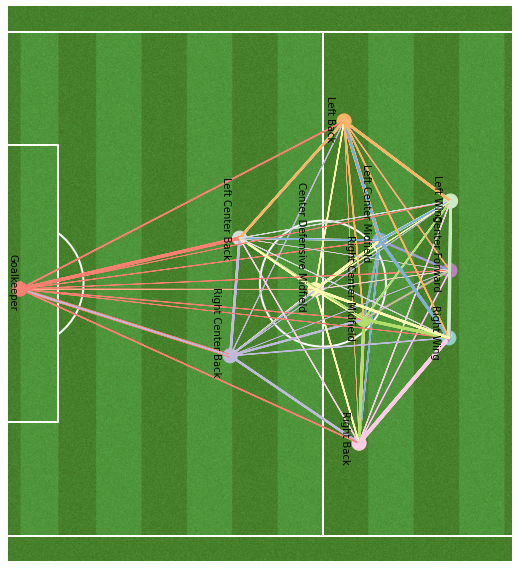

In [193]:
pitch = Pitch(half = True, pad_left = 50, pad_right = -30, pitch_type='statsbomb', pitch_color='grass', line_color='white', stripe=True)
# specifying figure size (width, height)
fig, ax = pitch.draw(figsize=(16, 8))

ax.scatter(loc_df['avg_x'], loc_df['avg_y'], s = 200, color = loc_df['color'])

for index, name in enumerate(ideal_barca):
    if index == 3:
        continue
    pos = loc_df_names.loc[name].get('position')
    x = loc_df_names.loc[name].get('avg_x')
    y = loc_df_names.loc[name].get('avg_y')
    
    plt.text(x - 3,y + 3,pos, rotation = -90)

gk = loc_df_names.loc[ideal_barca[3]].get('position')
x = loc_df_names.loc[ideal_barca[3]].get('avg_x')
y = loc_df_names.loc[ideal_barca[3]].get('avg_y')
plt.text(x - 2,y + 3,gk, rotation = -90)

    
for row in merged_plotting.iterrows():
    current = row[1]
    #print(current)
    
    if current['prop_passes'] == 0:
        ax.arrow(current['from_x'], current['from_y'], current['to_x'] - current['from_x'], current['to_y'] - current['from_y'], lw = 0.2, ls = 'dashed', color = 'black')
    else:
        player_name = current['name']
        c = loc_df_names.loc[player_name]['color']
        ax.arrow(current['from_x'], current['from_y'], current['to_x'] - current['from_x'], current['to_y'] - current['from_y'], lw = 15 * current['prop_passes'], color = c)


